# DDoS attacks detection and characterization

First, we need to import the necessary libraries.

In [153]:
# import needed python libraries

%matplotlib inline

import pandas as pd
import seaborn as sns
import colorcet as cc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

# To display all the columns while printing dataframes
pd.set_option('display.max_columns', None)

## Data exploration and pre-processing
Now, we load the dataset from the .csv file provided.

In [154]:
# Load the dataset
df = pd.read_csv("ddos_dataset.csv", header=0, index_col=0, engine='python')
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

df

Flow ID     Source IP  Source Port  \
0        172.16.0.5-192.168.50.1-634-60495-17    172.16.0.5          634   
1        172.16.0.5-192.168.50.1-60495-634-17  192.168.50.1          634   
2        172.16.0.5-192.168.50.1-634-46391-17    172.16.0.5          634   
3        172.16.0.5-192.168.50.1-634-11894-17    172.16.0.5          634   
4        172.16.0.5-192.168.50.1-634-27878-17    172.16.0.5          634   
...                                       ...           ...          ...   
65995  172.16.0.5-192.168.50.1-38625-63051-17    172.16.0.5        38625   
65996  172.16.0.5-192.168.50.1-58632-18963-17    172.16.0.5        58632   
65997  172.16.0.5-192.168.50.1-46104-64704-17    172.16.0.5        46104   
65998  172.16.0.5-192.168.50.1-60686-10440-17    172.16.0.5        60686   
65999   172.16.0.5-192.168.50.1-45602-1387-17    172.16.0.5        45602   

      Destination IP  Destination Port  Protocol                   Timestamp  \
0       192.168.50.1             60495        17  2018-12-01 10:51:39.813448   
1         172.16.0.5             60495        17  2018-12-01 10:51:39.820842   
2       192.168.50.1             46391        17  2018-12-01 10:51:39.852499   
3       192.168.50.1             11894        17  2018-12-01 10:51:39.890213   
4       192.168.50.1             27878        17  2018-12-01 10:51:39.941151   
...              ...               ...       ...                         ...   
65995   192.168.50.1             63051        17  2018-12-01 13:04:46.628249   
65996   192.168.50.1             18963        17  2018-12-01 13:04:46.628963   
65997   192.168.50.1             64704        17  2018-12-01 13:04:46.629014   
65998   192.168.50.1             10440        17  2018-12-01 13:04:46.629016   
65999   192.168.50.1              1387        17  2018-12-01 13:04:46.629300   

       Flow Duration  Total Fwd Packets  Total Backward Packets  \
0              28415                 97                       0   
1                  2                  2                       0   
2              48549                200                       0   
3              48337                200                       0   
4              32026                200                       0   
...              ...                ...                     ...   
65995              1                  2                       0   
65996         212238                  6                       0   
65997              1                  2                       0   
65998         108952                  4                       0   
65999              1                  2                       0   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                          42680.0                          0.0   
1                            880.0                          0.0   
2                          88000.0                          0.0   
3                          88000.0                          0.0   
4                          88000.0                          0.0   
...                            ...                          ...   
65995                        750.0                          0.0   
65996                       2088.0                          0.0   
65997                        750.0                          0.0   
65998                       1438.0                          0.0   
65999                        750.0                          0.0   

       Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      440.0                  440.0                   440.0   
1                      440.0                  440.0                   440.0   
2                      440.0                  440.0                   440.0   
3                      440.0                  440.0                   440.0   
4                      440.0                  440.0                   440.0   
...                      ...                    ...                     ...   
6

## Section 1 – Data exploration and pre-processing
###  Investigate the provided DDoS attack dataset
#### Statistics about our dataset
Let's compute some statistics about our dataset.

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64239 entries, 0 to 65999
Data columns (total 87 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow ID                      64239 non-null  object 
 1   Source IP                    64239 non-null  object 
 2   Source Port                  64239 non-null  int64  
 3   Destination IP               64239 non-null  object 
 4   Destination Port             64239 non-null  int64  
 5   Protocol                     64239 non-null  int64  
 6   Timestamp                    64239 non-null  object 
 7   Flow Duration                64239 non-null  int64  
 8   Total Fwd Packets            64239 non-null  int64  
 9   Total Backward Packets       64239 non-null  int64  
 10  Total Length of Fwd Packets  64239 non-null  float64
 11  Total Length of Bwd Packets  64239 non-null  float64
 12  Fwd Packet Length Max        64239 non-null  float64
 13  Fwd Packet Length Min

In [156]:
df.describe()

Source Port  Destination Port      Protocol  Flow Duration  \
count  64239.000000      64239.000000  64239.000000   6.423900e+04   
mean   25267.368608      30715.252884     14.362864   5.150614e+06   
std    24710.413442      20347.990914      4.706001   2.249713e+07   
min        0.000000          0.000000      0.000000   1.000000e+00   
25%      779.000000      12435.500000     17.000000   1.000000e+00   
50%    29661.000000      30797.000000     17.000000   2.000000e+00   
75%    48510.500000      49041.500000     17.000000   2.087700e+04   
max    65518.000000      65535.000000     17.000000   1.200000e+08   

       Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  \
count       64239.000000            64239.000000                 64239.000000   
mean           18.814848                1.304036                  6699.521630   
std           462.305336               25.199720                 20510.320389   
min             1.000000                0.000000                     0.000000   
25%             2.000000                0.000000                   123.000000   
50%             2.000000                0.000000                  1050.000000   
75%             2.000000                0.000000                  2944.000000   
max         85894.000000             1862.000000                176000.000000   

       Total Length of Bwd Packets  Fwd Packet Length Max  \
count                 6.423900e+04           64239.000000   
mean                  2.153348e+03             613.992948   
std                   9.087201e+04             585.691655   
min                   0.000000e+00               0.000000   
25%                   0.000000e+00              53.000000   
50%                   0.000000e+00             393.000000   
75%                   0.000000e+00            1464.000000   
max                   8.829488e+06            3564.000000   

       Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  \
count           64239.000000            64239.000000           64239.000000   
mean              588.863043              597.433678               8.712070   
std               584.276284              579.518758              50.570586   
min                 0.000000                0.000000               0.000000   
25%                36.000000               50.000000               0.000000   
50%               375.000000              383.000000               0.000000   
75%              1464.000000             1464.000000               0.000000   
max              2020.000000             2666.086957            1248.198581   

       Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  \
count           64239.000000           64239.000000            64239.000000   
mean               52.149364               3.745248               13.857476   
std               749.318027              25.606835              117.139480   
min                 0.000000               0.000000                0.000000   
25%                 0.000000               0.000000                0.000000   
50%                 0.000000               0.000000                0.000000   
75%                 0.000000               0.000000                0.000000   
max             37960.000000            1460.000000             5011.060159   

       Bwd Packet Length Std  Flow Bytes/s  Flow Packets/s  Flow IAT Mean  \
count           64239.000000  6.423900e+04    6.423900e+04   6.423900e+04   
mean               13.263569  7.634940e+08    1.039858e+06   3.657561e+05   
std               136.314368  9.955216e+08    9.012285e+05   1.556677e+06   
min                 0.000000  0.000000e+00    5.262150e-02   5.000000e-01   
25%                 0.000000  9.610494e+03    5.257900e+03   1.000000e+00   
50%                 0.000000  3.830000e+08    1.000000e+06   2.000000e+00   
75%                 0.000000  1.364500e+09    2.000000e+06   2.000477e+02   
max              7045.095260  2.944000e+09    3.000000e+0

In [ ]:
# Check if there are duplicated rows / columns that bring the same information
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

duplicate_columns = df.T.duplicated()
print("Number of duplicate columns:", duplicate_columns.sum())
print(f"Duplicated columns: [{np.array(duplicate_columns.index[duplicate_columns == True])}]")

Number of duplicate rows: 0
Number of duplicate columns: 17
Duplicated columns: [['Fwd URG Flags' 'Bwd URG Flags' 'FIN Flag Count' 'RST Flag Count'
 'PSH Flag Count' 'ECE Flag Count' 'Fwd Header Length.1'
 'Fwd Avg Bytes/Bulk' 'Fwd Avg Packets/Bulk' 'Fwd Avg Bulk Rate'
 'Bwd Avg Bytes/Bulk' 'Bwd Avg Packets/Bulk' 'Bwd Avg Bulk Rate'
 'Subflow Fwd Packets' 'Subflow Fwd Bytes' 'Subflow Bwd Packets'
 'Subflow Bwd Bytes']]


In [158]:
# Check if 'Fwd Header Length' and 'Fwd Header Length.1' are duplicates
header_length = (df['Fwd Header Length'] == df['Fwd Header Length.1'])
print("Number rows where 'Fwd Header Length' != 'Fwd Header Length.1':", len(header_length) - header_length.sum())

Number rows where 'Fwd Header Length' != 'Fwd Header Length.1': 0


In [159]:
# Dataframe containing only the numerical features
df_num_rows = df.drop(['Flow ID', 'Source IP', 'Destination IP', 'label', 'Timestamp', 'SimillarHTTP'], axis = 1)
# For each row, check if it as at least one "problematic" negative value
neg = ((df_num_rows['Fwd Header Length'] >= 0) & (df_num_rows['Bwd Header Length'] >= 0) & (df_num_rows['min_seg_size_forward'] >= 0))
print(f"Number of rows that do contain negative values: {sum(neg)}")
print(f"Number of rows that doesn't contain negative values: {len(neg) - sum(neg)}")
# Understand which columns contain negative values
labels = (df.drop(['Flow ID', 'Source IP', 'Destination IP', 'label', 'Timestamp', 'SimillarHTTP'], axis = 1) >= 0).all()
negative_labels = labels[labels == False]
print(f"The following columns contain negative values: {np.array(negative_labels.index)}")
print(f"TCP packets with Init_Win_bytes_backward = -1: {sum((df_num_rows['Protocol'] == 6) & (df_num_rows['Init_Win_bytes_backward'] == -1))}")
print(f"TCP packets with Init_Win_bytes_forward = -1: {sum((df_num_rows['Protocol'] == 6) & (df_num_rows['Init_Win_bytes_forward'] == -1))}")
print(f"UDP packets with Init_Win_bytes_backward = -1: {sum((df_num_rows['Protocol'] == 17) & (df_num_rows['Init_Win_bytes_backward'] != -1))}")
print(f"UDP packets with Init_Win_bytes_forward = -1: {sum((df_num_rows['Protocol'] == 17) & (df_num_rows['Init_Win_bytes_forward'] != -1))}")

Number of rows that do contain negative values: 40651
Number of rows that doesn't contain negative values: 23588
The following columns contain negative values: ['Fwd Header Length' 'Bwd Header Length' 'Fwd Header Length.1'
 'Init_Win_bytes_forward' 'Init_Win_bytes_backward' 'min_seg_size_forward']
TCP packets with Init_Win_bytes_backward = -1: 9090
TCP packets with Init_Win_bytes_forward = -1: 0
UDP packets with Init_Win_bytes_backward = -1: 0
UDP packets with Init_Win_bytes_forward = -1: 0


NOTES:
* 64239 rows × 87 columns
* 81 numeric features, 5 non-numeric (flow id, src/dst ip, timestamp, hhtp like) + label
* no null values
* no duplicated rows
* we have negative values in six columns (Fwd Header Length, Bwd Header Length, Fwd Header Length.1, Init_Win_bytes_forward, Init_Win_bytes_backward, min_seg_size_forward)
* while in the Init_Win_bytes_forward and Init_Win_bytes_backward columns the smallest values is -1 (for udp communications, since the window doesn't exist), in the others we have very big negative numbers (in the order of -1e-9...)
* some flags are never used (PSH, FIN, ECE)
* at most we have 1 SYN/RST/ACK/URG/CWE flag per flow 
* some columns are always zero (Fwd Avg Bytes/Bulk, Fwd Avg Packets/Bulk, Fwd Avg Bulk Rate, Bwd Avg Bytes/Bulk, Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate)
* some columns are reduntant/duplicated: 
    - Fwd Header Length = Fwd Header Length.1 
    - the radio of fwd/bwd packets
* generally speaking, our features are about:
    - link (src/dest ip/port)
    - timestamp
    - flow duration and active/idle time
    - number of packets
    - packets length
    - packet/s bytes/s
    - IAT
    - flags
    - subflows
    - direction (inbound)
* Duplicated columns
    * 'Fwd URG Flags' 'Bwd URG Flags' 'FIN Flag Count' 'PSH Flag Count' 'ECE Flag Count' since they're always 0
    * 'RST Flag Count' same of SYN
    * same of 'fwd Header Length" 'Fwd Header Length.1'
    * 'Fwd Avg Bytes/Bulk' 'Fwd Avg Packets/Bulk' 'Fwd Avg Bulk Rate' 'Bwd Avg Bytes/Bulk' 'Bwd Avg Packets/Bulk' 'Bwd Avg Bulk Rate' always 0
    * 'Subflow Fwd Packets' 'Subflow Fwd Bytes' 'Subflow Bwd Packets' 'Subflow Bwd Bytes' same values of the statistics per flow

#### Feature visualization
Now let's move to the analyses of the feature distribution and their correlations in our dataframe.

Let's start by analyzing some characteristics about the traffic flows recorded in the dataset. We visualized the number of flows in the recorded time interval: we compute the end time of each flow (timestamp+duration), then we count the number of flows active in each 30 s time interval. From these graphs, we can notice that the traffic is concentrated in of impulsive type. Each peak corresponds to an attack more or less.

In [ ]:
df_copy = df.copy()
# Additional metrics
df_copy["Total Packets"] = df_copy["Total Fwd Packets"] + df_copy["Total Backward Packets"]
df_copy["Total Length Packets"] = df_copy["Total Length of Fwd Packets"] + df_copy["Total Length of Bwd Packets"]
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'])
df_copy['Flow Duration'] = pd.to_timedelta(df['Flow Duration'],'us')
# End time = timestamp+duration
df_copy['End Time'] = df_copy['Timestamp'] +  df_copy['Flow Duration']
num_sec = 30

Flow ID     Source IP  Source Port  \
0        172.16.0.5-192.168.50.1-634-60495-17    172.16.0.5          634   
1        172.16.0.5-192.168.50.1-60495-634-17  192.168.50.1          634   
2        172.16.0.5-192.168.50.1-634-46391-17    172.16.0.5          634   
3        172.16.0.5-192.168.50.1-634-11894-17    172.16.0.5          634   
4        172.16.0.5-192.168.50.1-634-27878-17    172.16.0.5          634   
...                                       ...           ...          ...   
65995  172.16.0.5-192.168.50.1-38625-63051-17    172.16.0.5        38625   
65996  172.16.0.5-192.168.50.1-58632-18963-17    172.16.0.5        58632   
65997  172.16.0.5-192.168.50.1-46104-64704-17    172.16.0.5        46104   
65998  172.16.0.5-192.168.50.1-60686-10440-17    172.16.0.5        60686   
65999   172.16.0.5-192.168.50.1-45602-1387-17    172.16.0.5        45602   

      Destination IP  Destination Port  Protocol                  Timestamp  \
0       192.168.50.1             60495        17 2018-12-01 10:51:39.813448   
1         172.16.0.5             60495        17 2018-12-01 10:51:39.820842   
2       192.168.50.1             46391        17 2018-12-01 10:51:39.852499   
3       192.168.50.1             11894        17 2018-12-01 10:51:39.890213   
4       192.168.50.1             27878        17 2018-12-01 10:51:39.941151   
...              ...               ...       ...                        ...   
65995   192.168.50.1             63051        17 2018-12-01 13:04:46.628249   
65996   192.168.50.1             18963        17 2018-12-01 13:04:46.628963   
65997   192.168.50.1             64704        17 2018-12-01 13:04:46.629014   
65998   192.168.50.1             10440        17 2018-12-01 13:04:46.629016   
65999   192.168.50.1              1387        17 2018-12-01 13:04:46.629300   

               Flow Duration  Total Fwd Packets  Total Backward Packets  \
0     0 days 00:00:00.028415                 97                       0   
1     0 days 00:00:00.000002                  2                       0   
2     0 days 00:00:00.048549                200                       0   
3     0 days 00:00:00.048337                200                       0   
4     0 days 00:00:00.032026                200                       0   
...                      ...                ...                     ...   
65995 0 days 00:00:00.000001                  2                       0   
65996 0 days 00:00:00.212238                  6                       0   
65997 0 days 00:00:00.000001                  2                       0   
65998 0 days 00:00:00.108952                  4                       0   
65999 0 days 00:00:00.000001                  2                       0   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                          42680.0                          0.0   
1                            880.0                          0.0   
2                          88000.0                          0.0   
3                          88000.0                          0.0   
4                          88000.0                          0.0   
...                            ...                          ...   
65995                        750.0                          0.0   
65996                       2088.0                          0.0   
65997                        750.0                          0.0   
65998                       1438.0                          0.0   
65999                        750.0                          0.0   

       Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      440.0                  440.0                   440.0   
1                      440.0                  440.0                   440.0   
2                      440.0                  440.0                   440.0   
3                      440.0                  440.0                   440.0   
4                      440.0                  440.0                   440.0

                    Start time                   End time  Count
0   2018-12-01 09:17:11.183810 2018-12-01 09:17:41.183810    245
1   2018-12-01 09:17:41.183810 2018-12-01 09:18:11.183810    141
2   2018-12-01 09:18:11.183810 2018-12-01 09:18:41.183810    299
3   2018-12-01 09:18:41.183810 2018-12-01 09:19:11.183810    155
4   2018-12-01 09:19:11.183810 2018-12-01 09:19:41.183810    147
..                         ...                        ...    ...
513 2018-12-01 13:33:41.183810 2018-12-01 13:34:11.183810      0
514 2018-12-01 13:34:11.183810 2018-12-01 13:34:41.183810   5261
515 2018-12-01 13:34:41.183810 2018-12-01 13:35:11.183810    289
516 2018-12-01 13:35:11.183810 2018-12-01 13:35:41.183810      1
517 2018-12-01 13:35:41.183810 2018-12-01 13:36:11.183810      1

[518 rows x 3 columns]


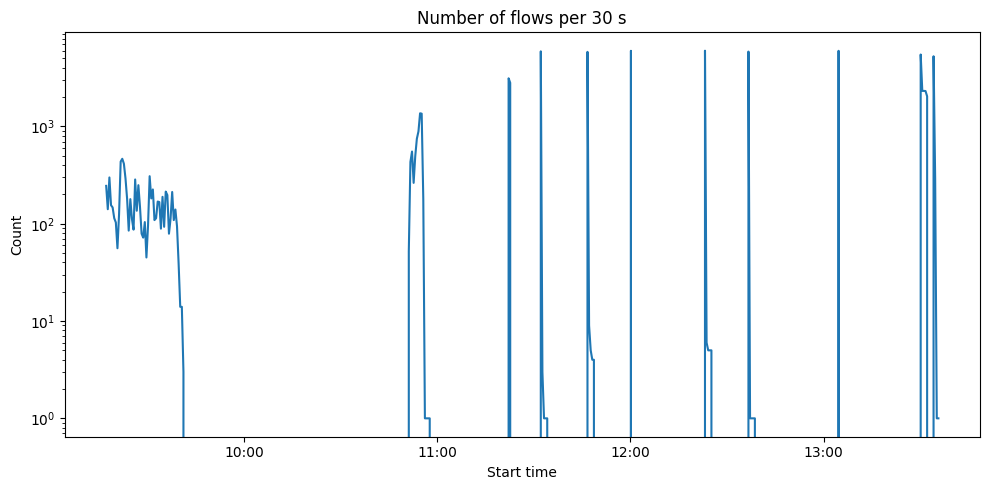

In [ ]:
import matplotlib.dates as mdates

df_sum = pd.DataFrame()
# Time intervals of 30s
df_sum['Start time'] = pd.date_range(min(df_copy['Timestamp']), max(df_copy['End Time']) - pd.to_timedelta(30,'s'), freq="30s").values
df_sum['End time'] = pd.date_range(min(df_copy['Timestamp']) + pd.to_timedelta(30, 's'), max(df_copy['End Time']), freq="30s").values
counts = []
for start, end in zip(df_sum['Start time'], df_sum['End time']):
    # check how many flows are active in that interval of time
    # first count how many are not active: the real count is total-non active
    s_bool = (df_copy['End Time'] < start) | (df_copy['Timestamp'] > end)
    counts.append(len(df_copy['End Time']) - s_bool.sum())
df_sum['Count'] = counts
print(df_sum)

plt.figure(figsize=(10,5))
graph = sns.lineplot(data=df_sum, x="Start time", y = "Count")
graph.xaxis.set_major_locator(mdates.HourLocator(interval = 1))
graph.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# line plot
# for each 30s, count the number of rows, that are the number of flows
plt.yscale('log')
plt.title("Number of flows per 30 s")
plt.tight_layout()
plt.show()


In [ ]:
# Same as above, but for type of attack
df_sum_label = pd.DataFrame()
df_sum_label['Start time'] = pd.date_range(min(df_copy['Timestamp']), max(df_copy['End Time']) - pd.to_timedelta(30,'s'), freq="30s").values
df_sum_label['End time'] = pd.date_range(min(df_copy['Timestamp']) + pd.to_timedelta(30, 's'), max(df_copy['End Time']), freq="30s").values

for label in df_copy['label'].unique():
    counts = []
    for start, end in zip(df_sum['Start time'], df_sum['End time']):
        s_bool = (df_copy[df_copy['label'] == label]['End Time'] < start) | (df_copy[df_copy['label'] == label]['Timestamp'] > end)
        counts.append(len(df_copy[df_copy['label'] == label]) - s_bool.sum())
    df_sum_label[label] = counts


                    Start time                   End time  ddos_dns  benign  \
0   2018-12-01 09:17:11.183810 2018-12-01 09:17:41.183810         0     221   
1   2018-12-01 09:17:41.183810 2018-12-01 09:18:11.183810         0     107   
2   2018-12-01 09:18:11.183810 2018-12-01 09:18:41.183810         0     255   
3   2018-12-01 09:18:41.183810 2018-12-01 09:19:11.183810         0     119   
4   2018-12-01 09:19:11.183810 2018-12-01 09:19:41.183810         0      86   
..                         ...                        ...       ...     ...   
513 2018-12-01 13:33:41.183810 2018-12-01 13:34:11.183810         0       0   
514 2018-12-01 13:34:11.183810 2018-12-01 13:34:41.183810         0       0   
515 2018-12-01 13:34:41.183810 2018-12-01 13:35:11.183810         0       0   
516 2018-12-01 13:35:11.183810 2018-12-01 13:35:41.183810         0       0   
517 2018-12-01 13:35:41.183810 2018-12-01 13:36:11.183810         0       0   

     ddos_ldap  ddos_mssql  ddos_netbios  ddos_ntp 

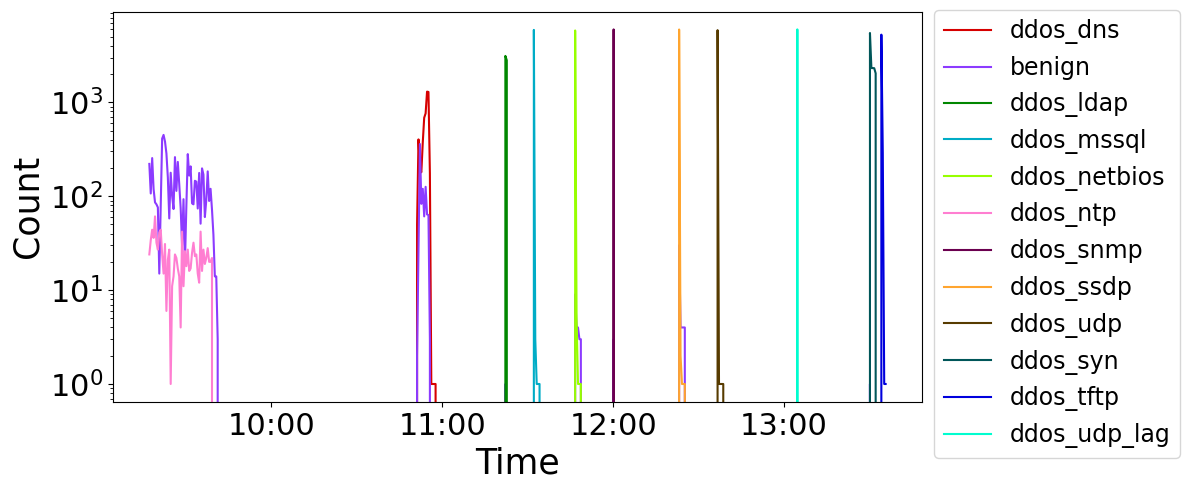

In [256]:
plt.figure(figsize=(12,5))
colors = sns.color_palette(cc.glasbey, n_colors=25)
i = 0
for label in df_copy['label'].unique():
    graph = sns.lineplot(data=df_sum_label, x="Start time", y = label, label=label, color=colors[i])
    i += 1
graph.xaxis.set_major_locator(mdates.HourLocator(interval = 1))
graph.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.legend(bbox_to_anchor=(1, 1.035), loc="upper left", fontsize=17)
plt.yscale('log')
plt.xlabel("Time", fontsize=25)
plt.ylabel("Count", fontsize=25)
#plt.title("Number of flows per 30 s")
plt.tick_params(labelsize=22)

plt.tight_layout()
plt.show()


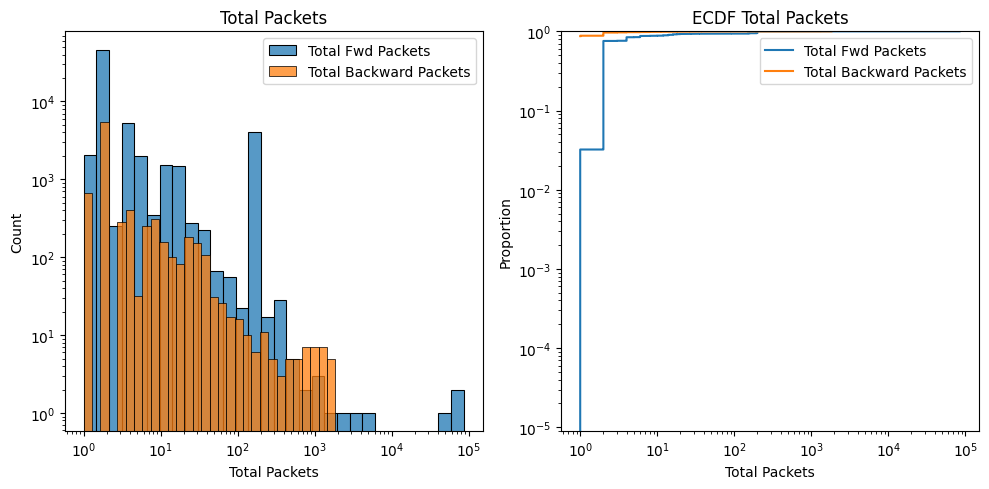

In [170]:
# Total num of packets
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=df, x="Total Fwd Packets", log_scale = True, label="Total Fwd Packets", bins=30, ax=axes[0])
sns.histplot(data=df, x="Total Backward Packets", log_scale = True, label="Total Backward Packets", bins=30, ax=axes[0])
axes[0].legend()
axes[0].set_yscale('log')
axes[0].set_xlabel('Total Packets')
axes[0].set_title("Total Packets")

sns.ecdfplot(data=df, x="Total Fwd Packets", log_scale = True, label="Total Fwd Packets", ax=axes[1])
sns.ecdfplot(data=df, x="Total Backward Packets", log_scale = True, label="Total Backward Packets", ax=axes[1])
axes[1].legend()
axes[1].set_yscale('log')
axes[1].set_xlabel('Total Packets')
axes[1].set_title("ECDF Total Packets")
plt.tight_layout()
plt.show()

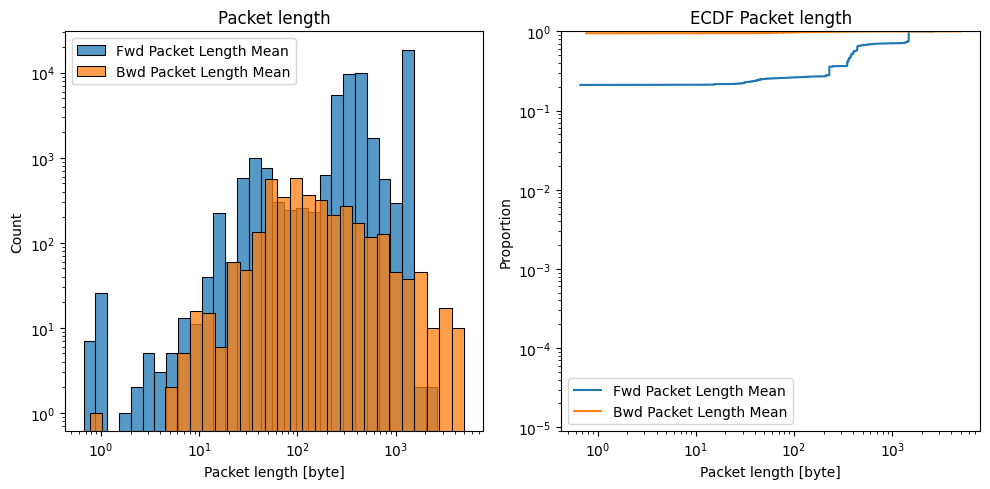

In [171]:
# Lenght of packets
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=df, x="Fwd Packet Length Mean", log_scale = True, label="Fwd Packet Length Mean", bins=30, ax=axes[0])
sns.histplot(data=df, x="Bwd Packet Length Mean", log_scale = True, label="Bwd Packet Length Mean", bins=30, ax=axes[0])
axes[0].legend()
axes[0].set_yscale('log')
axes[0].set_xlabel('Packet length [byte]')
axes[0].set_title("Packet length")

sns.ecdfplot(data=df, x="Fwd Packet Length Mean", log_scale = True, label="Fwd Packet Length Mean", ax=axes[1])
sns.ecdfplot(data=df, x="Bwd Packet Length Mean", log_scale = True, label="Bwd Packet Length Mean", ax=axes[1])
axes[1].legend()
axes[1].set_xlabel('Packet length [byte]')
axes[1].set_yscale('log')
axes[1].set_title("ECDF Packet length")
plt.tight_layout()
plt.show()



We can observe that many that the majority of the flows sent less than 1000 packets, while the packet length in bytes is usually pretty high (more than 100 bytes).

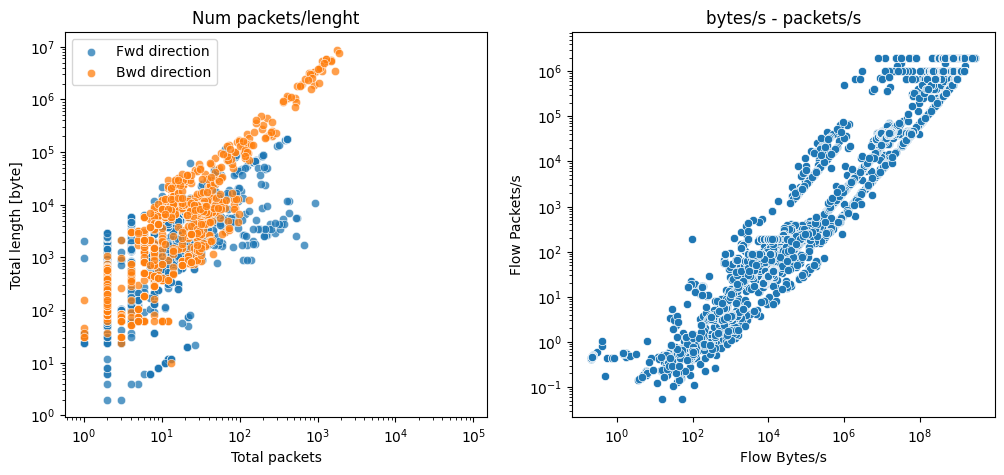

In [ ]:
# Scatterplot - lenght and num of packets and bytes/s-packets/s
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.scatterplot(data=df, x="Total Fwd Packets", y = "Total Length of Fwd Packets", alpha = 0.75, ax = axes[0], label ="Fwd direction")
sns.scatterplot(data=df, x="Total Backward Packets", y = "Total Length of Bwd Packets", alpha = 0.75, ax = axes[0], label ="Bwd direction")
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlabel('Total packets')
axes[0].set_ylabel('Total length [byte]')

axes[0].legend()
axes[0].set_title("Num packets/lenght")

sns.scatterplot(data=df, x="Flow Bytes/s", y = "Flow Packets/s", ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_title("bytes/s - packets/s")
plt.show()

Looking at this graph, we can notice that there isn't a perfect direct proportionality between the number of forwarded packets and they're length in bytes, especially for small packets. On the other hand the transmission rates in byte and packets are directly proportional.

Now let's concentrate on the IAT and the relationships between flow duration, active and idle time. Often the IAT is pretty small for the flow and the fwd, but it's concentrated among certain values.
Analyzing this and the other time features we noted that it is improbable that they are really expressed in seconds as written in dataset description (some flows would last more than three years). Only for the visualization part, we will consider them in microsecond. The ML models are not affected by it, since they care about numbers but not unit of measurement as long as data are consistent.

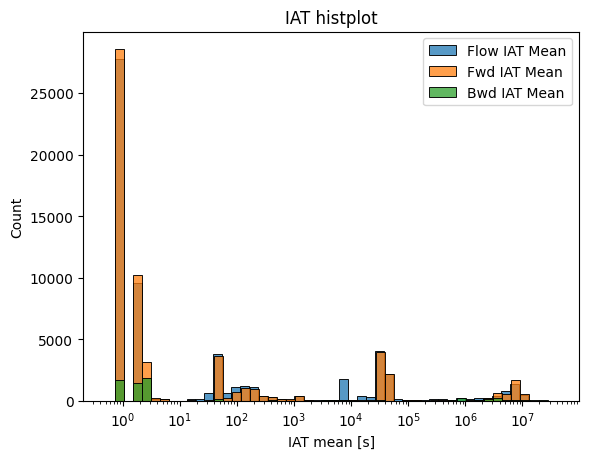

In [ ]:
# Histogram - IAT
plt.figure()
sns.histplot(data=df, x="Flow IAT Mean", log_scale = True, alpha=0.75, bins = 50, label="Flow IAT Mean")
sns.histplot(data=df, x="Fwd IAT Mean", log_scale = True, alpha=0.75, bins = 50, label="Fwd IAT Mean")
sns.histplot(data=df, x="Bwd IAT Mean", log_scale = True, alpha=0.75, bins = 50, label="Bwd IAT Mean")
plt.legend()
plt.xlabel('IAT mean [μs]')
plt.title("IAT histplot")
plt.show()

Now, let's proceed analyzing the IP/port src/dst.

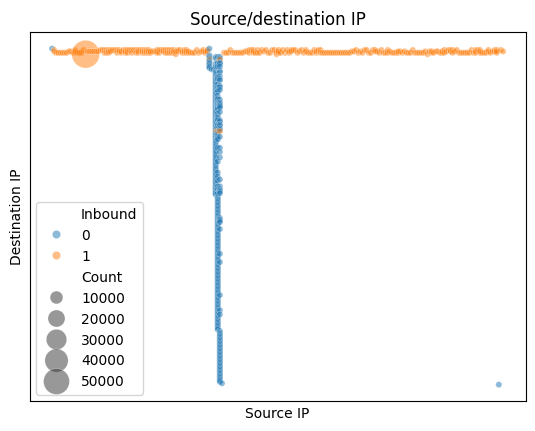

The most used source IP for outbound communications is ['192.168.50.7'] - 2334 / 5167
The most used destination IP for inbound communications is ['192.168.50.1'] - 58000 / 59072


In [174]:
# Bubble plot - ip src/dst
df_copy = df.groupby(["Source IP", "Destination IP", "Inbound"]).count()
df_copy.rename({'Flow ID': "Count"}, axis=1, inplace=True)
# use the scatterplot function
sns.scatterplot(
    data=df_copy,
    x="Source IP",
    y="Destination IP",
    size="Count",
    hue="Inbound",
    alpha=0.5,
    sizes=(20, 400)
)
plt.xticks([])
plt.yticks([])
plt.title("Source/destination IP")
plt.tight_layout
# show the graph
plt.show()

print(f"The most used source IP for outbound communications is {(df[df["Inbound"] == 0]["Source IP"]).mode().tolist()} - {len(df[(df["Inbound"] == 0) & (df["Source IP"] == '192.168.50.7')])} / {len(df[(df["Inbound"] == 0)])}")
print(f"The most used destination IP for inbound communications is {df[df["Inbound"] == 1]["Destination IP"].mode().tolist()} - {len(df[(df["Inbound"] == 1) & (df["Destination IP"] == '192.168.50.1')])} / {len(df[(df["Inbound"] == 1)])}")

 An inbound communication (1) is one that is directed towards the device, while an outbound (0) communication is one that is initiated by the device. So in an inbound communication the destination IP is the one of the device, while in an outbound one the source IP is the one of the device. Definitely, most of the inbound communication have the same IP address and most of the outbound communications have the same source address. Moving to the port realm, we may notice how the ecdf of the destination port is a n almost perfect straight line.

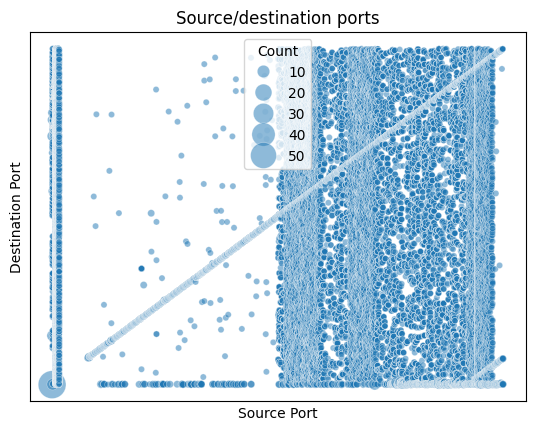

In [175]:
# Bubble plot: port scr/dst
df_copy = df.groupby(["Source Port", "Destination Port"]).count()
df_copy.rename({'Flow ID': "Count"}, axis=1, inplace=True)
# use the scatterplot function
sns.scatterplot(
    data=df_copy,
    x="Source Port",
    y="Destination Port",
    size="Count",
    alpha=0.5,
    sizes=(20, 400)
)
plt.xticks([])
plt.yticks([])
plt.title("Source/destination ports")
plt.tight_layout
# show the graph
plt.show()

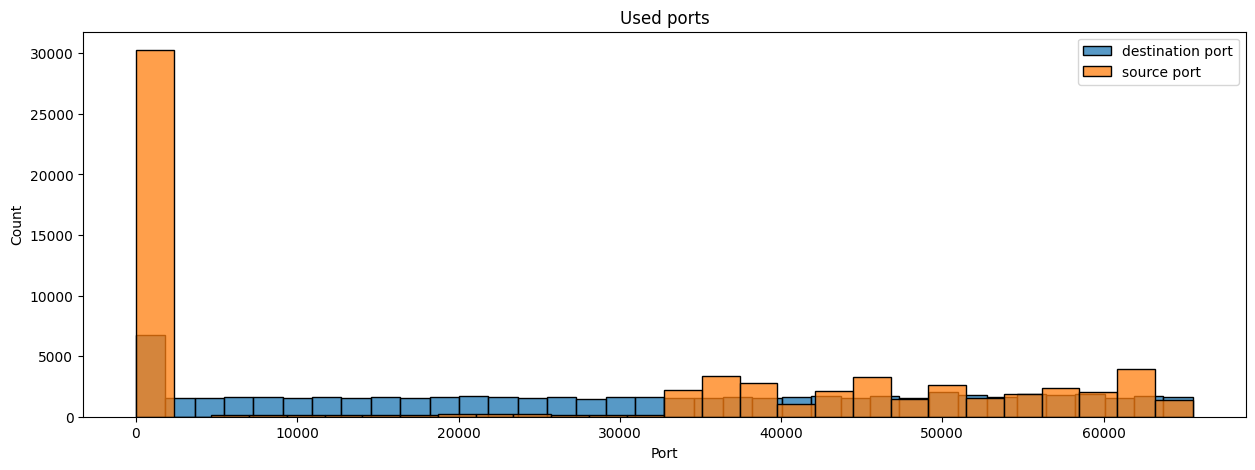

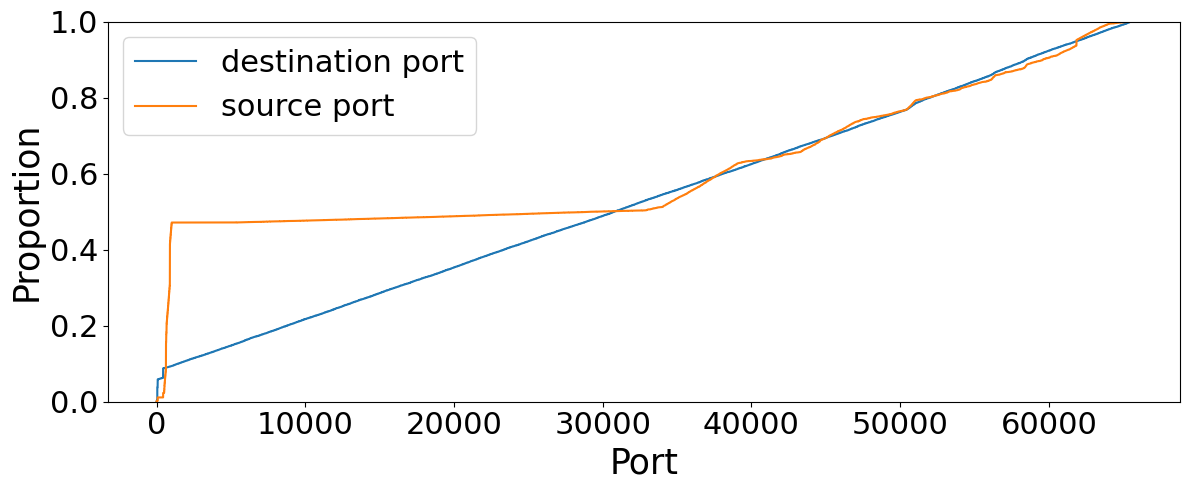

In [ ]:
# Histplot and ecdf used ports
plt.figure(figsize=(15,5))
sns.histplot(data=df, x = "Destination Port", label="destination port")
sns.histplot(data=df, x = "Source Port", label="source port")
plt.title("Used ports")
plt.xlabel("Port")
plt.legend()

plt.figure(figsize=(12,5))
sns.ecdfplot(data=df, x = "Destination Port", label="destination port")
sns.ecdfplot(data=df, x = "Source Port", label="source port")
#plt.title("ECDF destination ports")
plt.xlabel("Port", fontsize=25)
plt.ylabel("Proportion", fontsize=25)
plt.legend(fontsize=22)
plt.tick_params(labelsize=22)

plt.tight_layout()
plt.show()

Now we proceed analyzing the most active links (couple src ip - dst ip). From the first graph, we can notice that the traffic among 172.16.0.5 and 192.168.50.1 is definitely predominant and distributed in the whole period, while the other flows where especially active in the first period of time (before 11 a.m.). The second and the third graphs are not really relevant, but let's keep them for the moment.bThe other four more common entries have in common the first part (192.168.50.x), so they may be part of the same network.

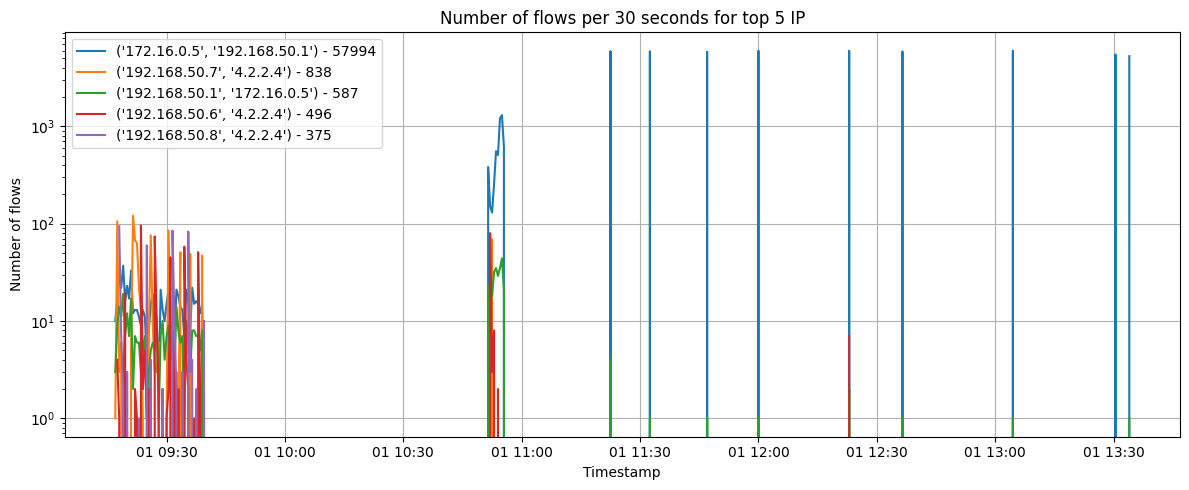

In [412]:
# Most active links
# Group by source and destination ip and select the 5 most active links.
df_copy = df.copy()
num_sec = 30

ip_top5 = df_copy.groupby(['Source IP', 'Destination IP']).count().sort_values(by='Timestamp', ascending=False).index[:5]
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'])
plt.figure(figsize=(12, 5))
num_packets = []
for ip in ip_top5:
    # Dataset containing only that ip source-ip destination
    df_ip = df_copy[(df_copy["Source IP"] == ip[0]) & (df_copy["Destination IP"] == ip[1])]
    df_ip.set_index('Timestamp', inplace=True)
    num_packets.append(len(df_ip))
    # We consider only one column, otherwise we would have n copies of each entry
    plt.plot(df_ip.resample(f'{num_sec}s').count()['Source IP'], label=f'{ip} - {len(df_ip)}') # line plot

plt.legend(loc='upper left')
plt.xlabel('Timestamp')
plt.ylabel('Number of flows')
plt.title(f'Number of flows per {num_sec} seconds for top 5 IP')
plt.yscale('log')
plt.grid()
plt.tight_layout()
plt.show()

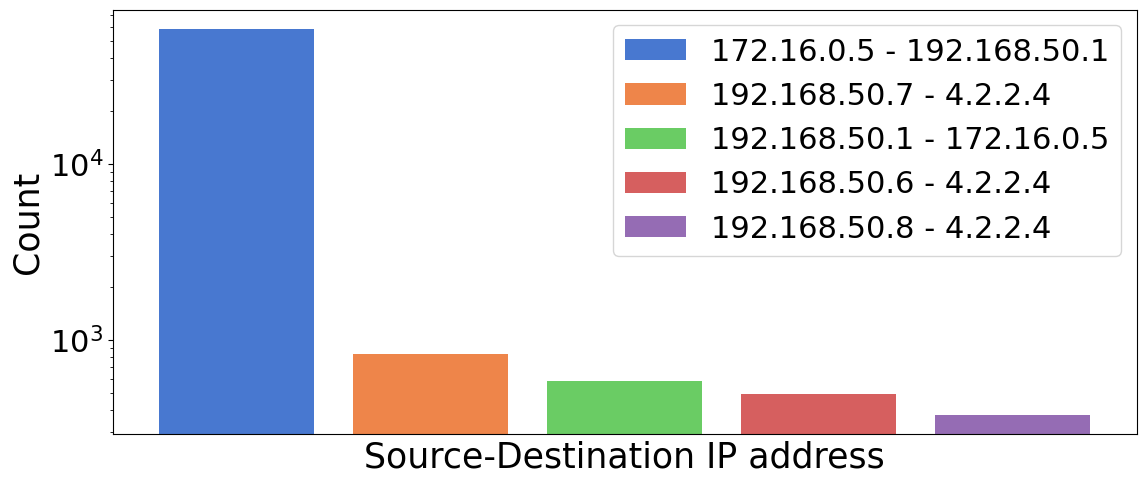

In [ ]:
# Most active links
colors = sns.color_palette('muted')[0:5]

ip_top_string = []
for i in range(0,5):
    ip_top_string.append(f"{ip_top5[i][0]} - {ip_top5[i][1]}")

plt.figure(figsize=(12,5))
plt.bar(range(0,5), num_packets, color=colors, label=ip_top_string)
plt.ylabel("Count", fontsize = 25)
plt.xlabel("Source-Destination IP address", fontsize = 25)
plt.tick_params(labelsize=22)
plt.xticks([], [])
plt.legend(fontsize=22)
plt.tight_layout()
plt.yscale('log')

#plt.title("Most active links")
plt.show()


Finally, let's compute the most correlated feature to find whether there are strongly correlated features to investigate.

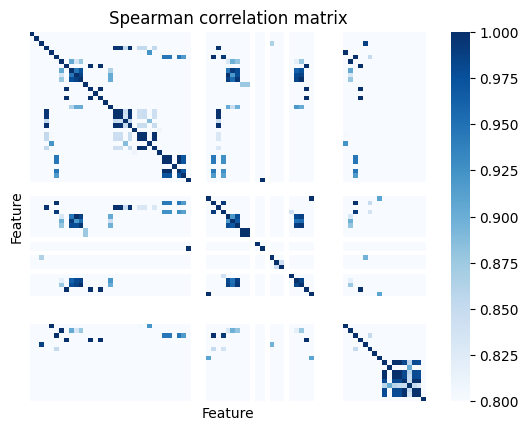

                         level_0                      level_1         0
8              Fwd Header Length          Fwd Header Length.1  1.000000
49             Subflow Bwd Bytes  Total Length of Bwd Packets  1.000000
51                RST Flag Count                Fwd PSH Flags  1.000000
55           Subflow Fwd Packets            Total Fwd Packets  1.000000
71             Total Fwd Packets          Subflow Fwd Packets  1.000000
75        Total Backward Packets          Subflow Bwd Packets  1.000000
81             Packet Length Std       Packet Length Variance  1.000000
83          Avg Bwd Segment Size       Bwd Packet Length Mean  1.000000
85          Avg Fwd Segment Size       Fwd Packet Length Mean  1.000000
87         Bwd Packet Length Max            Subflow Bwd Bytes  0.999984
89   Total Length of Bwd Packets        Bwd Packet Length Max  0.999984
91                   Bwd IAT Max                Bwd IAT Total  0.999975
93                   Bwd IAT Max                 Bwd IAT Mean  0

In [190]:
# Compute the correlation matrix
correlation_matrix_spearman = df.drop(['Flow ID', 'Source IP', 'Destination IP', 'label', 'Timestamp', 'SimillarHTTP'], axis = 1).corr(method='spearman').abs()

# display the heatmap
plt.figure()
sns.heatmap(correlation_matrix_spearman, cmap='Blues', vmin=0.8, vmax=1, yticklabels=False, xticklabels=False)
plt.title("Spearman correlation matrix")
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.show()

c = correlation_matrix_spearman[correlation_matrix_spearman>0.8]
s = c.unstack()
so = s.sort_values(ascending=False).reset_index()


so = so[(so[0].isnull()==False) & (so["level_0"] != so["level_1"])]
so= so.iloc[::2]
print(so.to_string())

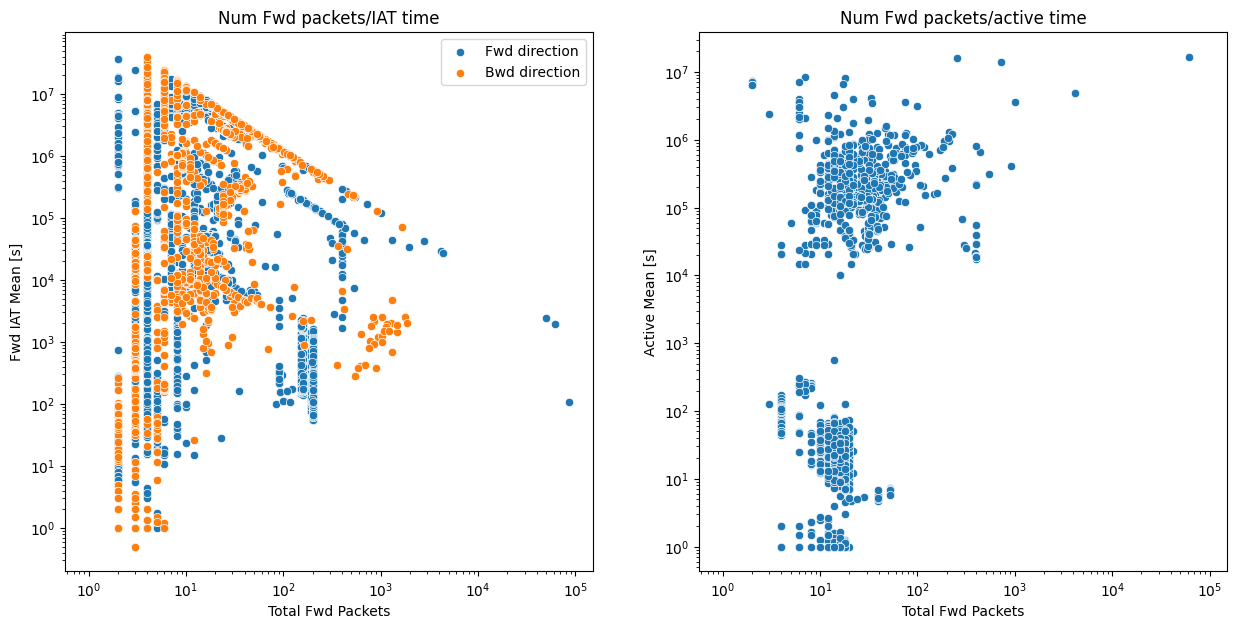

In [ ]:
# Scatterplot - fwd packets/IAT and fwd packets/active time
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.scatterplot(data=df, x = "Total Fwd Packets", y = "Fwd IAT Mean", ax=axes[0], label="Fwd direction")
sns.scatterplot(data=df, x = "Total Backward Packets", y = "Bwd IAT Mean", ax=axes[0], label="Bwd direction")
axes[0].set_yscale("log")
axes[0].set_xscale("log")
axes[0].set_ylabel("Fwd IAT Mean [μs]")
axes[0].set_title("Num Fwd packets/IAT time")

sns.scatterplot(data=df, x = "Total Fwd Packets", y = "Active Mean", ax=axes[1])
axes[1].set_yscale("log")
axes[1].set_xscale("log")
axes[1].set_ylabel("Active Mean [μs]")
axes[1].set_title("Num Fwd packets/active time")
plt.show()

We can observe that the smaller the IAT time the higher the number of packets (inverse proportionality) and that the higher the num of fwd packets the higher the active time (direct proportionality).

#### Protocol dependant features
Now let's concentrate on the different kinds of protocols used.

In [192]:
print(df['Protocol'].value_counts())

df_protocol = df.copy()
df_protocol = df_protocol[['Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Flow Bytes/s',  'Flow Packets/s',  'Flow IAT Mean', 'Active Mean', 'Idle Mean']].groupby('Protocol').mean()
df_protocol

Protocol
17    48870
6     15311
0        58
Name: count, dtype: int64


Flow Duration  Total Fwd Packets  Total Backward Packets  \
Protocol                                                             
0          9.236534e+07        3691.862069               37.482759   
6          2.109256e+07           6.526223                5.047678   
17         5.248447e+04          18.305627                0.088214   

          Fwd Packet Length Mean  Bwd Packet Length Mean  Flow Bytes/s  \
Protocol                                                                 
0                       0.000000                0.000000  0.000000e+00   
6                      14.134631               43.021948  1.197005e+06   
17                    780.890663                4.736676  1.003228e+09   

          Flow Packets/s  Flow IAT Mean    Active Mean     Idle Mean  
Protocol                                                              
0           1.919280e+04   3.965645e+06  977336.437591  1.467388e+07  
6           7.551326e+05   1.495610e+06   31241.867248  4.749147e+06  
17          1.130275e+06   7.499810e+03     917.369724  1.363349e+04

The majority or the traffic is over UDP, followed by TCP and HOPOPT
* 0: HOPOPT -> is the acronym of the Hop-by-Hop IPv6 extension header. It is a header that allows to add even more options to an IPv6 packet. It is normal that IPv6 packets include this header. In our dataset only a few samples are of that type.
* 6: TCP -> usually the flows is longer than in UDP (with higher active time and IAT), the packets in the fwd direction are the 60% of the whole traffic. The response packets are way bigger than the fwd ones and usually the connection are slower than UDP (smaller bytes/s-packet/s) 
* 17: UDP -> shorter flows, more forwarded packets and only a few in the backward direction.  The fwd packets are more than 100x bwd packets. The IAT is small and the Idle time very high (25% of flow duration).

Both protocols use different destination ports numbers. The transmission rates are similar, but UDP packets are usually longer than TCP ones. Usually TCP flows have a lower Idle time, even if some peaks are also present.

Now let's analyze the flag usage in TCP: the FIN flag is never used, so all the connections have been closed through the reset flag.
- The URG flag is used to signal “urgent” data that should be prioritized over non-urgent data
- CWE/ECE flags about the congestion signaling
-- the window size can be configured, but it cannot exceed 65535 bytes due to limitations of the TCP header:

In [193]:
df_tcp = df[df['Protocol'] == 6].copy()
df_tcp = df_tcp[['FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Init_Win_bytes_forward',  'Init_Win_bytes_backward']].mean()
df_tcp

FIN Flag Count                0.000000
SYN Flag Count                0.002482
RST Flag Count                0.038338
ACK Flag Count                0.799164
URG Flag Count                0.200640
CWE Flag Count                0.144733
Init_Win_bytes_forward     9416.139965
Init_Win_bytes_backward    1662.422768
dtype: float64

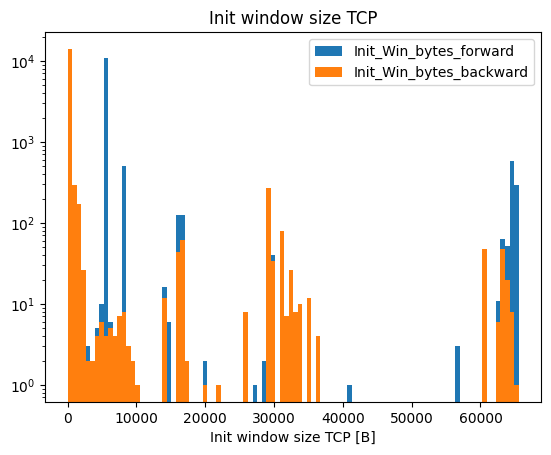

In [194]:
# Histogram - TCP window init
df_tcp = df[df['Protocol'] == 6].copy()
plt.figure()
plt.hist(x=df_tcp['Init_Win_bytes_forward'], bins = 100, label="Init_Win_bytes_forward")
plt.hist(x=df_tcp['Init_Win_bytes_backward'], bins = 100, label = "Init_Win_bytes_backward")
plt.yscale('log')
plt.title('Init window size TCP')
plt.xlabel('Init window size TCP [B]')
plt.legend()
plt.show()

#### GT analysis

In [195]:
print(df['label'].value_counts())

label
ddos_udp_lag    5986
ddos_snmp       5984
ddos_ssdp       5970
ddos_ldap       5928
ddos_mssql      5911
ddos_udp        5876
ddos_netbios    5830
benign          5658
ddos_syn        5480
ddos_dns        5369
ddos_tftp       5261
ddos_ntp         986
Name: count, dtype: int64


There are 12 different labels. The data are more or less equally distributed among them, only the ddos_ntp is underrepresented. They are 11 different types of ddos attacks + benign label.
- Ddos ldap: LDAP Amplification attacks leverage the Lightweight Directory Access Protocol (LDAP) which is used by Microsoft Active Directory and millions of organizations to verify username and password information and permit access to applications. The attacker sends small requests to a publicly available vulnerable LDAP server with open TCP port 389 in order to produce large (amplified) replies, reflected to a target server.
- Ddos syn: A SYN Flood, often generated by botnets, is designed to consume resources of the victim server, such as firewalls or other perimeter defense elements, in an attempt to overwhelm their capacity limits and bring them down. The target receives SYN packets at very high rates which rapidly fill up its connection state table, resulting in disconnections, dropping of legitimate traffic packets, or even worse – element reboot.
- Ddos netbios: NetBIOS (Network Basic Input/ Output System) is a network service that enables applications on different computers to communicate with each other across a local area network (LAN). Openly accessible NetBIOS service may lead to information disclosure or may allow an unauthorized remote attacker to launch UDP amplification attacks from the targeted machine
- Ddos mssql: an attack type that exploits vulnerabilities of the MC-SQLR protocol used for sending queries to Microsoft SQL Server. An overload of a victim’s link is achieved as a result of getting lists of all database instances stored on multiple public SQL servers (including those hosted by service and cloud providers), along with the information on how to connect to those instances. The data is provided in response to a stream of spoofed scripted requests containing the attacked node’s IP address, sent to those SQL servers.
- Ddos ntp: attack that exploits the Network Time Protocol (NTP) to overwhelm victims with high volumes of traffic. By abusing the user datagram protocol (UDP) in NTP transactions, attackers can amplify small requests into much larger responses.
- Ddos udp: it can be initiated by sending a large number of UDP packets to random ports on a remote host. As a result, the distant host will: a) Check for the application listening at that port b) See that no application listens at that port; c) Reply with an ICMP Destination Unreachable packet. Thus, for a large number of UDP packets, the victimized system will be forced into sending many ICMP packets, eventually leading it to be unreachable by other clients. The attacker(s) may also spoof the IP address of the UDP packets, ensuring that the excessive ICMP return packets do not reach them, and anonymizing their network location(s). 
- Ddos dns: in a DNS flood attack the offender tries to overbear a given DNS server (or servers) with apparently valid traffic, overwhelming server resources and impeding the servers’ ability to direct legitimate requests to zone resources.
- Ddos snmp: exploits misconfigured SNMP servers to overwhelm victims with user datagram protocol (UDP) traffic. Attackers spoof the IP address of a target device or network and send SNMP queries to broadcast addresses, generating high volumes of reflected traffic.
- Ddos sstp: attack that exploits Universal Plug and Play (UPnP) networking protocols in order to send an amplified amount of traffic to a targeted victim, overwhelming the target’s infrastructure and taking their web resource offline. Under normal circumstances, the SSDP protocol is used to allow UPnP devices to broadcast their existence to other devices on the network.
- Ddos tftp: attack based on the Trivial File Transfer Protocol (TFTP). This attack could have amplification factor of approximately 60, which rates highly alongside other researched amplification attacks.

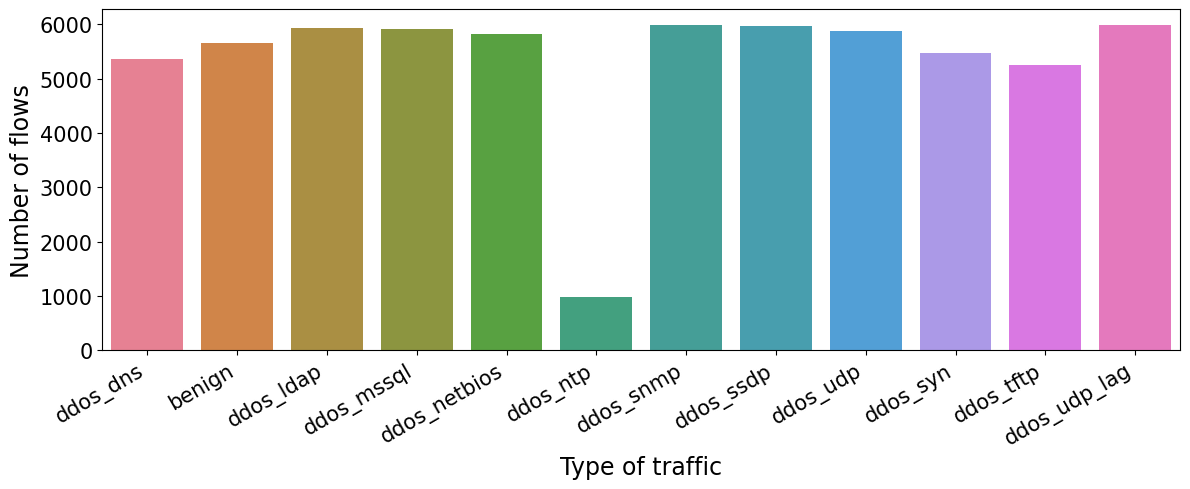

In [241]:
# Histogram - flows per label
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'label', hue="label")
plt.xlabel("Type of traffic", fontsize=17)
plt.ylabel("Number of flows", fontsize=17)
#plt.title("Number of flows per type of traffic")
plt.tick_params(labelsize=15)
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [291]:
df_label = df.copy()
df_label = df_label[['label', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Flow Bytes/s',  'Flow Packets/s',  'Flow IAT Mean', 'Active Mean', 'Idle Mean']].groupby('label').mean()
df_label

Flow Duration  Total Fwd Packets  Total Backward Packets  \
label                                                                    
benign         1.029146e+07           8.310180               12.422057   
ddos_dns       2.461409e+05         148.126094                0.282362   
ddos_ldap      2.234917e+03          16.491903                0.006242   
ddos_mssql     2.624598e+04          12.318389                0.079513   
ddos_netbios   2.375007e+04           2.706690                0.033276   
ddos_ntp       3.204328e+06           4.752535                4.583164   
ddos_snmp      8.033757e+00           2.008021                0.000000   
ddos_ssdp      2.695504e+04          10.291457                0.036181   
ddos_syn       4.638784e+07           8.197628                0.849635   
ddos_tftp      2.340518e+06           2.450485                0.320091   
ddos_udp       1.131397e+05           3.840368                0.033016   
ddos_udp_lag   8.498586e+04           3.584698                0.000000   

              Fwd Packet Length Mean  Bwd Packet Length Mean  Flow Bytes/s  \
label                                                                        
benign                     47.165510              141.179307  2.904743e+06   
ddos_dns                  573.278842                1.947295  2.203689e+08   
ddos_ldap                1463.595029                0.010256  2.359801e+09   
ddos_mssql               1462.817849                0.090721  2.278424e+09   
ddos_netbios              568.623499                0.000000  9.994102e+08   
ddos_ntp                   37.396338               81.486605  1.875623e+06   
ddos_snmp                 228.986464                0.000000  3.574652e+08   
ddos_ssdp                1440.253601                0.000000  1.451772e+09   
ddos_syn                    0.000568                0.000000  9.054364e-05   
ddos_tftp                   0.022809                0.000000  4.561870e+04   
ddos_udp                  369.594820                0.000000  3.196394e+08   
ddos_udp_lag              370.607881                0.000000  3.135369e+08   

              Flow Packets/s  Flow IAT Mean   Active Mean     Idle Mean  
label                                                                    
benign          1.308859e+05   2.879564e+05  79664.711021  3.413832e+06  
ddos_dns        2.047263e+05   1.065911e+04   1629.426243  6.405515e+04  
ddos_ldap       1.611936e+06   7.662988e+01      0.000000  0.000000e+00  
ddos_mssql      1.557248e+06   1.787776e+03   2839.889630  6.226577e+03  
ddos_netbios    1.758685e+06   1.079952e+03    829.105380  3.100135e+03  
ddos_ntp        4.248734e+04   4.389072e+05    115.997465  6.923258e+05  
ddos_snmp       1.560540e+06   7.512223e+00      0.000000  0.000000e+00  
ddos_ssdp       1.015390e+06   7.915267e+02      0.000461  1.676594e+03  
ddos_syn        8.355193e+05   3.180402e+06   8856.387364  7.632146e+06  
ddos_tftp       1.180403e+06   7.020570e+05   6893.694051  2.279892e+06  
ddos_udp        8.271243e+05   2.014641e+04   2354.476072  1.017022e+03  
ddos_udp_lag    8.110906e+05   1.903907e+04      0.000000  0.000000e+00

The benign and the ddos_syn flows are the longest. The ddos_dns has the max number of total fwd packets, while the only king of traffic that has many backwards packets in the benign (in ddos_ntp are half-and-half more or less). The length of the forwarded packets it's generally way bigger of the bwd ones (exceptions: benign and ddos_ntp). While the packets/s in more or less constant, the bytes/s changes a lot among the different attacks: in ddos_sin is near 0, while inn ddos_ldap, ddos_mssql and ddos_ssdp is in the order of one billion. The IAT goes through 7s in ddos_snmp to 3 million s in ddos_syn. Finally, some attacks have active/idle mean of 0 (ddos_udp_lag and ddos_snmp), while others are pretty high.

Now let's focus on the attack duration: it is computed as the difference from the timestamp of the first packet with that label and the end time (timestamp + duration) of the last one.

Label: ddos_dns between 2018-12-01 10:51:39.813448 and 2018-12-01 10:57:43.317628; length: 0 days 00:06:03.504180
Label: benign between 2018-12-01 09:17:12.634569 and 2018-12-01 13:30:30.742103; length: 0 days 04:13:18.107534
Label: ddos_ldap between 2018-12-01 11:22:40.254769 and 2018-12-01 11:22:49.396412; length: 0 days 00:00:09.141643
Label: ddos_mssql between 2018-12-01 11:32:32.915441 and 2018-12-01 11:34:32.066524; length: 0 days 00:01:59.151083
Label: ddos_netbios between 2018-12-01 11:47:08.463789 and 2018-12-01 11:49:08.173913; length: 0 days 00:01:59.710124
Label: ddos_ntp between 2018-12-01 09:17:11.183810 and 2018-12-01 09:39:40.234277; length: 0 days 00:22:29.050467
Label: ddos_snmp between 2018-12-01 12:00:13.902782 and 2018-12-01 12:00:14.706635; length: 0 days 00:00:00.803853
Label: ddos_ssdp between 2018-12-01 12:23:13.663425 and 2018-12-01 12:25:13.377655; length: 0 days 00:01:59.714230
Label: ddos_udp between 2018-12-01 12:36:57.628026 and 2018-12-01 12:38:57.671029

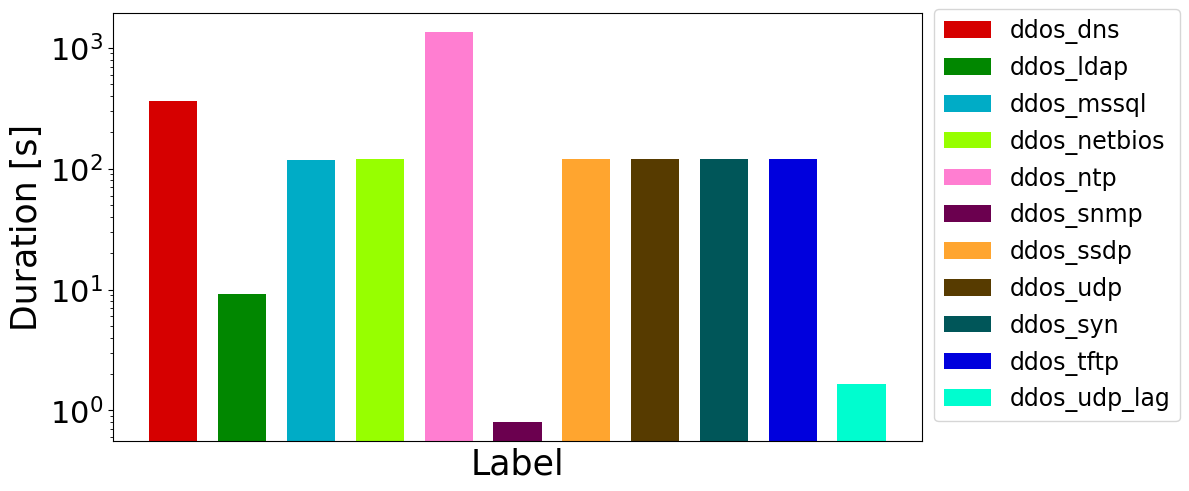

In [ ]:
# Histogram - attack duration
df_label = df.copy()
df_label['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_label['Flow Duration'] = pd.to_timedelta(df['Flow Duration'],'us')
df_label['End Time'] = df_label['Timestamp']  +  df_label['Flow Duration']
lengths = []
for label in df['label'].unique():
    min_ts = df_label[df['label'] == label]['Timestamp'].min()
    max_ts = df_label[df['label'] == label]['End Time'].max()
    length = max_ts - min_ts
    if label != 'benign':
        lengths.append(length.total_seconds())
    print(f"Label: {label} between {min_ts} and {max_ts}; length: {length}")

colors = sns.color_palette(cc.glasbey, n_colors=25)
colors.pop(1)
labels = df['label'].unique()
labels_attack = np.delete(labels, 1)
plt.figure(figsize = (12,5))
plt.bar(labels_attack, lengths, width = 0.7, color=colors, label=labels_attack)
plt.yscale('log')
plt.xticks([], [])
plt.legend(bbox_to_anchor=(1, 1.035), loc="upper left", fontsize=17)
#plt.title("Attack Duration")
plt.ylabel("Duration [s]", fontsize=25)
plt.xlabel("Label", fontsize=25)
plt.tick_params(labelsize=22)
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()

ddos_ntp is definitely the longest (22 min), followed by ddos_dns (4 min), while the others are way shorter (a couple of seconds or milliseconds).

Then we can start visualizing some metrics label-based to notice the differences among the different attacks, even though we will further investigate them later.

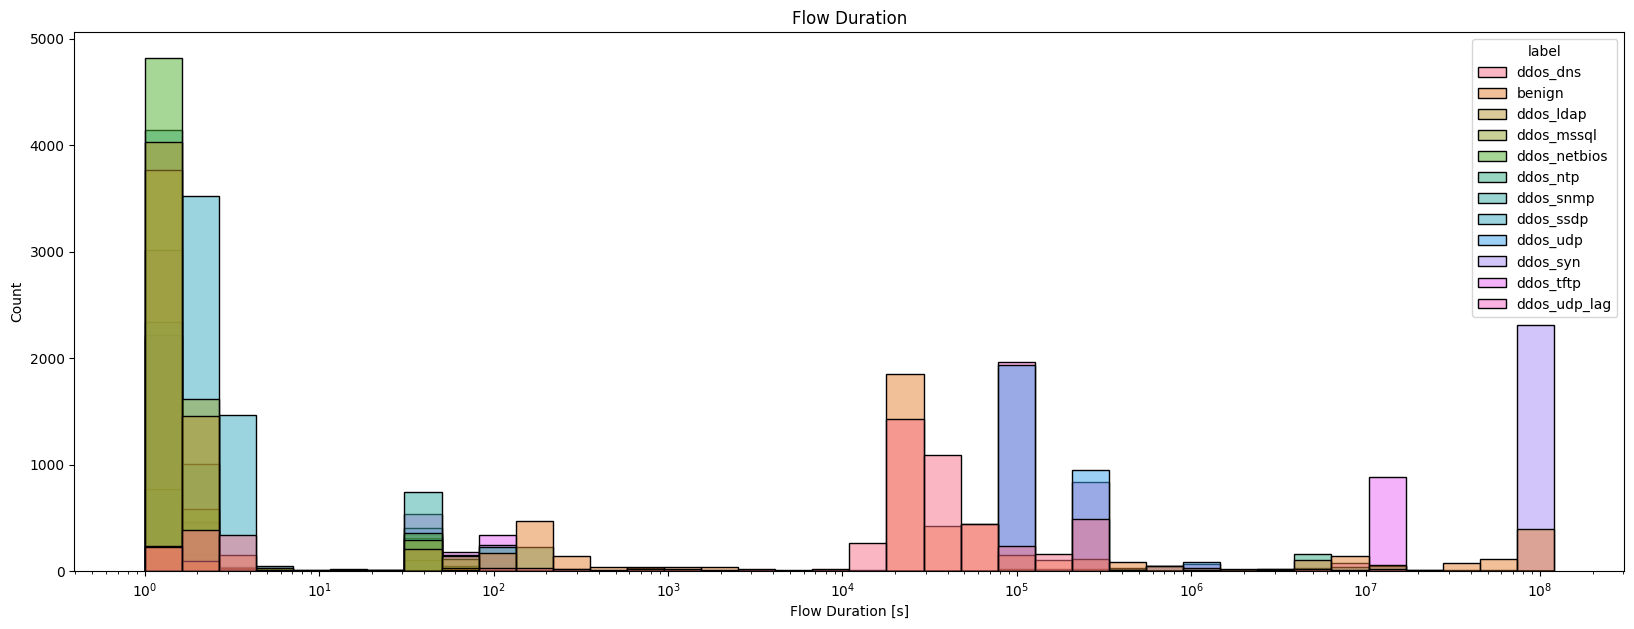

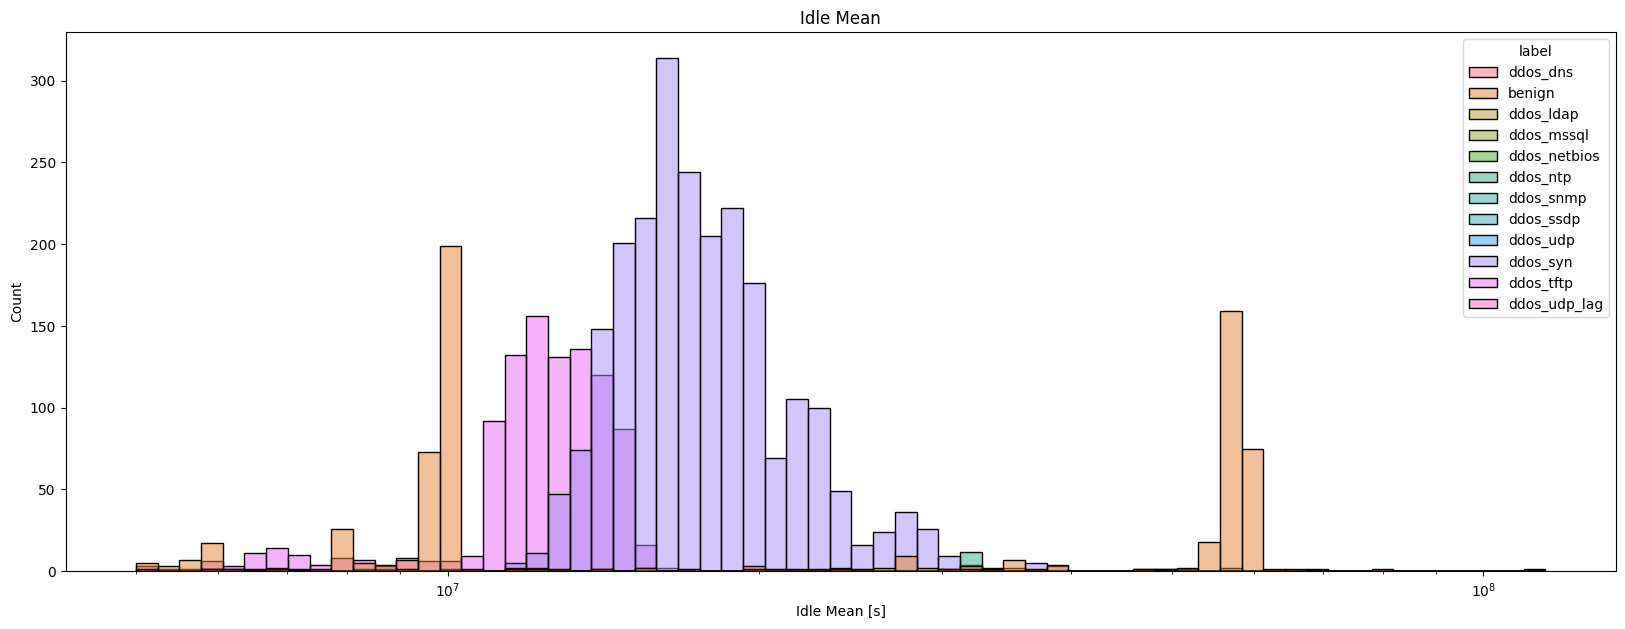

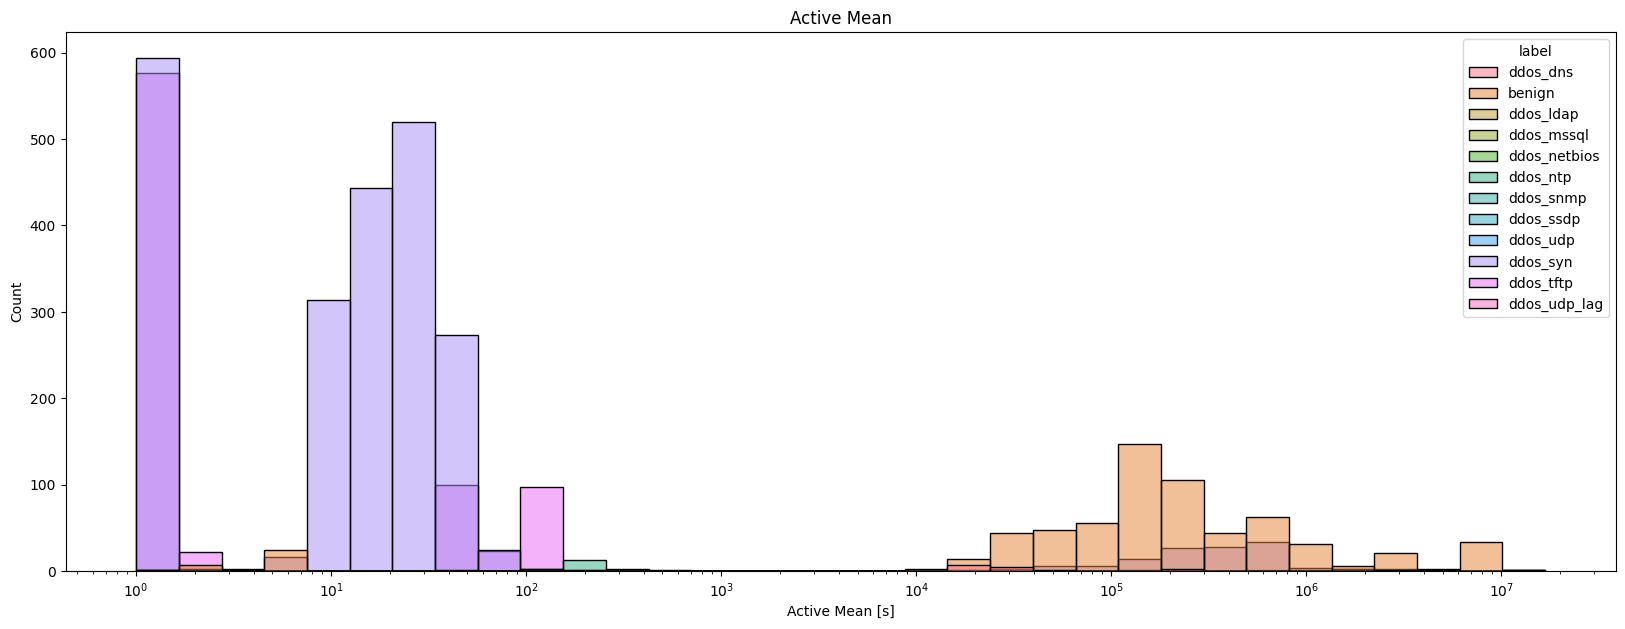

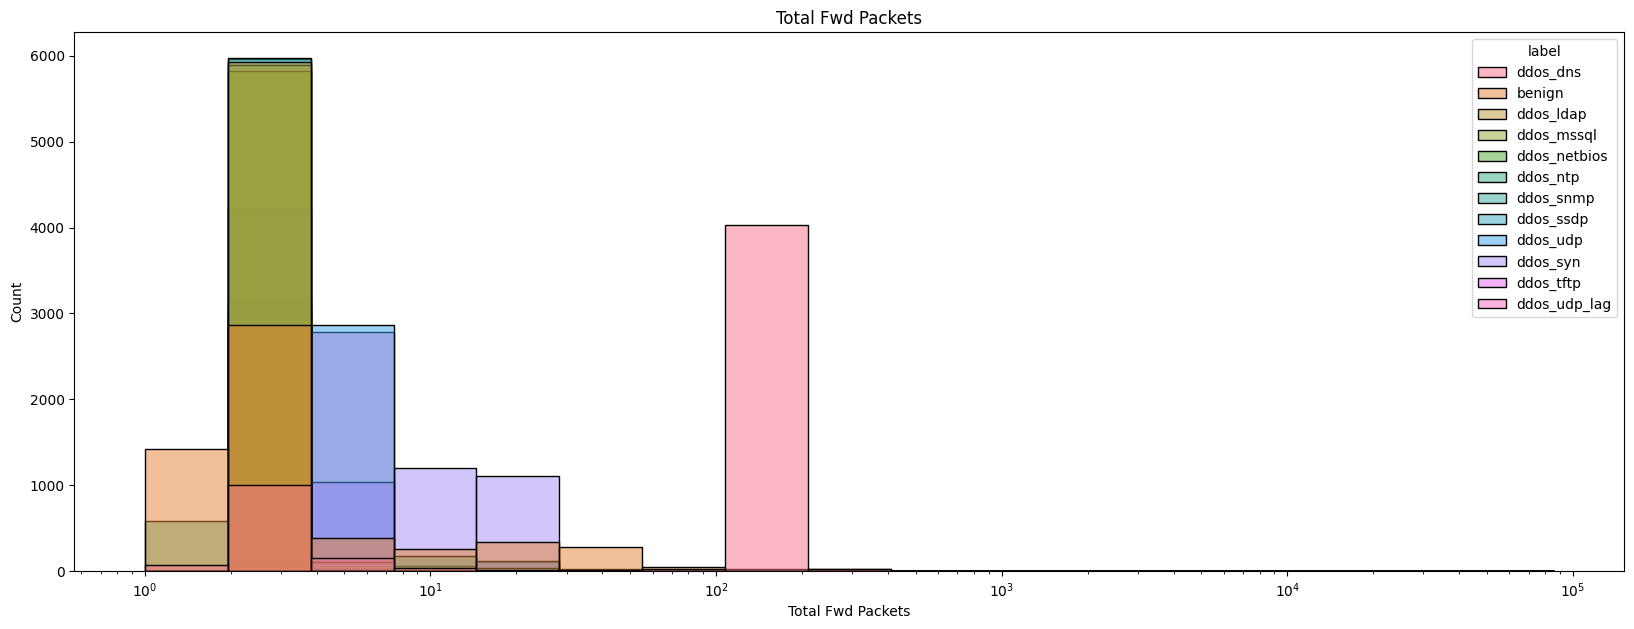

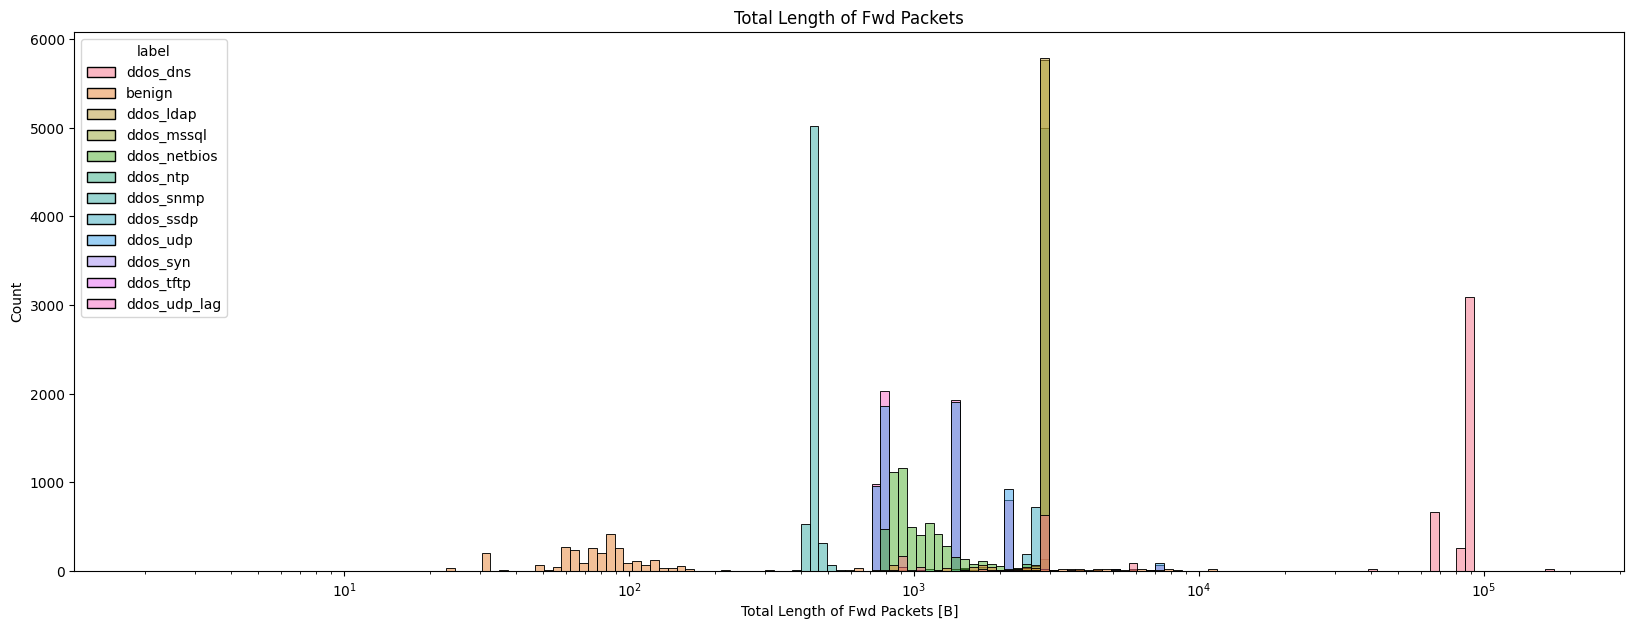

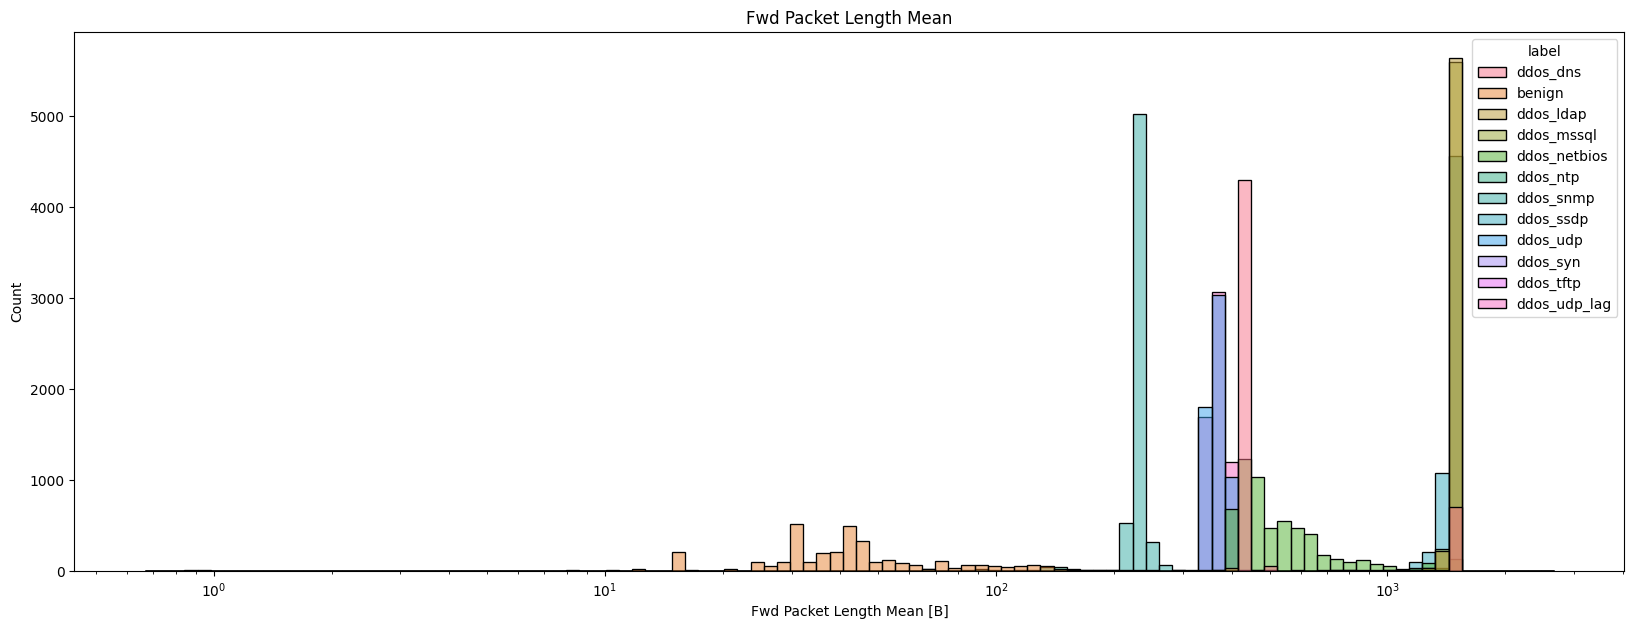

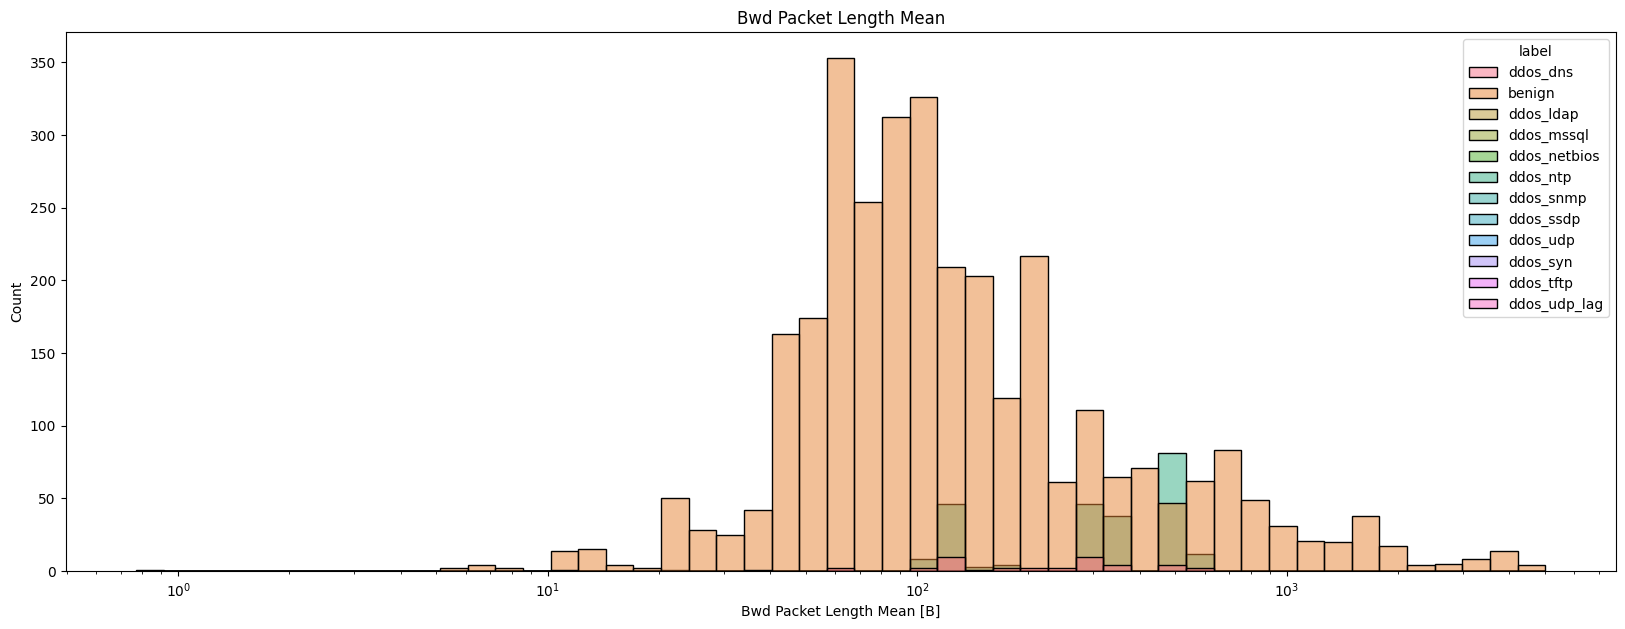

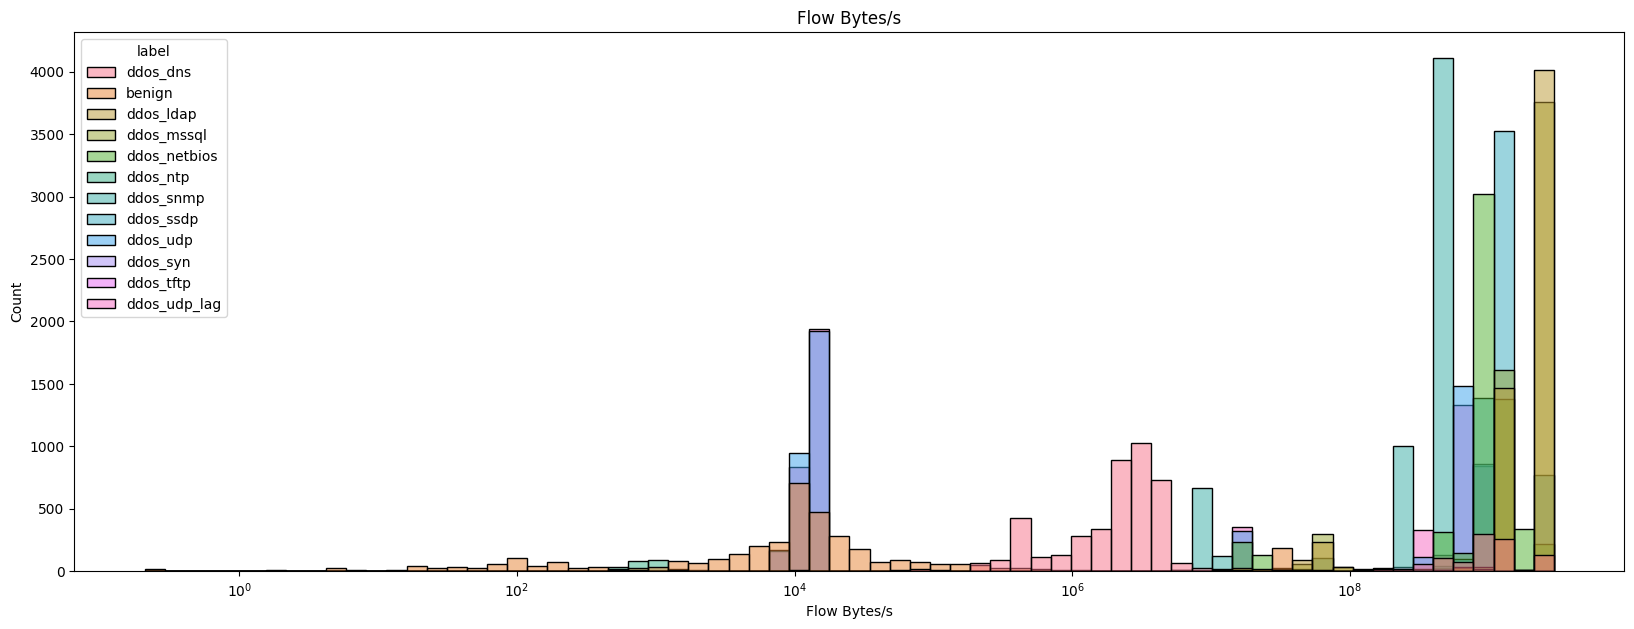

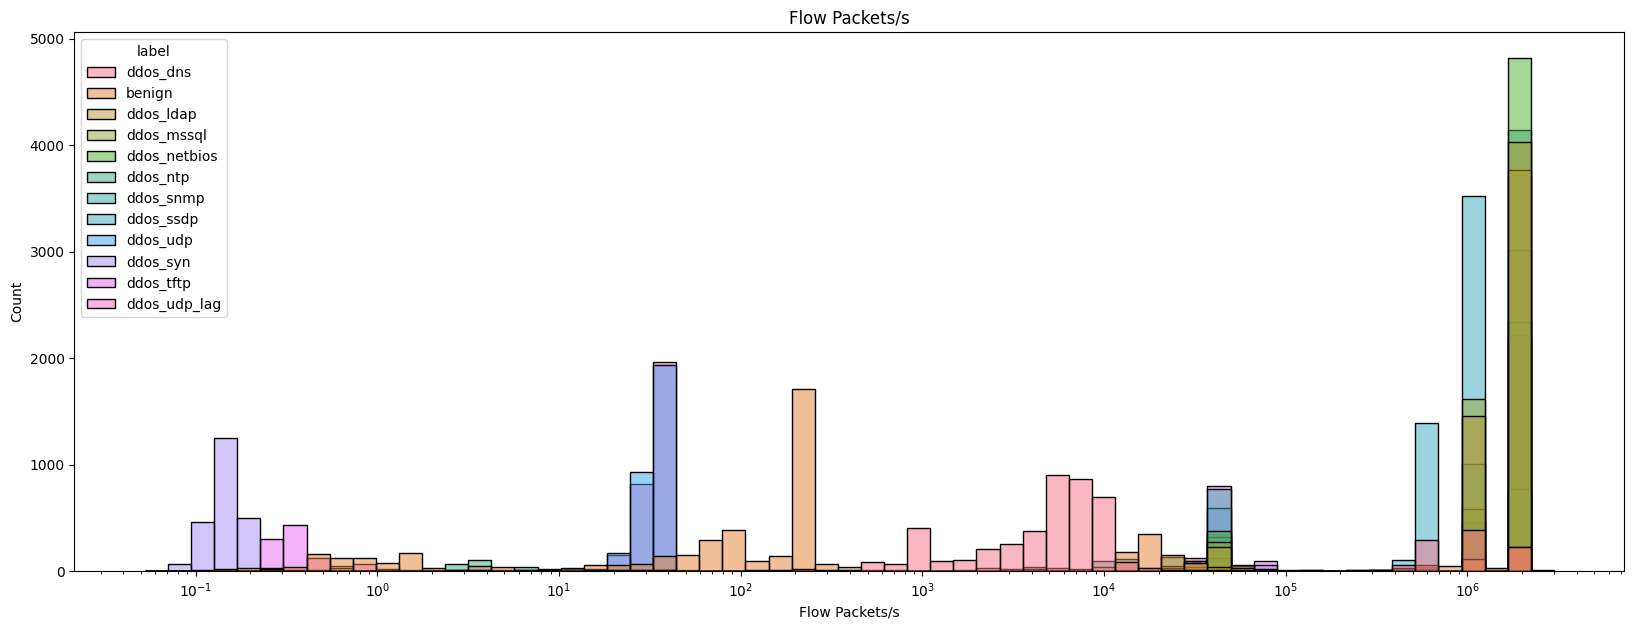

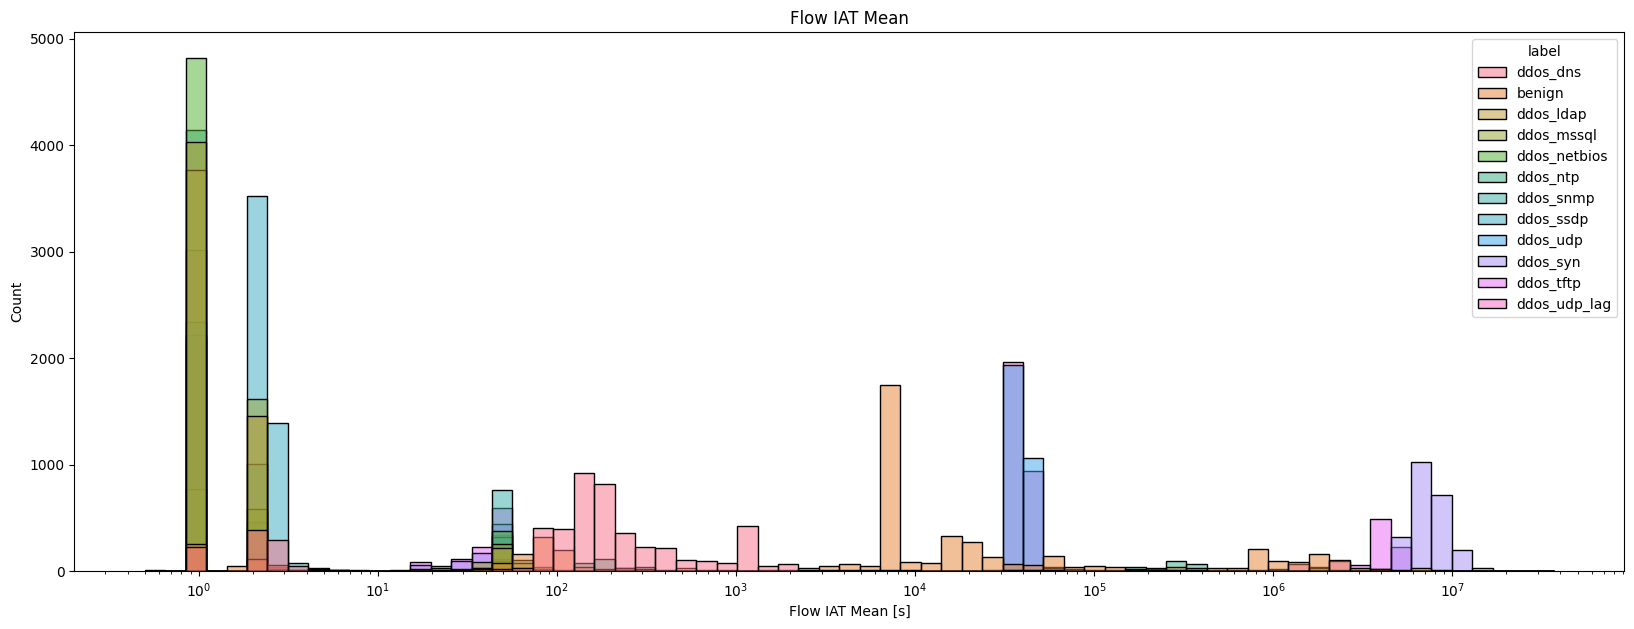

In [ ]:
#  Histograms
for col in ["Flow Duration",  "Idle Mean", "Active Mean", "Total Fwd Packets", "Total Length of Fwd Packets", "Fwd Packet Length Mean", "Bwd Packet Length Mean", "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean"]:
    plt.figure(figsize=(20,7))
    #sns.boxplot(data = df, x = col, y = "label", log_scale=True, ax = axes[0])
    sns.histplot(data = df, x = col, hue = "label", log_scale=True)
    #sns.kdeplot(data = df, x = col, hue = "label", log_scale=True, warn_singular=False, ax = axes[1])
    plt.title(col)
    #axes[0].set_title("Boxplot")
    if (('IAT' in col) or ('Duration' in col) or ('Active' in col) or ('Idle' in col)):
        col_label = f"{col} [μs]"
    elif ('Length' in col):
        col_label = f"{col} [B]"
    else:
        col_label=col
    plt.xlabel(col_label)
    plt.show()

- Flow duration: ddos_netbios and ddos_mssql are the shortest, benign and ddos_syn the longest
- Fwd packets: ddos_dns has the max num of packets sent (more than 100)
- Total length: ddos_dns has the max num of bytes sent 
- Bwd packet length it's nt really meaningful, not enough packets in flows different from benign
- Flow bytes/s: max for ddos_ldap and ddos_mssql
- Flow packets/s: max for ddos_ldap and ddos_mssql
- Flow IAT mean: low for ddos_ldap and ddos_mssql, ddos_syn, ddos_tffp and ddos_udp_lag have many different values.

Let's see which attacks the protocols are distributed among the different types of attacks: only the benign flows use both TCP and UDP, while the different attacks are based especially TCP or UDP.

In [258]:
df_copy = df[['label', 'Protocol']].copy()
df_copy = pd.get_dummies(df_copy,columns=['Protocol']).groupby('label').sum()
df_copy.rename(columns={'Protocol_0': 'HOPOPT', 'Protocol_6': 'TCP', 'Protocol_17': 'UDP'}, inplace=True)
df_copy['Total'] = df_copy['HOPOPT'] + df_copy['TCP'] + df_copy['UDP']
print("Number of flows per protocol per label")
df_copy

Number of flows per protocol per label


HOPOPT   TCP   UDP  Total
label                                  
benign            40  3454  2164   5658
ddos_dns           4   142  5223   5369
ddos_ldap          1     2  5925   5928
ddos_mssql         1     1  5909   5911
ddos_netbios       1     0  5829   5830
ddos_ntp           7   973     6    986
ddos_snmp          0     0  5984   5984
ddos_ssdp          1     3  5966   5970
ddos_syn           1  5479     0   5480
ddos_tftp          1  5257     3   5261
ddos_udp           1     0  5875   5876
ddos_udp_lag       0     0  5986   5986

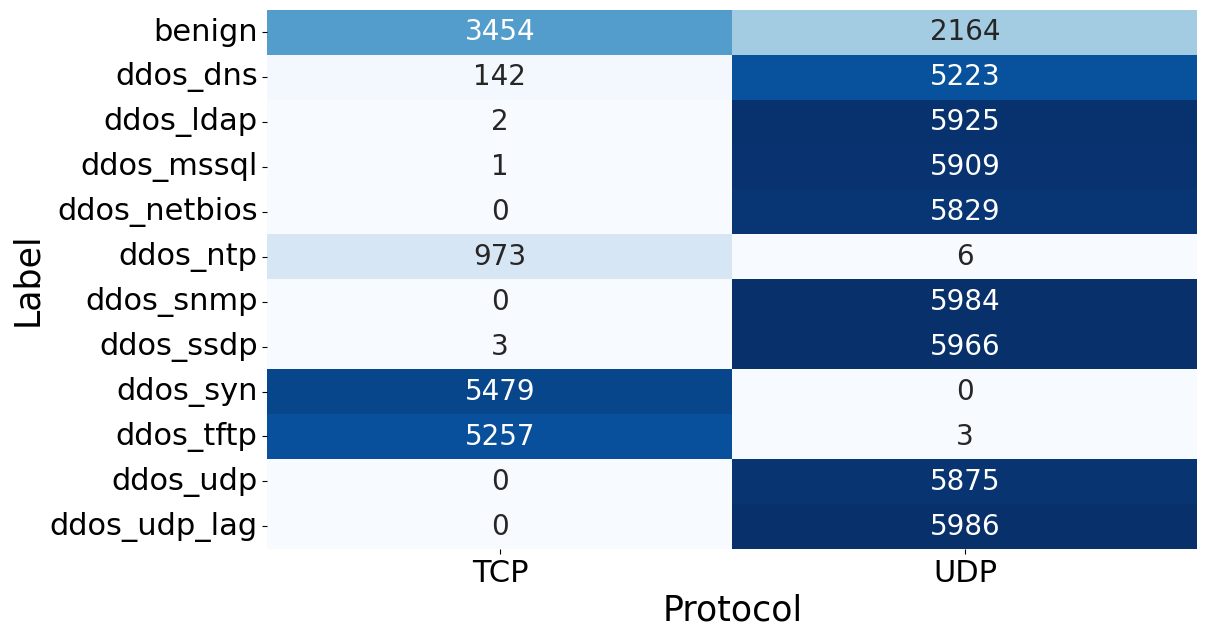

In [266]:
# Heatmap - number of flows per protocol
plt.figure(figsize=(12,7))
sns.heatmap(df_copy[['TCP', 'UDP']], cmap='Blues', annot=True, annot_kws={'size': 20}, cbar=False, fmt='d')
plt.xlabel("Protocol", fontsize=25)
plt.ylabel("Label", fontsize=25)
plt.tick_params(labelsize=22)
#plt.title("Heatmap attack-protocol")
plt.show()

Let's analyze the port distribution among the different flows. First of all, we consider two different cases:
- inbound communications: received by the device
- outbound communications: initializated by the device

Now we study the distribution of used protocols

In [31]:
df_copy = df[['Protocol', 'Inbound']].copy()
df_copy = pd.get_dummies(df_copy,columns=['Inbound']).groupby('Protocol').sum()
df_copy.rename(index={0: 'HOPOPT', 6: 'TCP', 17: 'UDP'}, inplace=True)
df_copy['Total'] = df_copy['Inbound_0'] + df_copy['Inbound_1']
print("Number of flows per protocol")
df_copy

Number of flows per protocol


Inbound_0  Inbound_1  Total
Protocol                             
HOPOPT           40         18     58
TCP            2751      12560  15311
UDP            2376      46494  48870

The protocol number 6 is TCP, the 17 is UDP, while 0 is IPv6 Hop-by-hop-option. Since the latter is the smallest and, as seen before, it's mostly composed of benign traffic, let's skip it for the moment. The majority of the traffic is inbound, while only a small part of the flows have been started from the destination. Let's see the source and destination port distributions.

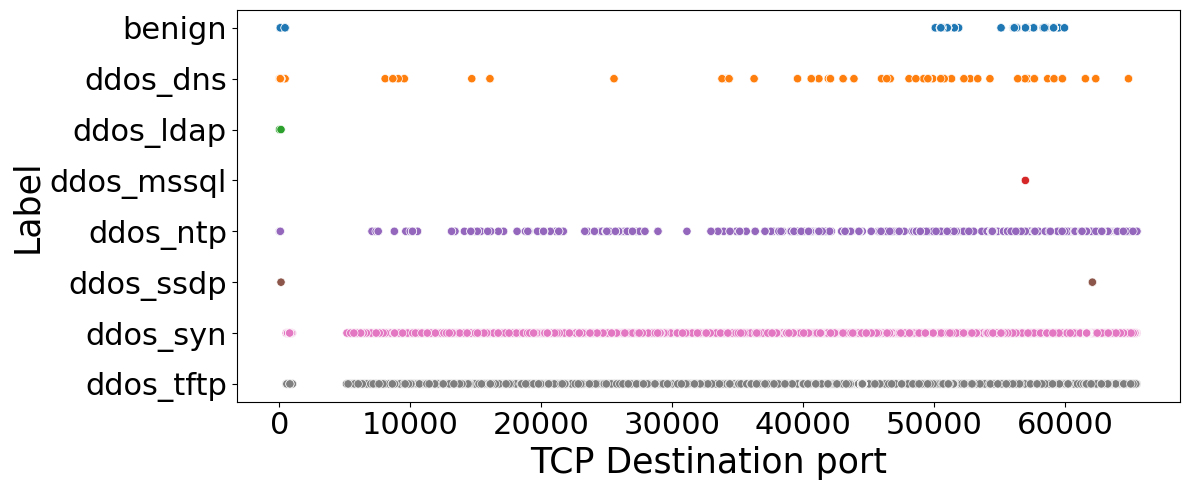

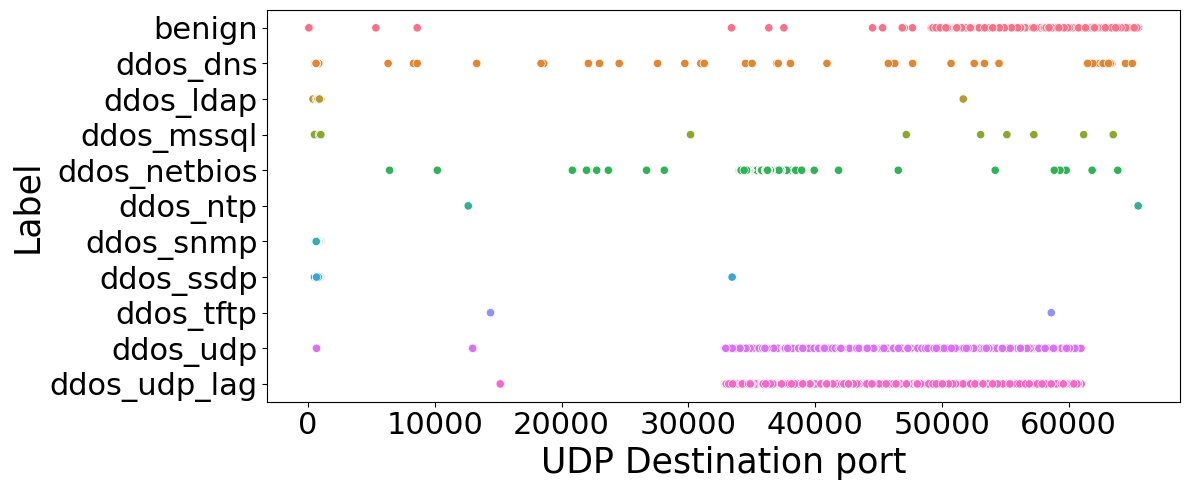

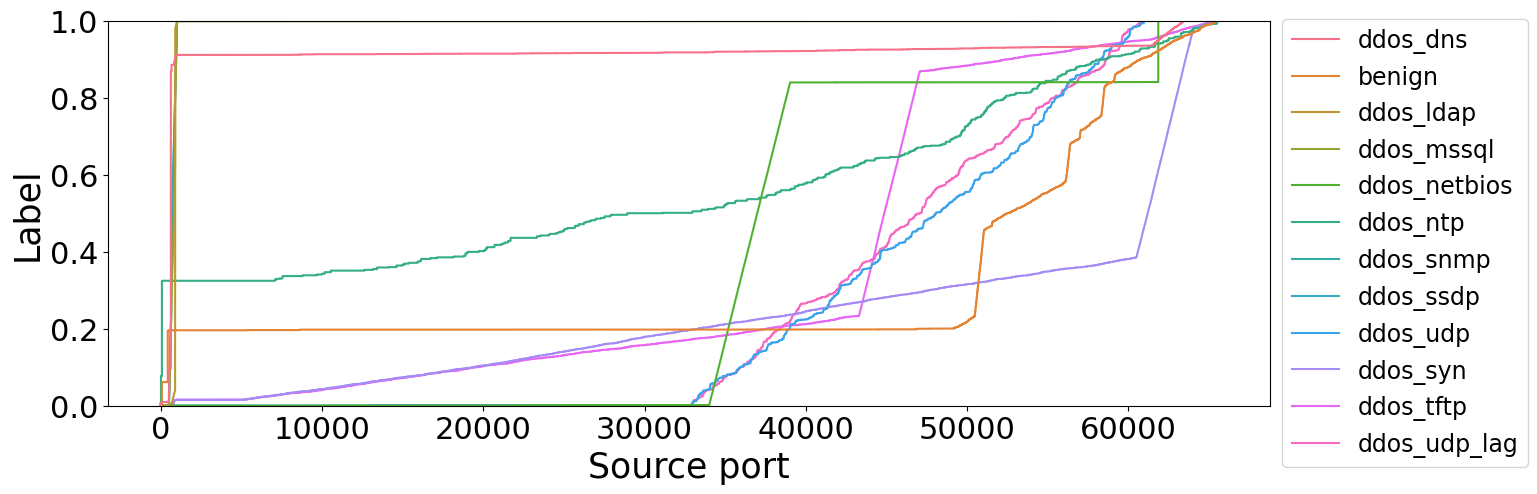

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(data = df.loc[(df['Protocol'] == 6)].sort_values(by="label"), x = "Source Port", y = "label", hue = 'label', legend = False)
plt.xlabel("TCP source port")
plt.ylabel("Label")
plt.tight_layout()

plt.figure(figsize=(12,5))
sns.scatterplot(data = df.loc[(df['Protocol'] == 17)].sort_values(by="label"), x = "Source Port", y = "label", hue = 'label', legend = False)
plt.xlabel("UDP source port")
plt.ylabel("Label")
plt.tight_layout()

plt.show()

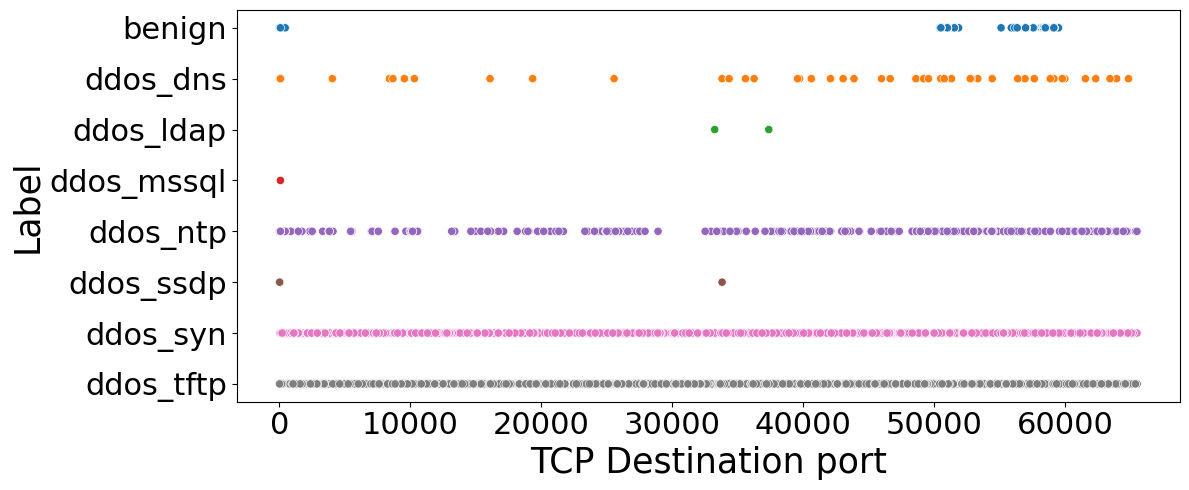

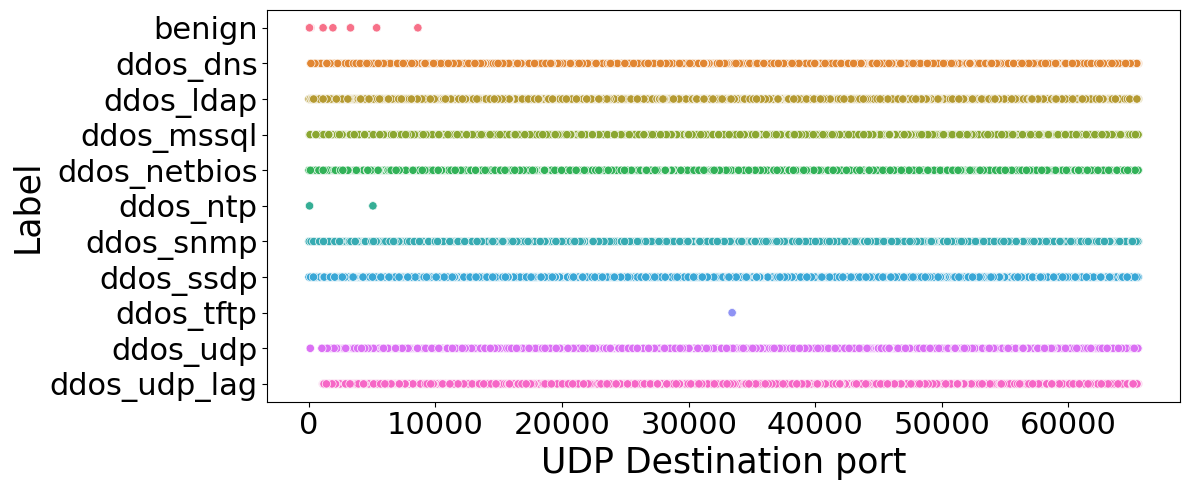

In [ ]:
# Scatterplot - dst ports
plt.figure(figsize=(12,5))
sns.scatterplot(data = df.loc[(df['Protocol'] == 6)].sort_values(by="label"), x = "Destination Port", y = "label", hue = 'label', legend = False)
plt.xlabel("TCP destination port")
plt.ylabel("Label")
plt.tight_layout()

plt.figure(figsize=(12,5))
sns.scatterplot(data = df.loc[(df['Protocol'] == 17)].sort_values(by="label"), x = "Destination Port", y = "label", hue = 'label', legend = False)
plt.xlabel("UDP destination port")
plt.ylabel("Label")
plt.tight_layout()

plt.show()



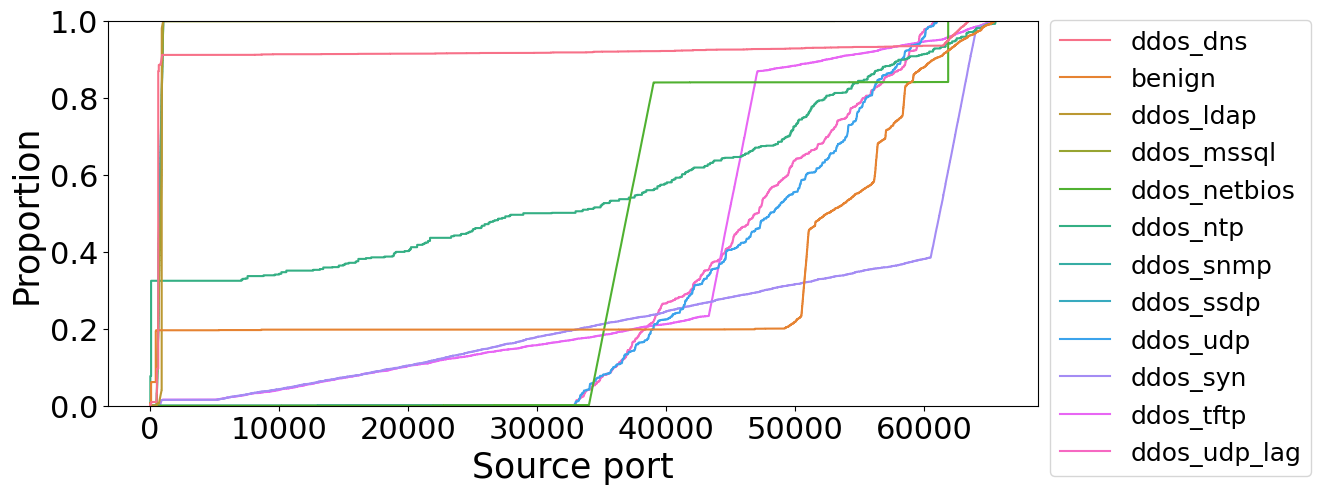

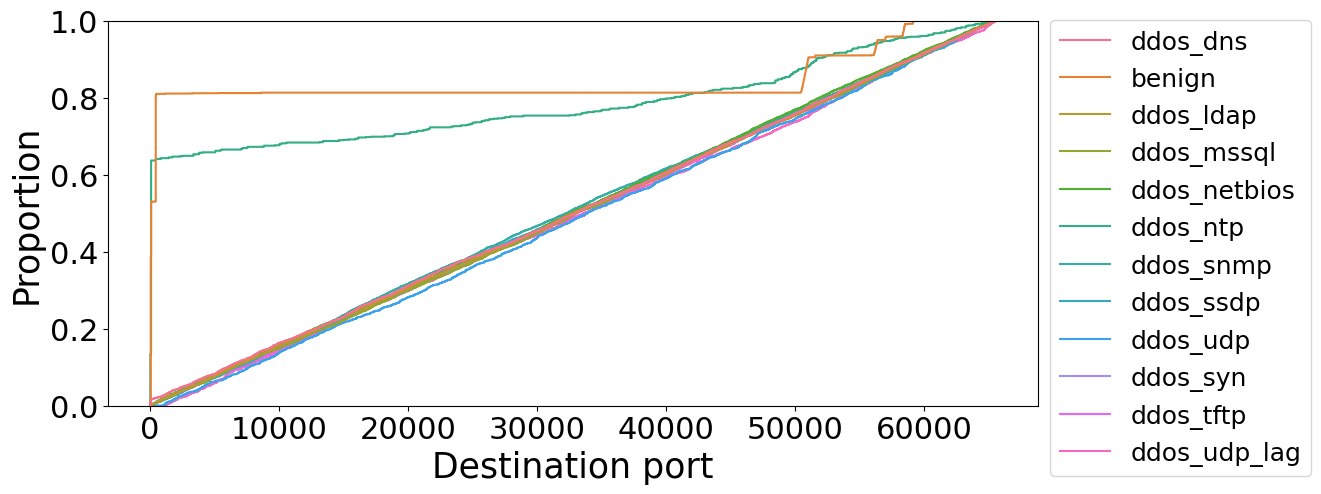

In [318]:
# ECDF of source/destination ports
plt.figure(figsize=(12,5))
ax = sns.ecdfplot(data=df, x = "Source Port", hue="label")
plt.xlabel("Source port", fontsize=25)
plt.ylabel("Proportion", fontsize=25)
sns.move_legend(ax, bbox_to_anchor=(1, 1.035), loc="upper left", title=None, fontsize=18)
plt.tick_params(labelsize=22)
#plt.title(" ECDF source ports per label")
plt.show()

plt.figure(figsize=(12,5))
ax = sns.ecdfplot(data=df, x = "Destination Port", hue="label")
plt.xlabel("Destination port", fontsize=25)
plt.ylabel("Proportion", fontsize=25)
sns.move_legend(ax, bbox_to_anchor=(1, 1.035), loc="upper left", title=None, fontsize=18)
plt.tick_params(labelsize=22)
#plt.title(" ECDF source ports per label")
plt.show()

The source ports are characteristics for each type of attack, while all the attacks use different destination ports (with the exception of benign and ddos_ntp).

The port numbers in the range from 0 to 1023 are the well-known ports or system ports. They are used by system processes that provide widely used types of network services.  The range of port numbers from 1024 to 49151 are the registered ports. They are assigned by IANA for specific service upon application by a requesting entity. On most systems, registered ports can be used without superuser privileges. The range 49152–65535 contains dynamic or private ports that cannot be registered with IANA. This range is used for private or customized services, for temporary purposes, and for automatic allocation of ephemeral ports.

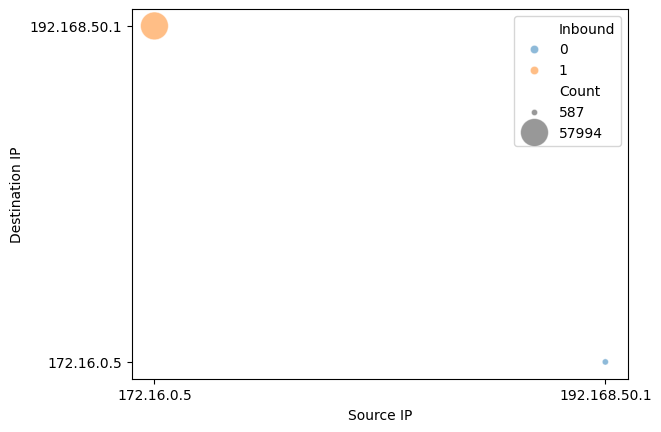

Flow ID  Source Port  Destination Port  Protocol  \
Source IP  Destination IP                                                     
172.16.0.5 192.168.50.1      57994        57994             57994     57994   

                           Timestamp  Flow Duration  Total Fwd Packets  \
Source IP  Destination IP                                                
172.16.0.5 192.168.50.1        57994          57994              57994   

                           Total Backward Packets  \
Source IP  Destination IP                           
172.16.0.5 192.168.50.1                     57994   

                           Total Length of Fwd Packets  \
Source IP  Destination IP                                
172.16.0.5 192.168.50.1                          57994   

                           Total Length of Bwd Packets  Fwd Packet Length Max  \
Source IP  Destination IP                                                       
172.16.0.5 192.168.50.1                          57994                  57994   

                           Fwd Packet Length Min  Fwd Packet Length Mean  \
Source IP  Destination IP                                                  
172.16.0.5 192.168.50.1                    57994                   57994   

                           Fwd Packet Length Std  Bwd Packet Length Max  \
Source IP  Destination IP                                                 
172.16.0.5 192.168.50.1                    57994                  57994   

                           Bwd Packet Length Min  Bwd Packet Length Mean  \
Source IP  Destination IP                                                  
172.16.0.5 192.168.50.1                    57994                   57994   

                           Bwd Packet Length Std  Flow Bytes/s  \
Source IP  Destination IP                                        
172.16.0.5 192.168.50.1                    57994         57994   

                           Flow Packets/s  Flow IAT Mean  Flow IAT Std  \
Source IP  Destination IP                                                
172.16.0.5 192.168.50.1             57994          57994         57994   

                           Flow IAT Max  Flow IAT Min  Fwd IAT Total  \
Source IP  Destination IP                                              
172.16.0.5 192.168.50.1           57994         57994          57994   

                           Fwd IAT Mean  Fwd IAT Std  Fwd IAT Max  \
Source IP  Destination IP                                           
172.16.0.5 192.168.50.1           57994        57994        57994   

                           Fwd IAT Min  Bwd IAT Total  Bwd IAT Mean  \
Source IP  Destination IP                                             
172.16.0.5 192.168.50.1          57994          57994         57994   

                           Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  \
Source IP  Destination IP                                          
172.16.0.5 192.168.50.1          57994        57994        57994   

                           Fwd PSH Flags  Bwd PSH Flags  Fwd URG Flags  \
Source IP  Destination IP                                                
172.16.0.5 192.168.50.1            57994          57994          57994   

                           Bwd URG Flags  Fwd Header Length  \
Source IP  Destination IP                                     
172.16.0.5 192.168.50.1            57994              57994   

                           Bwd Header Length  Fwd Packets/s  Bwd Packets/s  \
Source IP  Destination IP                                                    
172.16.0.5 192.168.50.1                57994          57994          57994   

                           Min Packet Length  Max Packet Length  \
Source IP  Destination IP                                         
172.16.0.5 192.168.50.1                57994              57994   

                           Packet Length Mean  Packet Length Std  \
Source IP  Destination IP                                          
172.16.0.5 192.168.50.1                 57994      

In [33]:
# Bubble plot - src/dst ip
df_copy_inbound1 = df[df['label'] != 'benign'].copy()
df_copy_inbound1 = df_copy_inbound1.groupby(["Source IP", "Destination IP", "Inbound"]).count()
df_copy_inbound1.rename({'Flow ID': "Count"}, axis=1, inplace=True)
# use the scatterplot function
sns.scatterplot(
    data=df_copy_inbound1,
    x="Source IP",
    y="Destination IP",
    size="Count",
    hue = "Inbound",
    alpha=0.5,
    sizes=(20, 400)
)
plt.xticks()
plt.yticks()
plt.tight_layout
# show the graph
plt.show()

df[(df['label'] != 'benign') & (df['Inbound'] == 1)].groupby(["Source IP", "Destination IP"]).count()

The traffic of the attacks is always between the same two addresses (source and destination depending on outbound and inbound).

Now, let's analyze the proportion of the different flags in the different attacks. Proportion of flagged packets on all packets.

In [ ]:
# Mean of flagged packets in tcp traffic
df_copy = df[df['Protocol']==6][['label', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Inbound']].copy()
df_copy = df_copy.groupby('label').mean()

df_copy

FIN Flag Count  SYN Flag Count  RST Flag Count  PSH Flag Count  \
label                                                                        
benign                 0.0        0.008107        0.165316             0.0   
ddos_dns               0.0        0.042254        0.035211             0.0   
ddos_ldap              0.0        0.500000        0.500000             0.0   
ddos_mssql             0.0        0.000000        0.000000             0.0   
ddos_ntp               0.0        0.001028        0.009250             0.0   
ddos_ssdp              0.0        0.666667        0.333333             0.0   
ddos_syn               0.0        0.000000        0.000000             0.0   
ddos_tftp              0.0        0.000000        0.000000             0.0   

            ACK Flag Count  URG Flag Count  CWE Flag Count  ECE Flag Count  \
label                                                                        
benign            0.316734        0.682397        0.441228             0.0   
ddos_dns          0.366197        0.633803        0.556338             0.0   
ddos_ldap         0.000000        1.000000        0.000000             0.0   
ddos_mssql        1.000000        0.000000        0.000000             0.0   
ddos_ntp          0.362795        0.637205        0.628983             0.0   
ddos_ssdp         0.000000        1.000000        0.333333             0.0   
ddos_syn          1.000000        0.000000        0.000000             0.0   
ddos_tftp         1.000000        0.000000        0.000000             0.0   

             Inbound  
label                 
benign      0.309496  
ddos_dns    0.647887  
ddos_ldap   0.000000  
ddos_mssql  1.000000  
ddos_ntp    0.678314  
ddos_ssdp   0.666667  
ddos_syn    1.000000  
ddos_tftp   1.000000

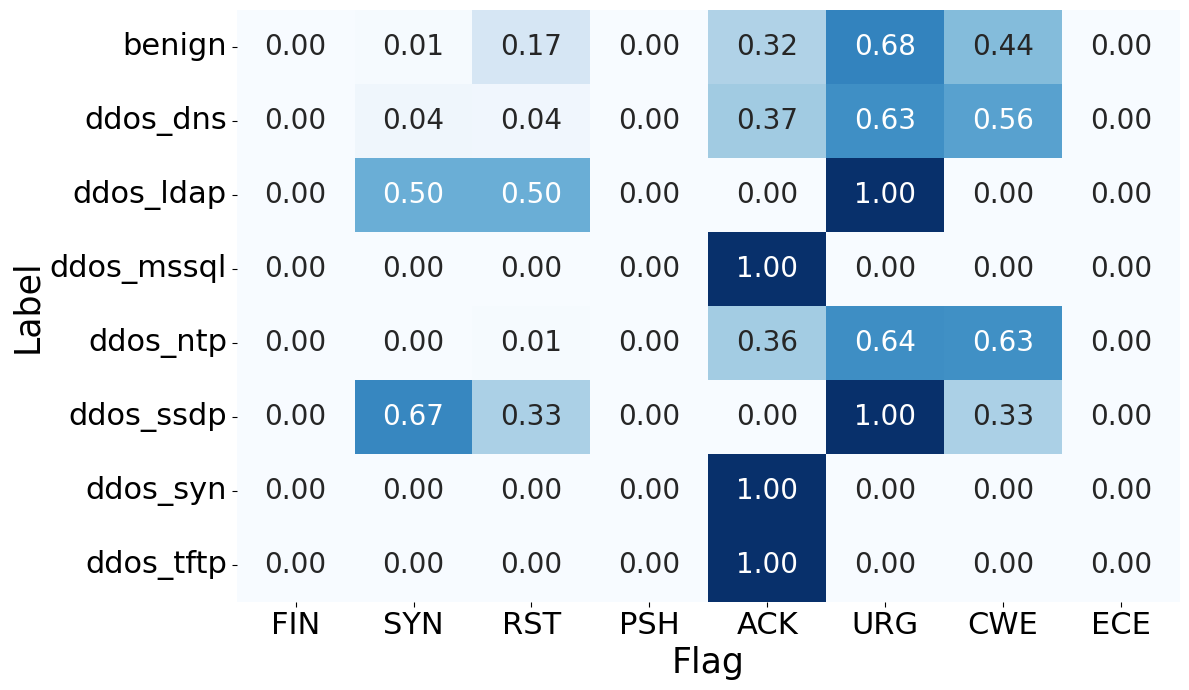

In [289]:
# Heatmap - mean flagged packets in TCP per flow
df_copy = df[df['Protocol'] == 6].copy()
df_copy = df_copy[['label', 'Total Fwd Packets', 'Total Backward Packets', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count']].groupby('label').mean()

plt.figure(figsize=(12,7))
sns.heatmap(df_copy.iloc[:, 2:], cmap='Blues', annot=True, annot_kws={'size': 20}, cbar=False, fmt='.2f')
plt.xlabel("Flag", fontsize=25)
plt.ylabel("Label", fontsize=25)
plt.tick_params(labelsize=22)
plt.xticks(np.arange(8)+0.5, ['FIN', 'SYN', 'RST', 'PSH', 'ACK', 'URG', 'CWE', 'ECE'])
#plt.title("Heatmap attack-flag")
plt.tight_layout()
plt.show()

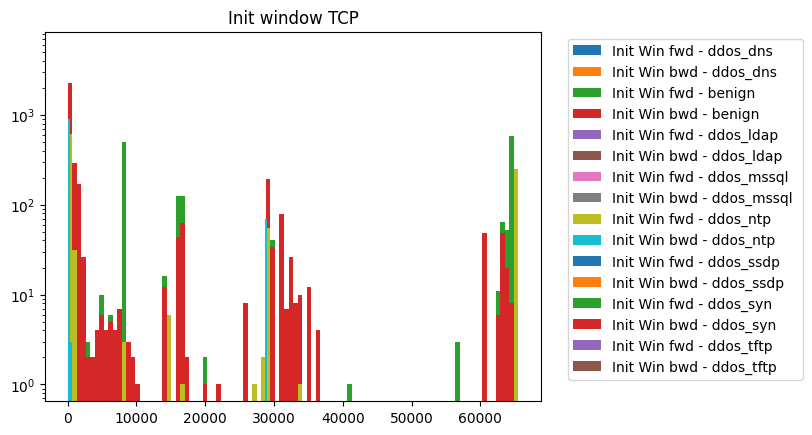

In [36]:
# Histogram - init window size in TCP
df_tcp = df[df['Protocol'] == 6].copy()

plt.figure()
for label in df_tcp['label'].unique():
    plt.hist(x=df_tcp[df_tcp['label'] == label]['Init_Win_bytes_forward'], bins = 100, label=f"Init Win fwd - {label}")
    plt.hist(x=df_tcp[df_tcp['label'] == label]['Init_Win_bytes_backward'], bins = 100, label =f"Init Win bwd - {label} ")

plt.yscale('log')
plt.title('Init window TCP')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [413]:
df_copy = df[['label', 'Total Fwd Packets', 'Total Backward Packets', 'Inbound']]

df_copy= df_copy.groupby(['label', 'Inbound']).count()
df_copy

Total Fwd Packets  Total Backward Packets
label        Inbound                                           
benign       0                     4580                    4580
             1                     1078                    1078
ddos_dns     0                      259                     259
             1                     5110                    5110
ddos_ldap    0                        4                       4
             1                     5924                    5924
ddos_mssql   0                        1                       1
             1                     5910                    5910
ddos_netbios 0                        1                       1
             1                     5829                    5829
ddos_ntp     0                      316                     316
             1                      670                     670
ddos_snmp    0                        1                       1
             1                     5983                    5983
ddos_ssdp    0                        2                       2
             1                     5968                    5968
ddos_syn     1                     5480                    5480
ddos_tftp    0                        1                       1
             1                     5260                    5260
ddos_udp     0                        1                       1
             1                     5875                    5875
ddos_udp_lag 0                        1                       1
             1                     5985                    5985

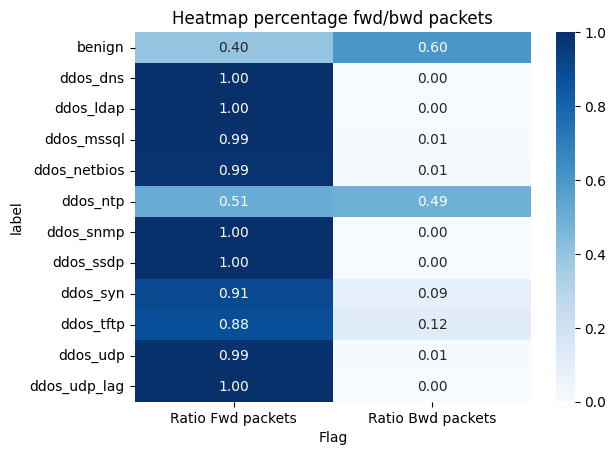

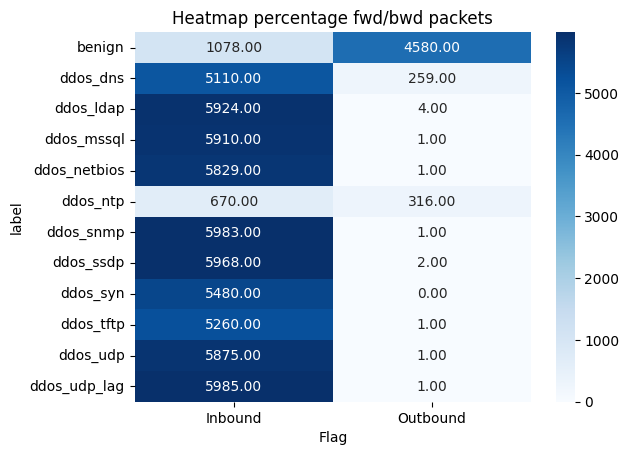

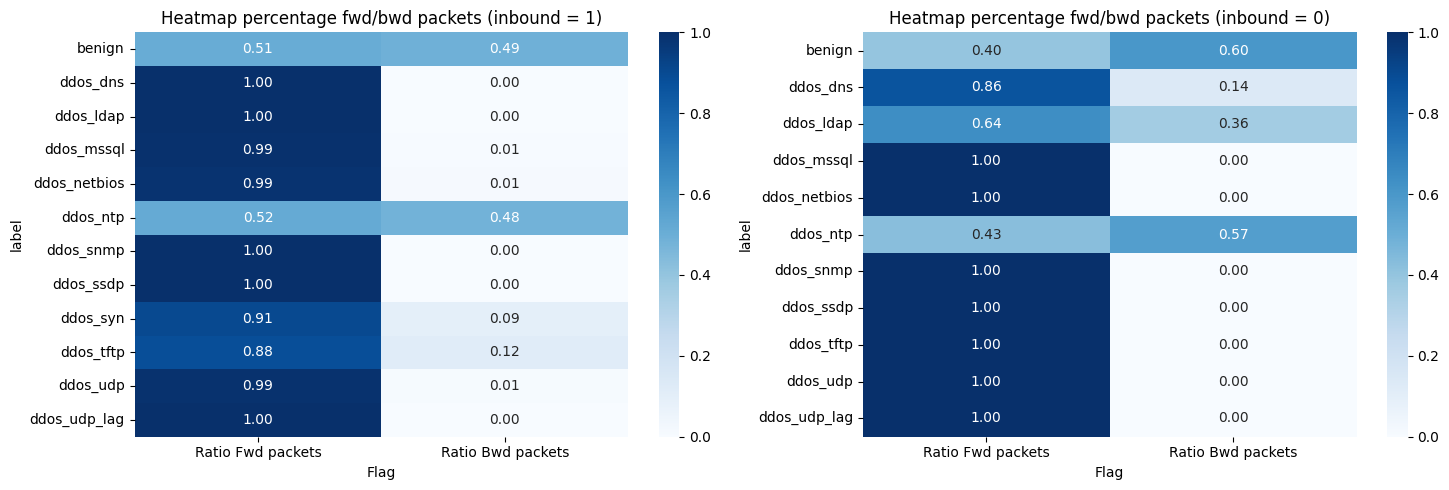

In [ ]:
# Heatmap - fwd/bwd packets
df_copy = df.copy()
df_copy = df_copy[['label', 'Total Fwd Packets', 'Total Backward Packets']].groupby('label').mean()
df_copy['Total Packets'] = df_copy['Total Fwd Packets'] + df_copy['Total Backward Packets']
df_copy["Ratio Fwd packets"] = df_copy['Total Fwd Packets'] / df_copy['Total Packets']
df_copy["Ratio Bwd packets"] = df_copy['Total Backward Packets'] / df_copy['Total Packets']
plt.plot()
sns.heatmap(df_copy.iloc[:, 3:], cmap='Blues', annot=True, fmt='.2f')
plt.xlabel("Flag")
plt.title("Heatmap percentage fwd/bwd packets")
plt.show()

df_copy_1 = df.copy()
df_copy = df_copy_1[['label', 'Inbound']].groupby('label').sum()
df_copy['Outbound'] = df_copy_1[['label', 'Inbound']].groupby('label').size() - df_copy['Inbound']
plt.plot()
sns.heatmap(df_copy, cmap='Blues', annot=True, fmt='.2f')
plt.xlabel("Flag")
plt.title("Heatmap inbound/outbound flows")
plt.show()

The majority of the attacks have traffic only in the fwd direction.

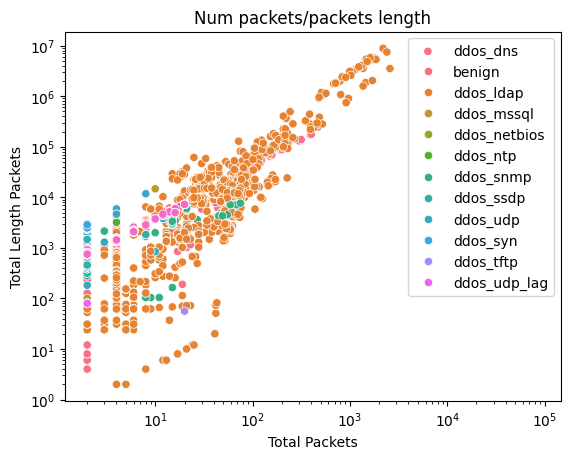

In [40]:
# Lineplot - num packets/lenght per label
df_copy = df.copy()
# Additional metrics
df_copy["Total Packets"] = df_copy["Total Fwd Packets"] + df_copy["Total Backward Packets"]
df_copy["Total Length Packets"] = df_copy["Total Length of Fwd Packets"] + df_copy["Total Length of Bwd Packets"]
plt.figure()
sns.scatterplot(data = df_copy, x = "Total Packets", y = "Total Length Packets", hue="label")
plt.legend([f'{label}' for label in df['label'].unique()])
plt.yscale('log')
plt.xscale('log')
plt.title("Num packets/packets length")
plt.show()

SimillarHTTP
0                                                                                                                    63761
205.174.165.72/c.php                                                                                                   151
ocsp.digicert.com/                                                                                                      25
ocsp.pki.goog/GTSGIAG3                                                                                                  24
205.174.165.72/c.php?ip=10.148.118.37                                                                                   12
                                                                                                                     ...  
talebi.ca/wp-content/uploads/2017/09/index.jpeg                                                                          1
talebi.ca/wp-content/uploads/2017/08/linux.jpg                                                                           1
tal

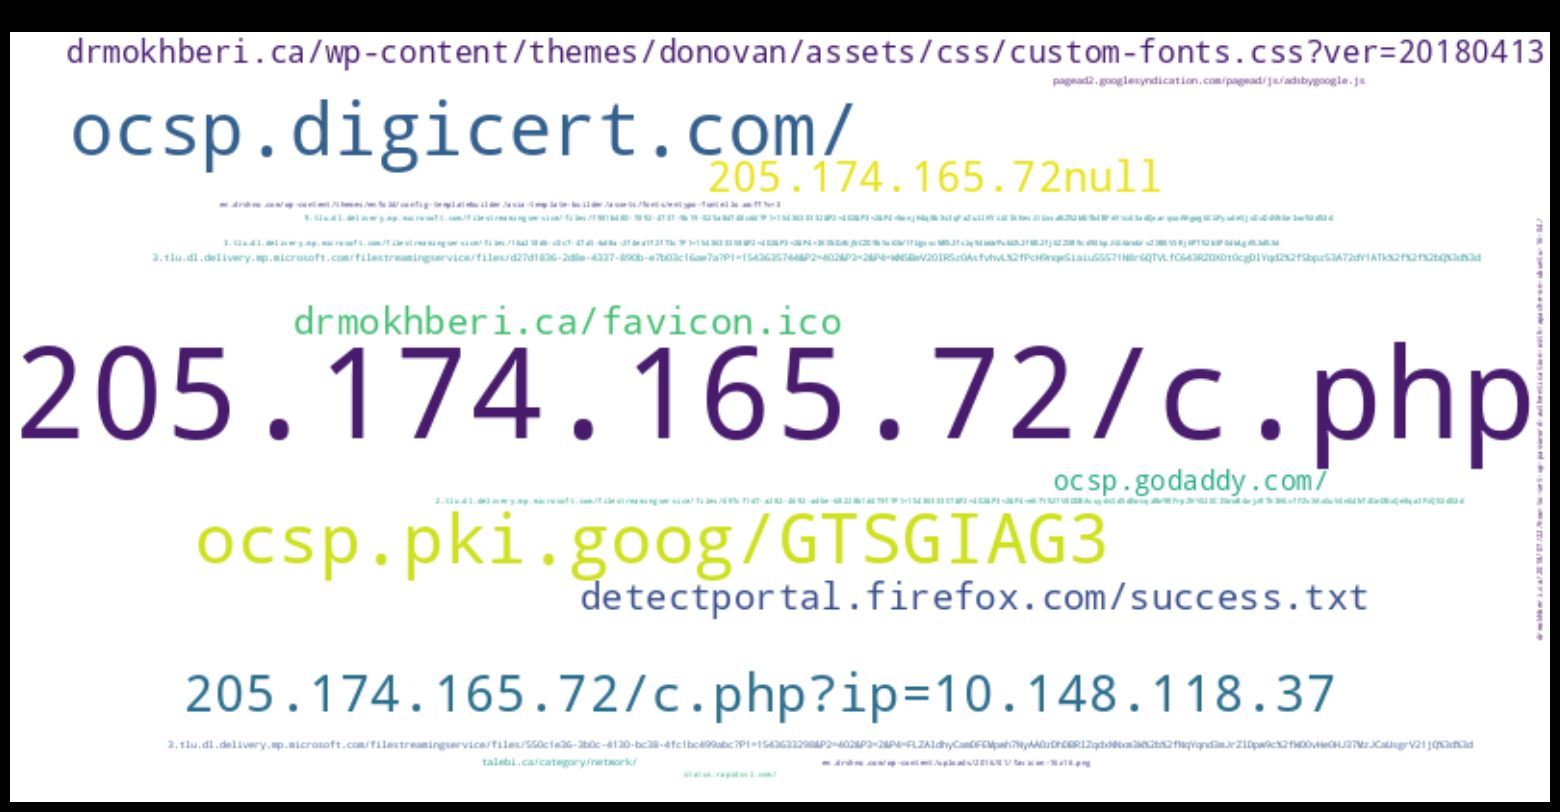

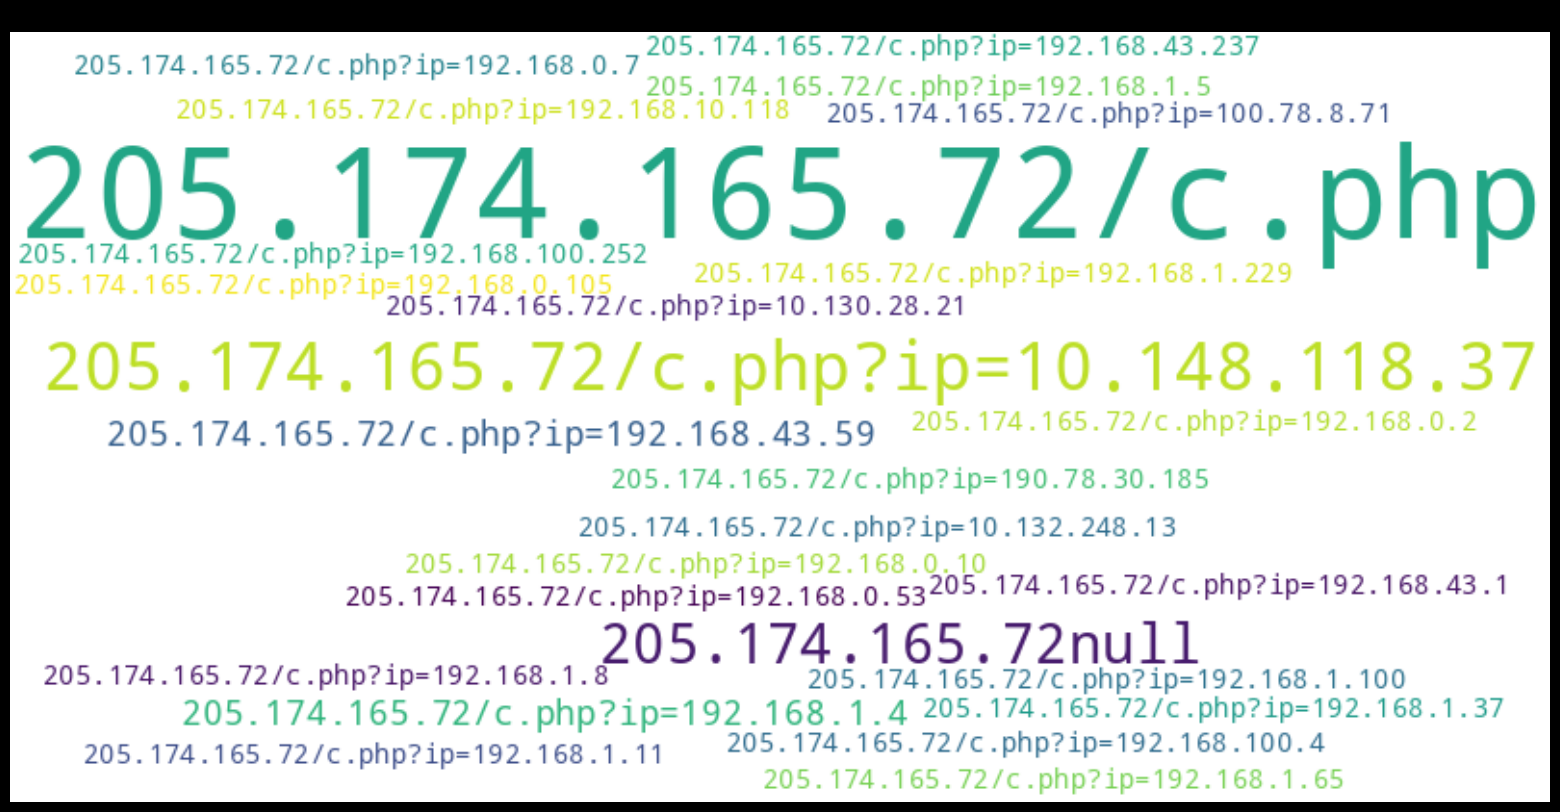

In [42]:
# Wordcloud - SimillarHTTP
from wordcloud import WordCloud

print(df['SimillarHTTP'].value_counts())
mask = df['SimillarHTTP'] != '0'

# Wordcloud for SimillarHTTP for all the traffic
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=300, max_words=100, width=800, height=400, background_color="white").generate_from_frequencies((df[df['SimillarHTTP'] != '0'])['SimillarHTTP'].value_counts())
plt.figure(figsize=(20,10), facecolor='k')
plt.tight_layout(pad=0)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for SimillarHTTP for all the traffic")
plt.show()

# "Wordcloud for SimillarHTTP for ddos attacks traffic"
wordcloud = WordCloud(max_font_size=300, max_words=100, width=800, height=400, background_color="white").generate_from_frequencies((df[(df['SimillarHTTP'] != '0') & (df['label'] != 'benign')] )['SimillarHTTP'].value_counts())
plt.figure(figsize=(20,10), facecolor='k')
plt.tight_layout(pad=0)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for SimillarHTTP for ddos attacks traffic")
plt.show()

In the majority of the samples SimillarHTTP is 0; in ddos attacks we have especially requests to 205.174.165.72/c.php.

## New features
Now, let's generate and visualize some additional features per label.

In [67]:
columns_not_analyzed = ['Source Port', 'Destination Port', 'Protocol', 'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Fwd PSH Flags', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'Inbound', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Header Length.1', 'min_seg_size_forward', 'Fwd Avg Bytes/Bulk',  'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',  'Bwd Avg Packets/Bulk',  'Bwd Avg Bulk Rate', 'PSH Flag Count', 'FIN Flag Count', 'ECE Flag Count', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags']
df_analysis = df.drop(columns_not_analyzed, axis=1)

df_described = df_analysis.groupby('label').describe()
df_described

Flow Duration                                            \
                     count          mean           std  min      25%   
label                                                                  
benign              5658.0  1.029146e+07  3.036830e+07  1.0   1285.5   
ddos_dns            5369.0  2.461409e+05  3.061254e+06  1.0  17632.0   
ddos_ldap           5928.0  2.234917e+03  1.248462e+05  1.0      1.0   
ddos_mssql          5911.0  2.624598e+04  1.576821e+06  1.0      1.0   
ddos_netbios        5830.0  2.375007e+04  1.572991e+06  1.0      1.0   
ddos_ntp             986.0  3.204328e+06  8.736076e+06  1.0    128.0   
ddos_snmp           5984.0  8.033757e+00  2.566055e+01  1.0      1.0   
ddos_ssdp           5970.0  2.695504e+04  1.633672e+06  1.0      2.0   
ddos_syn            5480.0  4.638784e+07  5.445080e+07  1.0      1.0   
ddos_tftp           5261.0  2.340518e+06  5.135258e+06  1.0      1.0   
ddos_udp            5876.0  1.131397e+05  1.571463e+06  1.0      1.0   
ddos_udp_lag        5986.0  8.498586e+04  1.410987e+05  1.0      1.0   

                                                  Total Fwd Packets  \
                   50%           75%          max             count   
label                                                                 
benign         20822.0  9.138725e+04  119995906.0            5658.0   
ddos_dns       28301.0  5.128000e+04  119819608.0            5369.0   
ddos_ldap          1.0  2.000000e+00    9141643.0            5928.0   
ddos_mssql         1.0  2.000000e+00  119151083.0            5911.0   
ddos_netbios       1.0  1.000000e+00  119708369.0            5830.0   
ddos_ntp         210.5  4.847836e+06  114745742.0             986.0   
ddos_snmp          1.0  2.000000e+00       1165.0            5984.0   
ddos_ssdp          2.0  3.000000e+00  119714230.0            5970.0   
ddos_syn          51.0  1.095189e+08  119999653.0            5480.0   
ddos_tftp          1.0  9.900000e+01  119494463.0            5261.0   
ddos_udp      104730.0  1.089662e+05  119999958.0            5876.0   
ddos_udp_lag      49.0  1.088970e+05     989583.0            5986.0   

                                                                          \
                    mean          std  min    25%    50%    75%      max   
label                                                                      
benign          8.310180    30.443370  1.0    1.0    2.0    3.0    916.0   
ddos_dns      148.126094    96.006415  1.0  150.0  200.0  200.0   2768.0   
ddos_ldap      16.491903  1115.574573  2.0    2.0    2.0    2.0  85894.0   
ddos_mssql     12.318389   792.853729  2.0    2.0    2.0    2.0  60959.0   
ddos_netbios    2.706690    53.854114  2.0    2.0    2.0    2.0   4114.0   
ddos_ntp        4.752535     6.759961  1.0    1.0    1.0    7.0     35.0   
ddos_snmp       2.008021     0.219253  2.0    2.0    2.0    2.0      8.0   
ddos_ssdp      10.291457   640.309333  2.0    2.0    2.0    2.0  49476.0   
ddos_syn        8.197628    59.158057  2.0    2.0    2.0   14.0   4360.0   
ddos_tftp       2.450485     3.537532  2.0    2.0    2.0    2.0    252.0   
ddos_udp        3.840368     9.768366  2.0    2.0    4.0    4.0    722.0   
ddos_udp_lag    3.584698     2.611572  2.0    2.0    2.0    4.0     20.0   

             Total Backward Packets                                            \
                              count       mean        std  min  25%  50%  75%   
label                                                                           
benign                       5658.0  12.422057  83.434033  0.0  2.0  2.0  2.0   
ddos_dns                     5369.0   0.282362   4.731934  0.0  0.0  0.0  0.0   
ddos_ldap                    5928.0   0.006242   0.373034  0.0  0.0  0.0  0.0   
ddos_mssql                   5911.0   0.079513   6.010012  0.0  0.0  0.0  0.0   
ddos_netbios                 5830.0   0.033276   2.540782  0.0  0.0  0.0  0.0   
ddos_ntp                      986.0   4.583164   7.254733  0.0  1.0  2.0  4.0

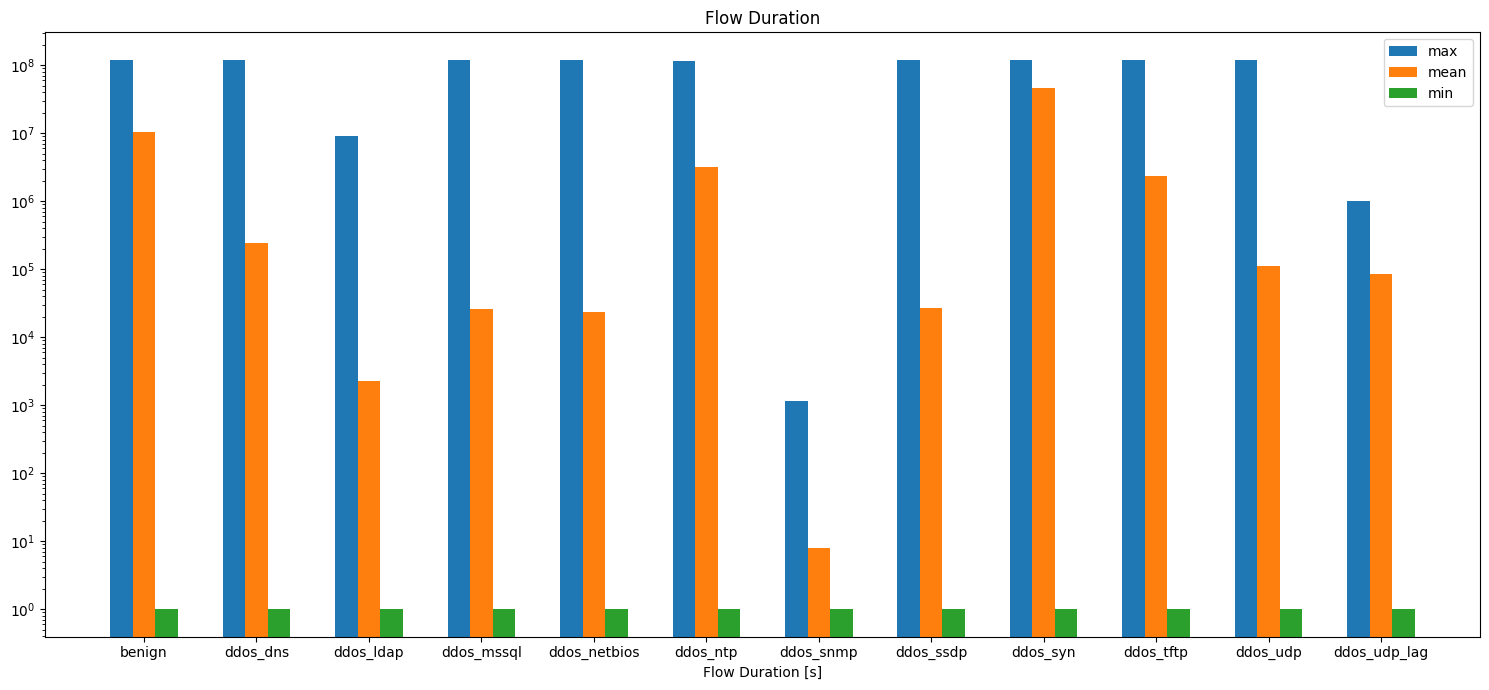

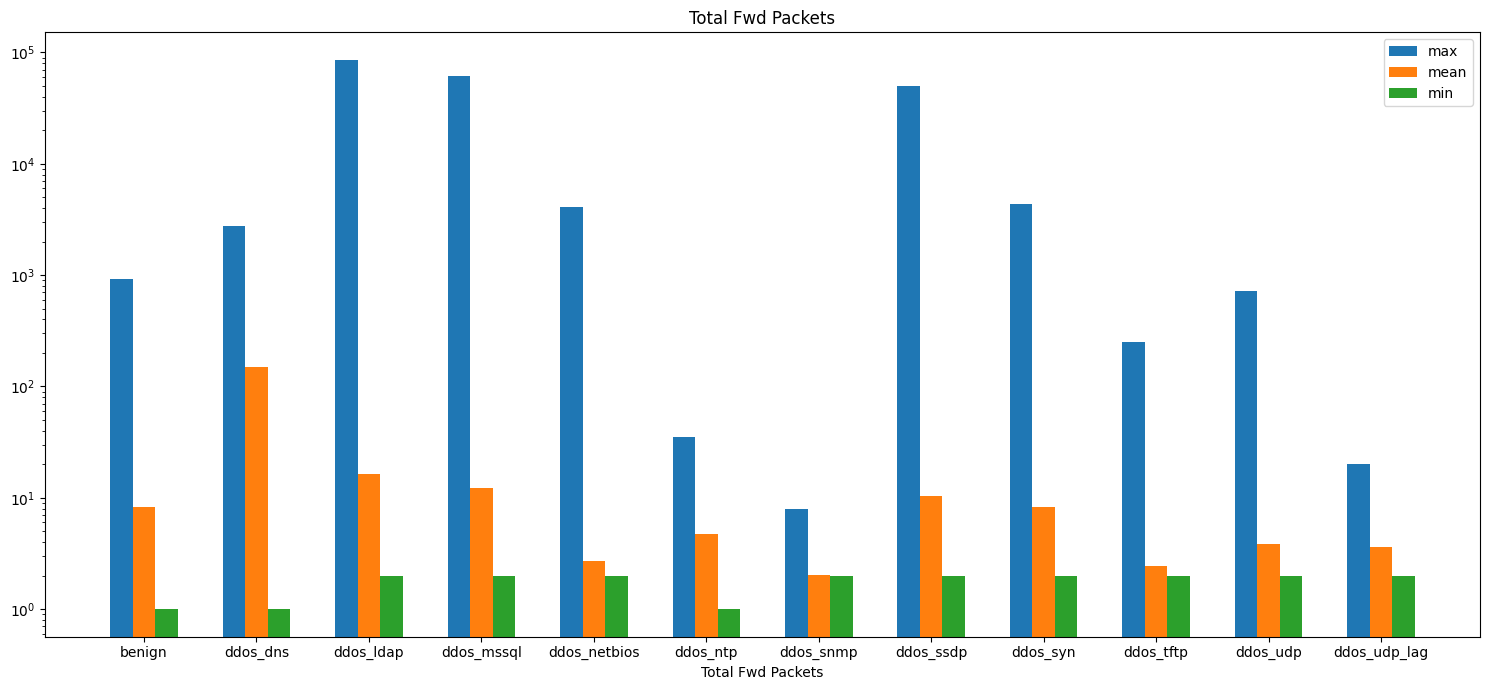

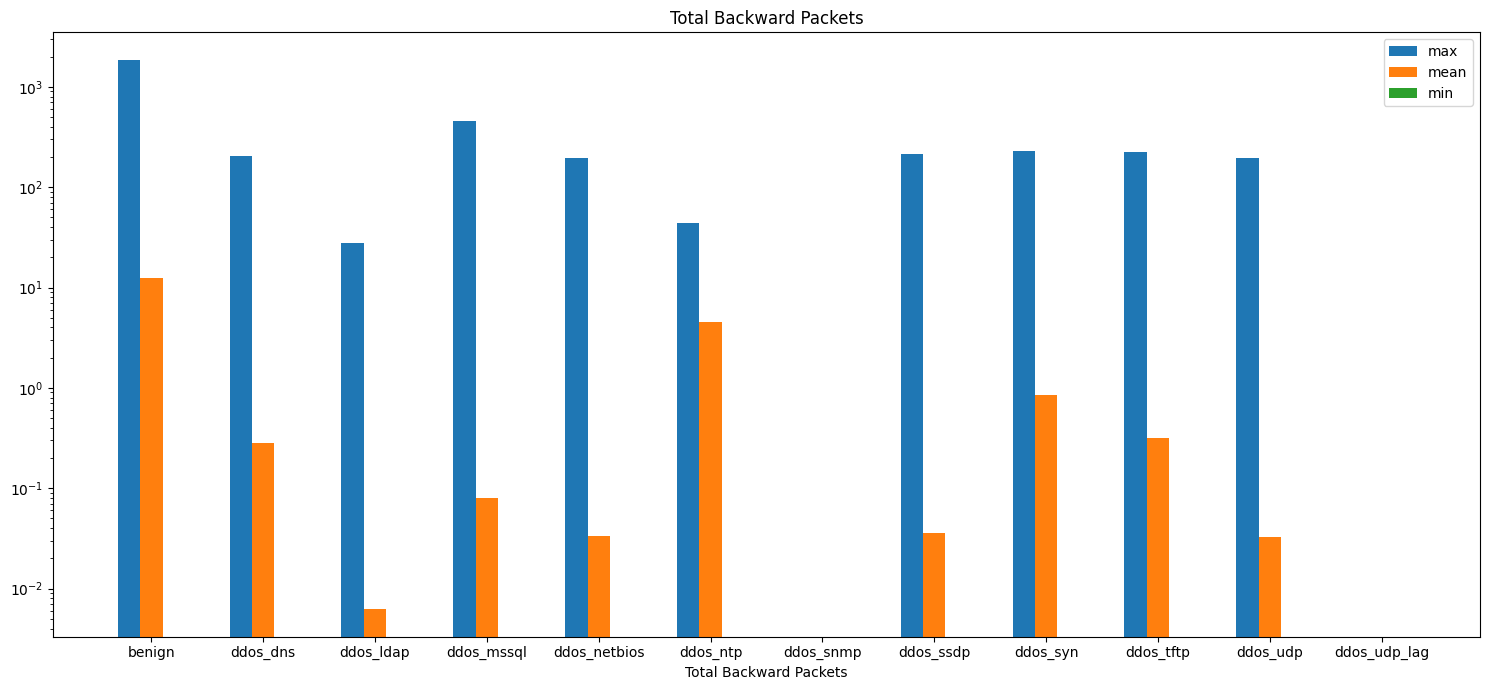

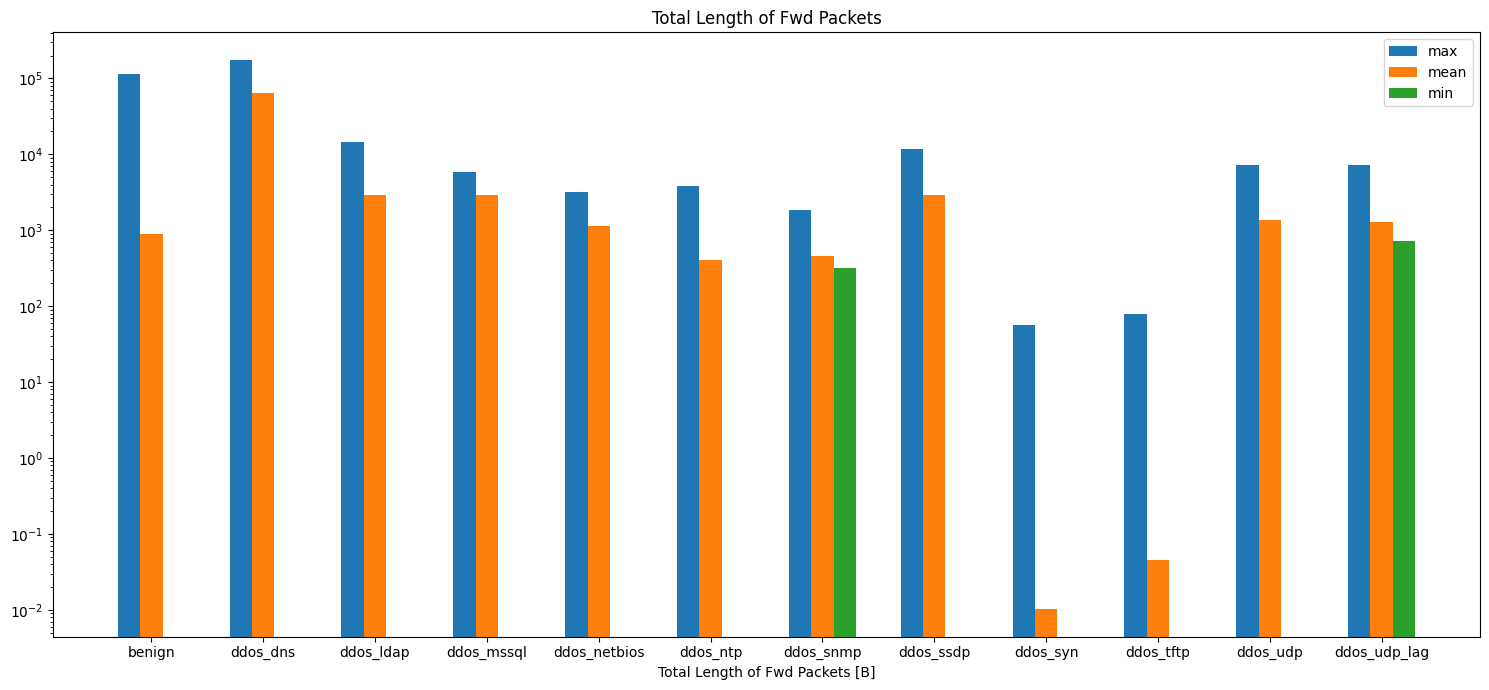

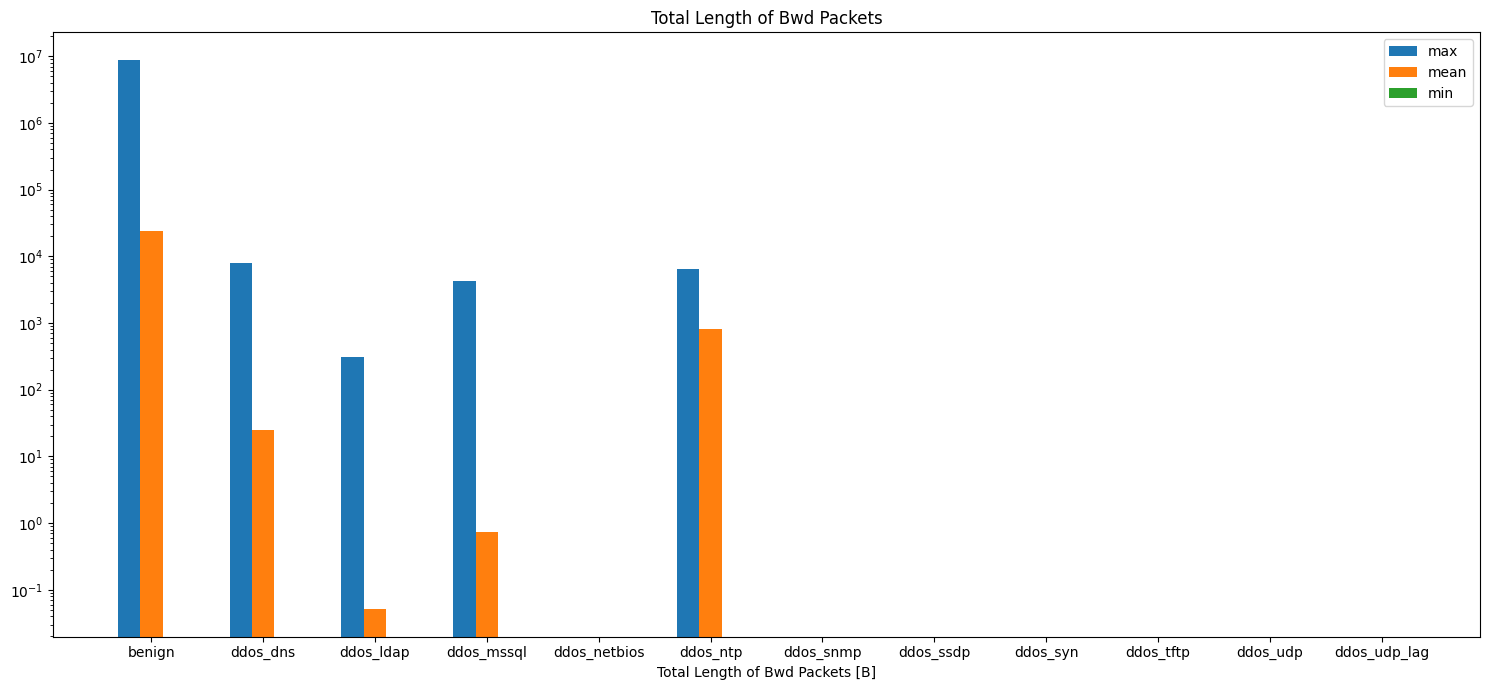

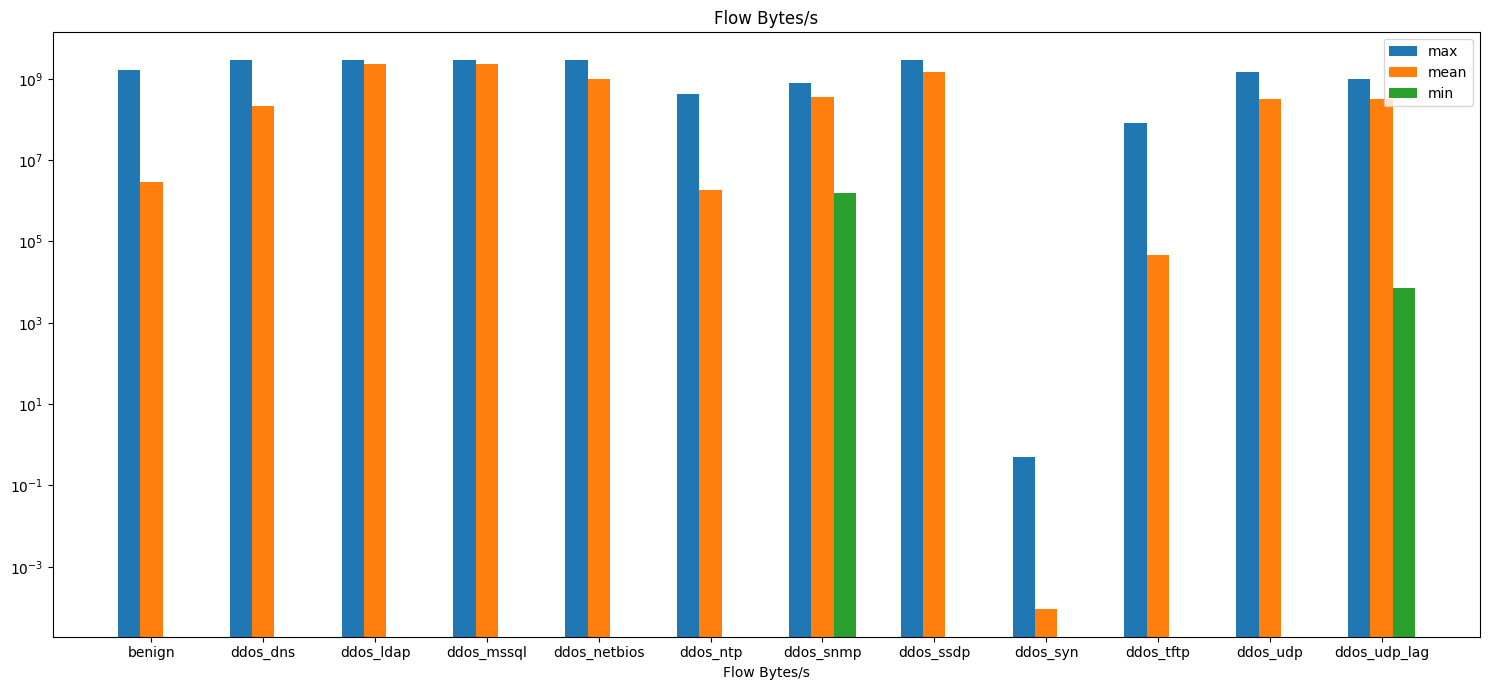

In [ ]:
for col in ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Flow Bytes/s']:
    plt.figure(figsize=(15,7))
    X_axis = np.arange(len(df_described.index))
    plt.bar(X_axis - 0.2, df_described.loc[:, (col, 'max')].values, width = 0.2, label="max")
    plt.bar(X_axis, df_described.loc[:, (col, 'mean')].values, width = 0.2, label="mean")
    plt.bar(X_axis + 0.2, df_described.loc[:, (col, 'min')].values, width = 0.2, label="min")
    plt.xticks(X_axis, df_described.index)
    plt.title(col)
    if (col == 'Flow Duration'):
        col_label = f"{col} [μs]"
    elif ('Length' in col):
        col_label = f"{col} [B]"
    else:
        col_label=col
    plt.xlabel(col_label)
    plt.legend()
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

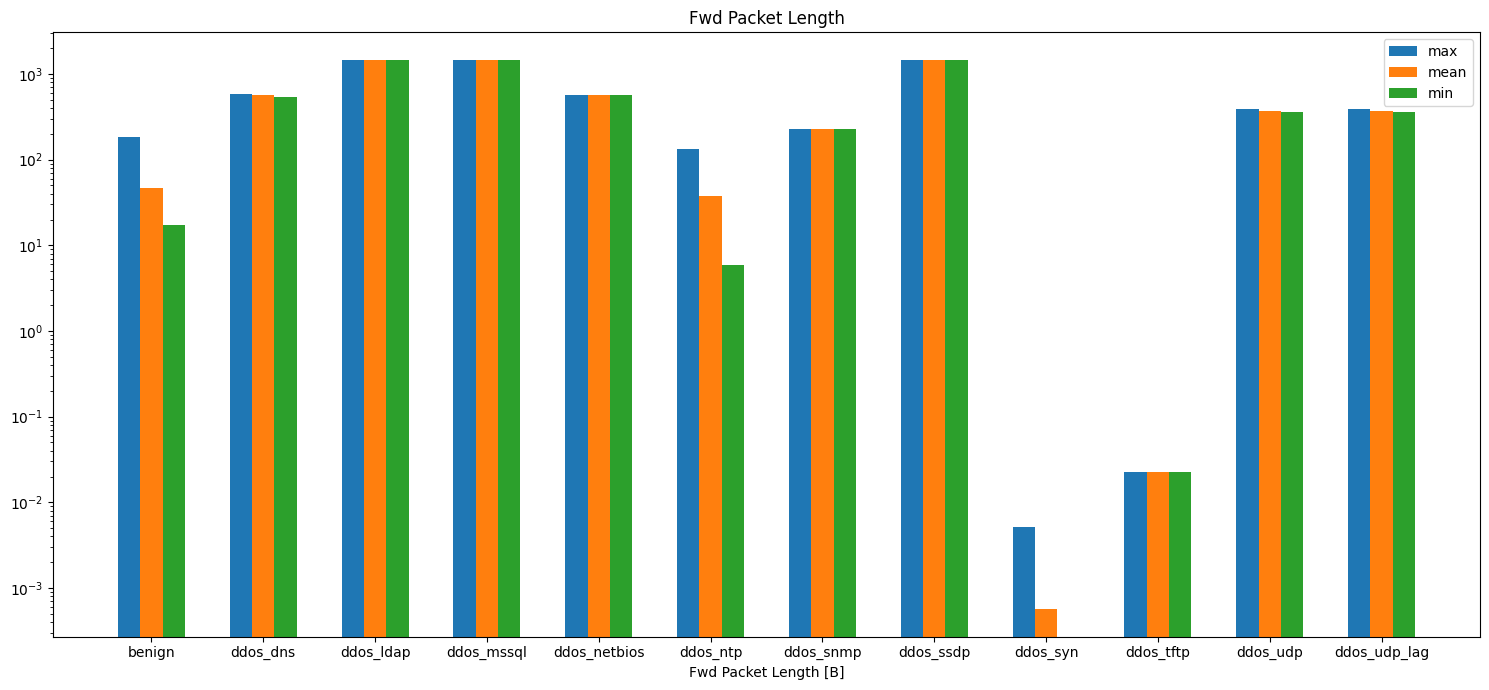

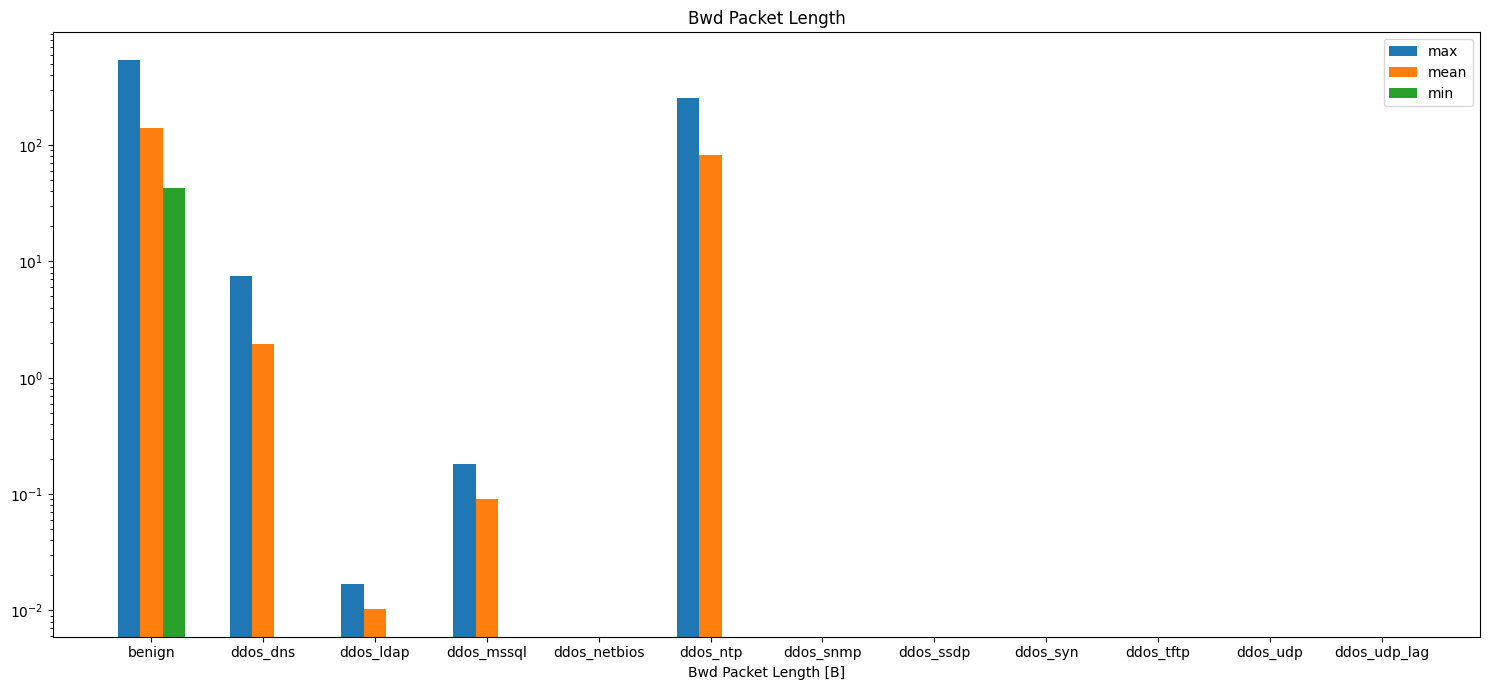

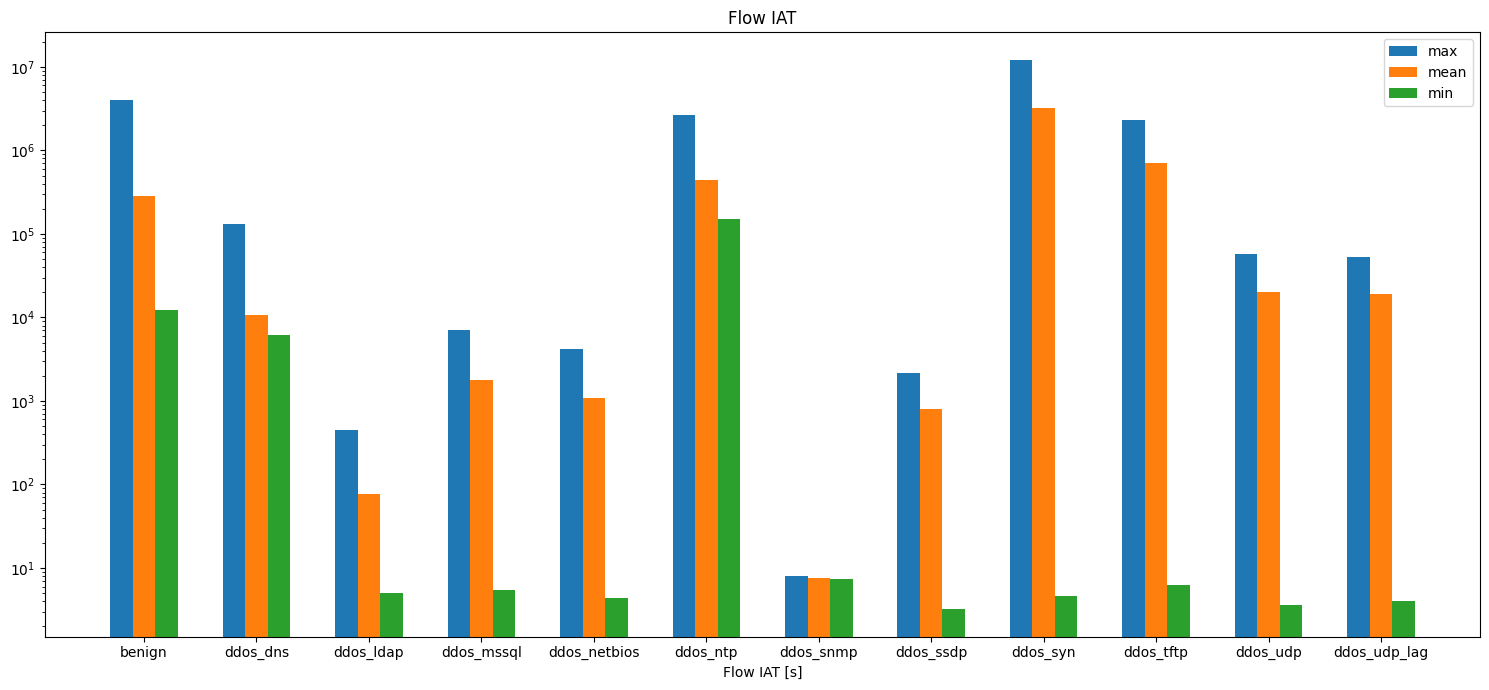

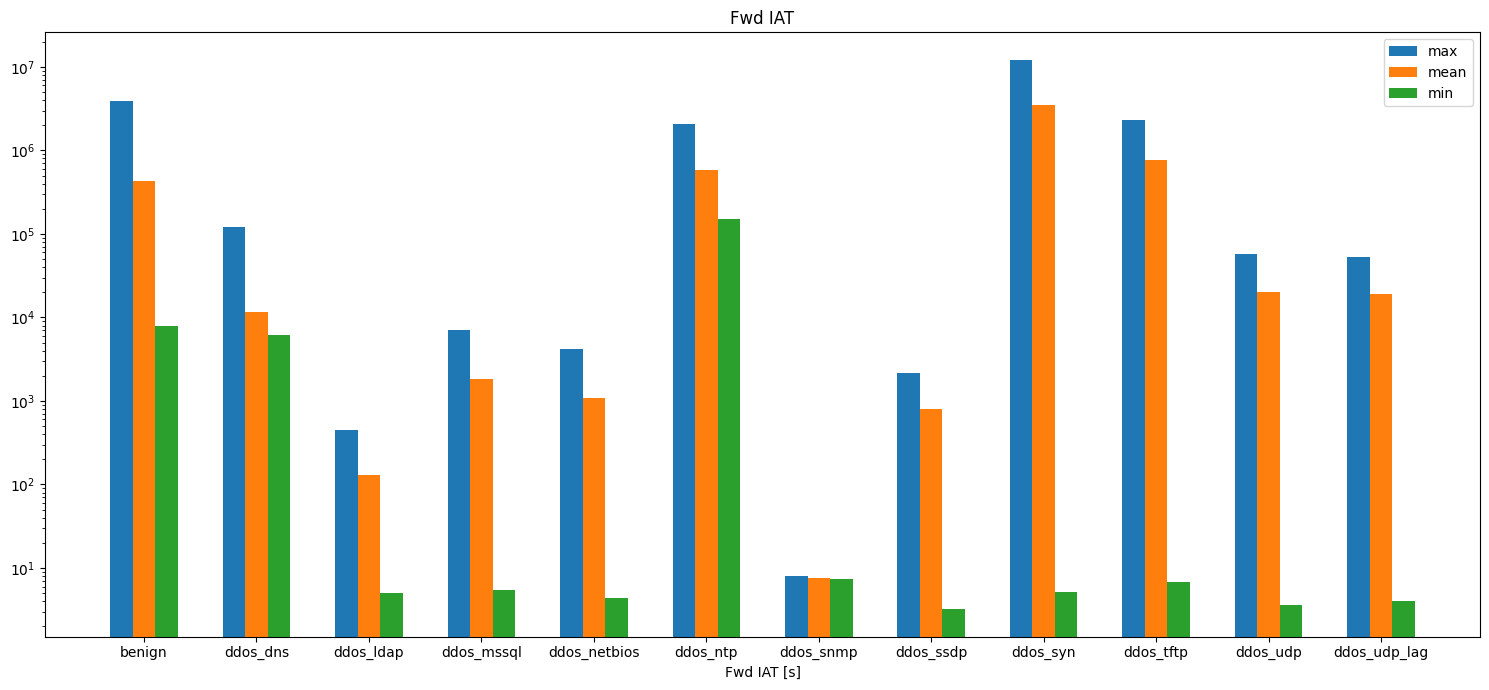

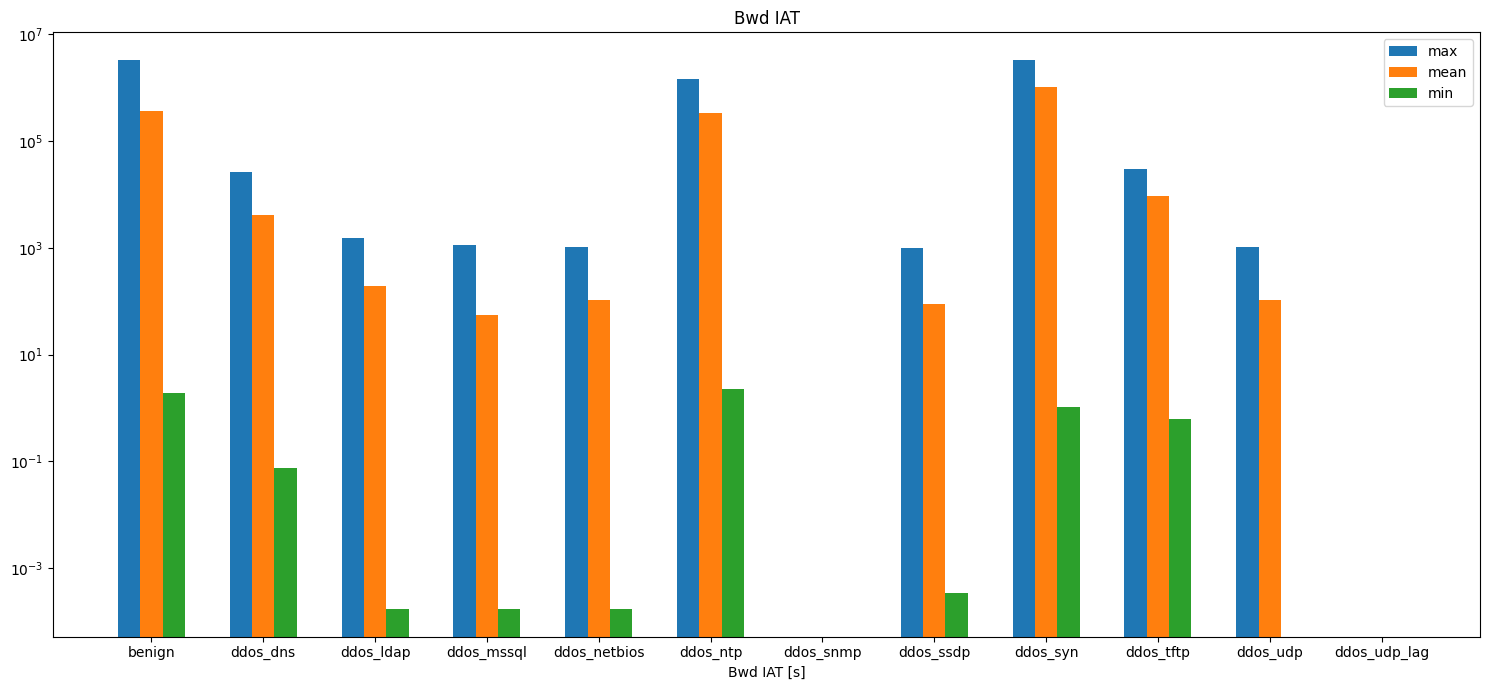

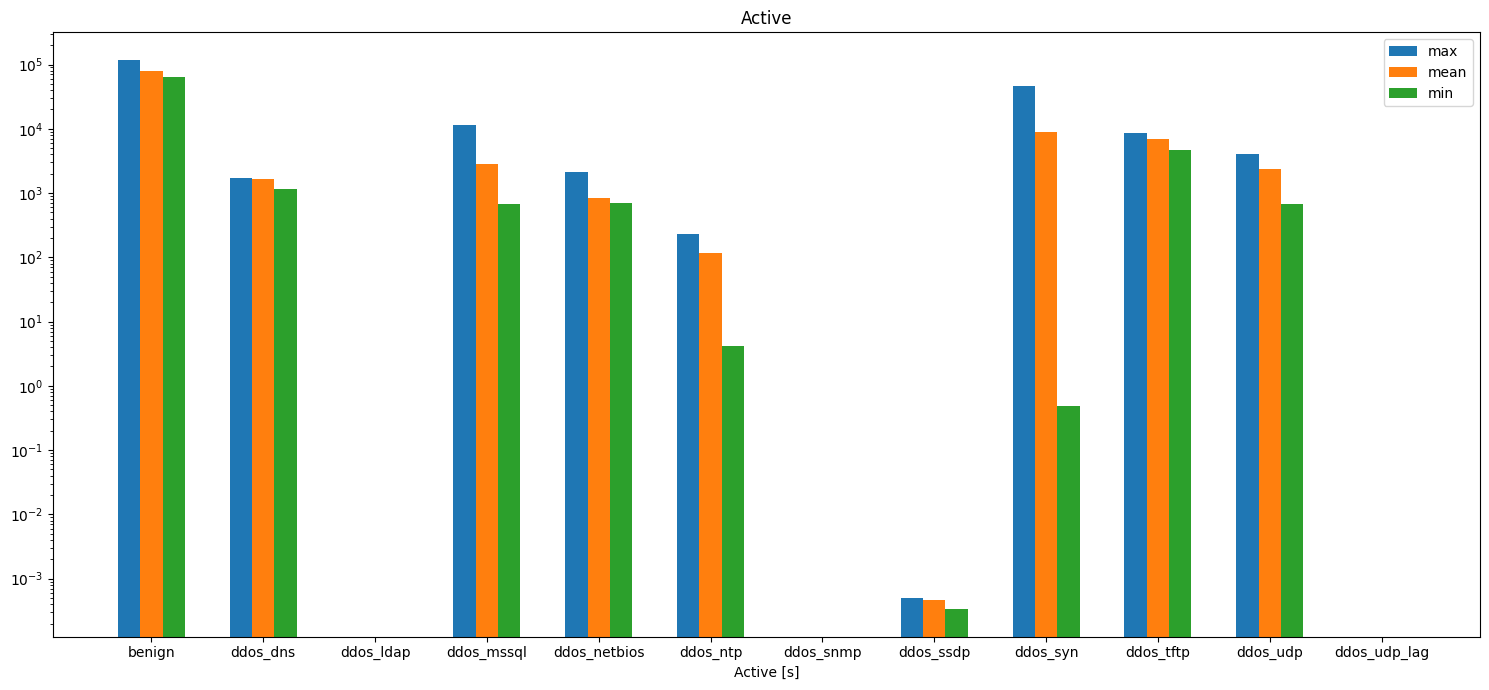

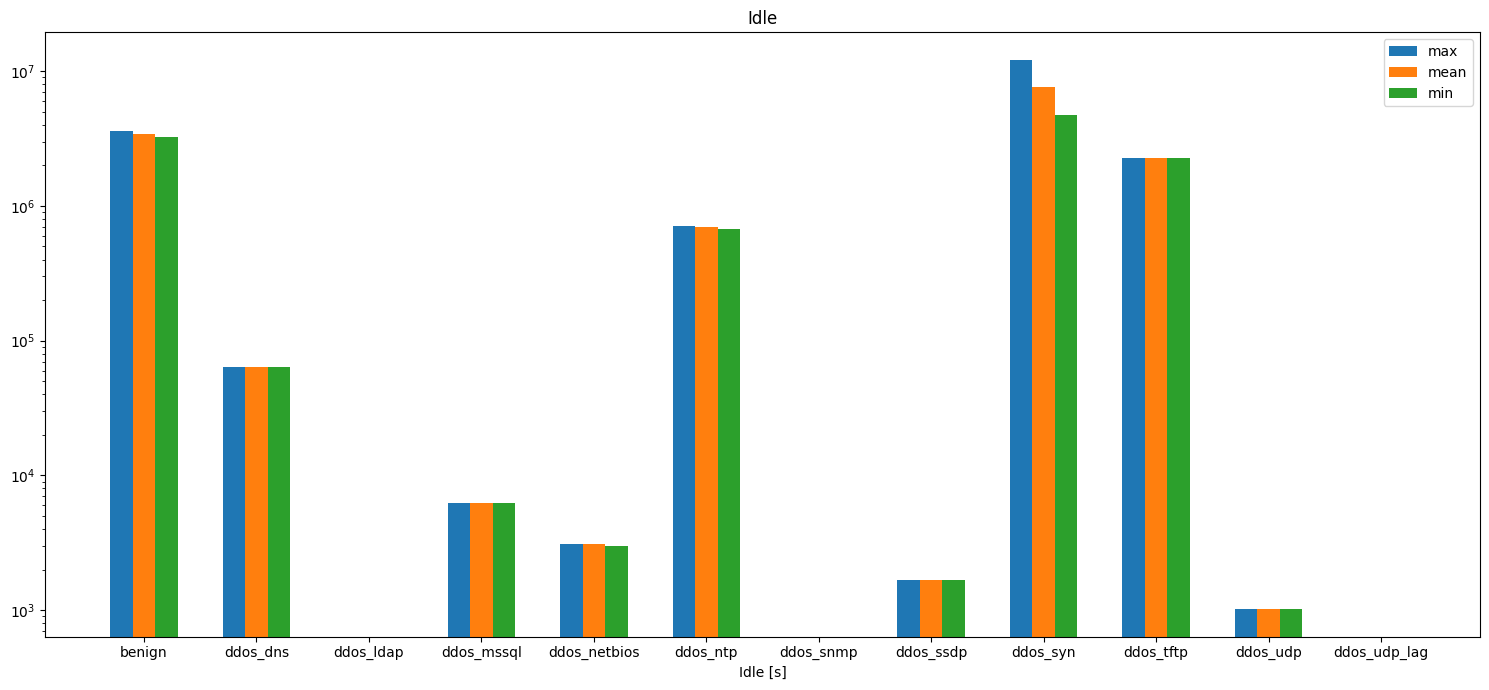

In [ ]:
for col in ['Fwd Packet Length', 'Bwd Packet Length', 'Flow IAT', 'Fwd IAT', 'Bwd IAT', 'Active', 'Idle']:
    max_col = f"{col} Max"
    min_col = f"{col} Min"
    mean_col = f"{col} Mean"
    plt.figure(figsize=(15,7))
    X_axis = np.arange(len(df_described.index))
    plt.bar(X_axis - 0.2, df_described.loc[:, (max_col, 'mean')].values, width = 0.2, label="max")
    plt.bar(X_axis, df_described.loc[:, (mean_col, 'mean')].values, width = 0.2, label="mean")
    plt.bar(X_axis + 0.2, df_described.loc[:, (min_col, 'mean')].values, width = 0.2, label="min")
    plt.xticks(X_axis, df_described.index)
    plt.title(col)
    if ('IAT' in col or col == 'Active' or col == 'Idle'):
        col_label = f"{col} [μs]"
    elif ('Length' in col):
        col_label = f"{col} [B]"
    else:
        col_label=col
    plt.xlabel(col_label)
    plt.legend()
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

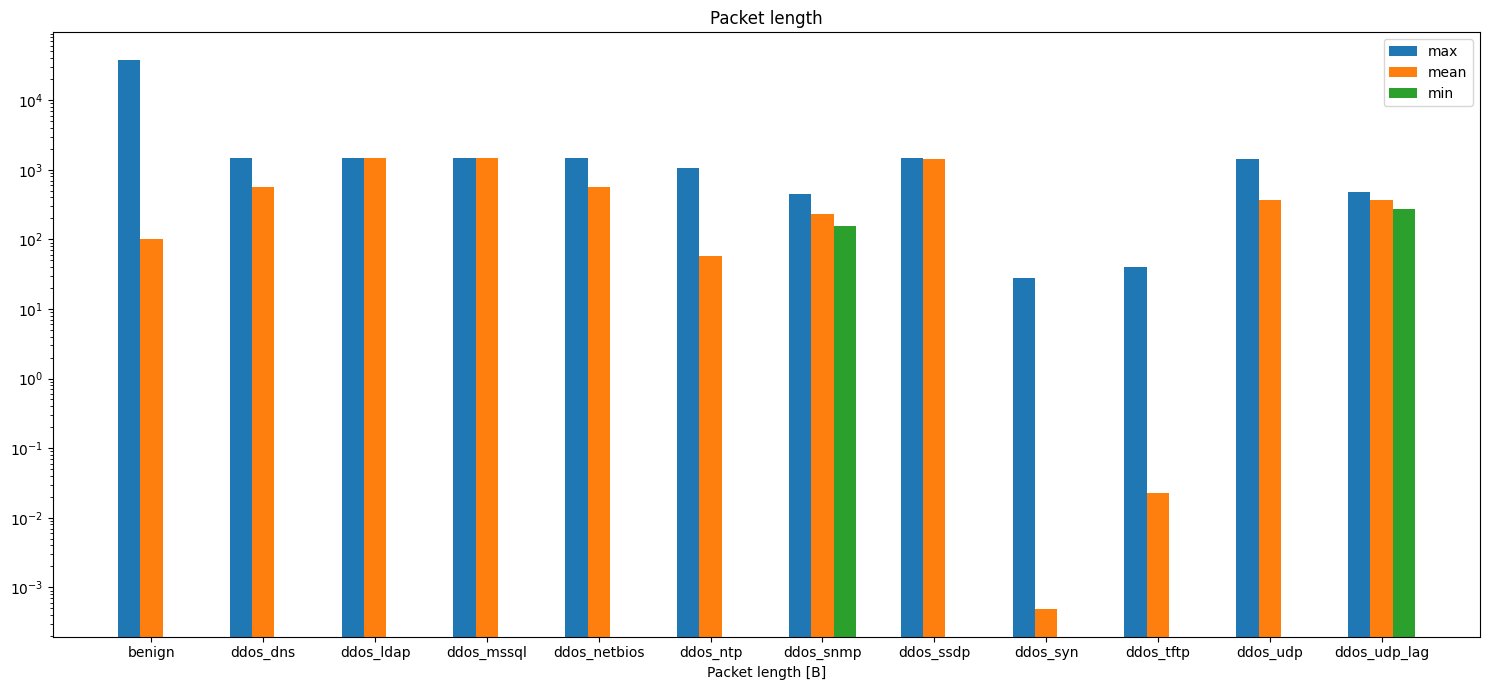

In [46]:
plt.figure(figsize=(15,7))
X_axis = np.arange(len(df_described.index))
plt.bar(X_axis - 0.2, df_described.loc[:, ('Max Packet Length', 'max')].values, width = 0.2, label="max")
plt.bar(X_axis, df_described.loc[:, ('Packet Length Mean', 'mean')].values, width = 0.2, label="mean")
plt.bar(X_axis + 0.2, df_described.loc[:, ('Min Packet Length', 'min')].values, width = 0.2, label="min")
plt.xticks(X_axis, df_described.index)
plt.title("Packet length")
plt.xlabel("Packet length [B]")
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()

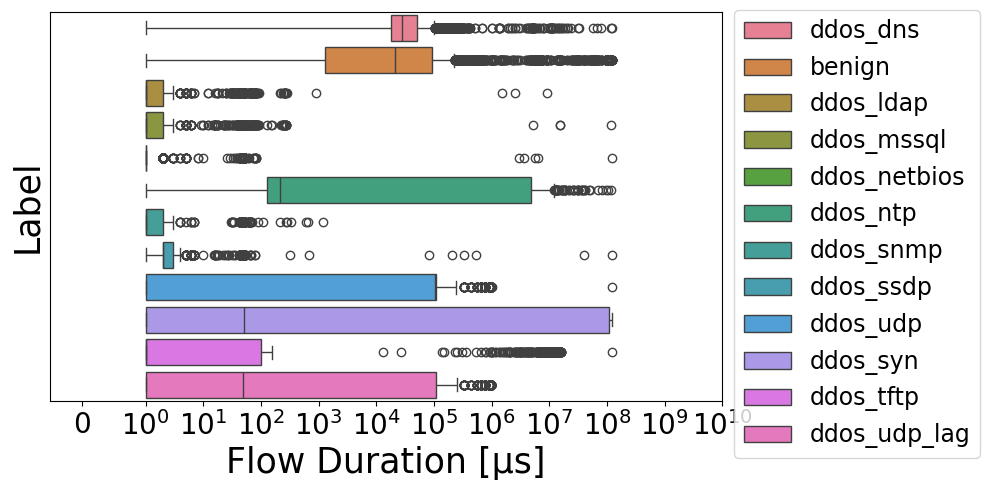

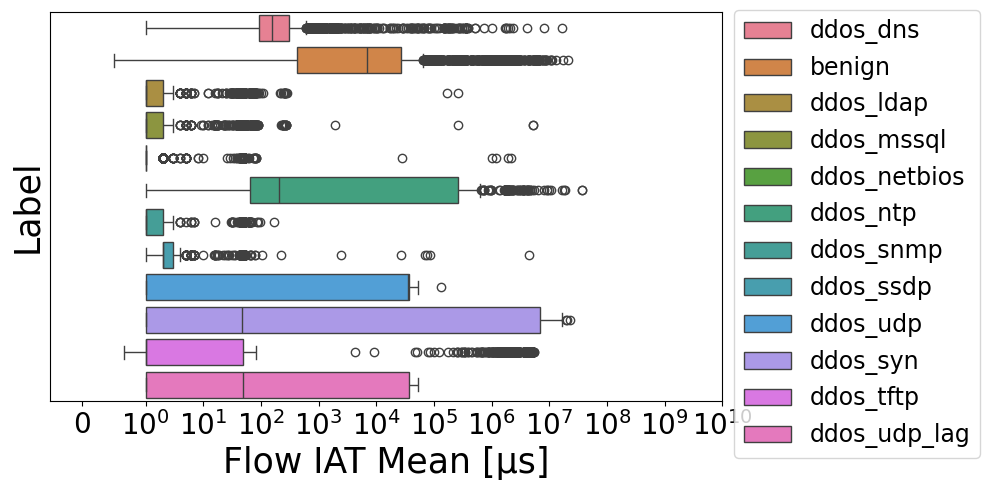

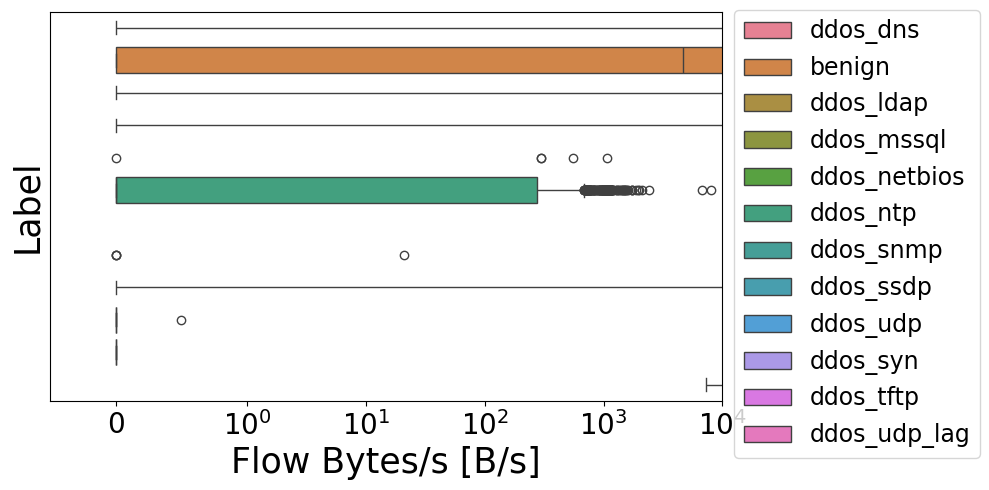

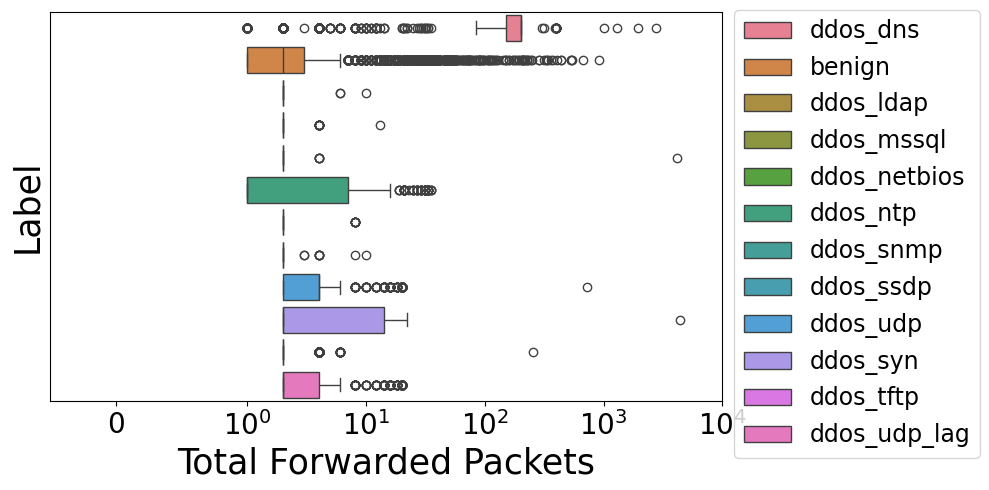

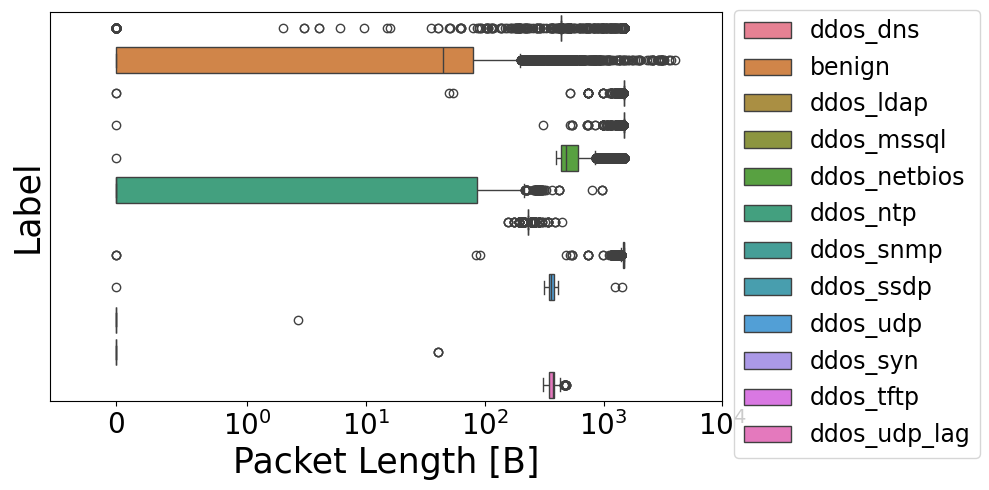

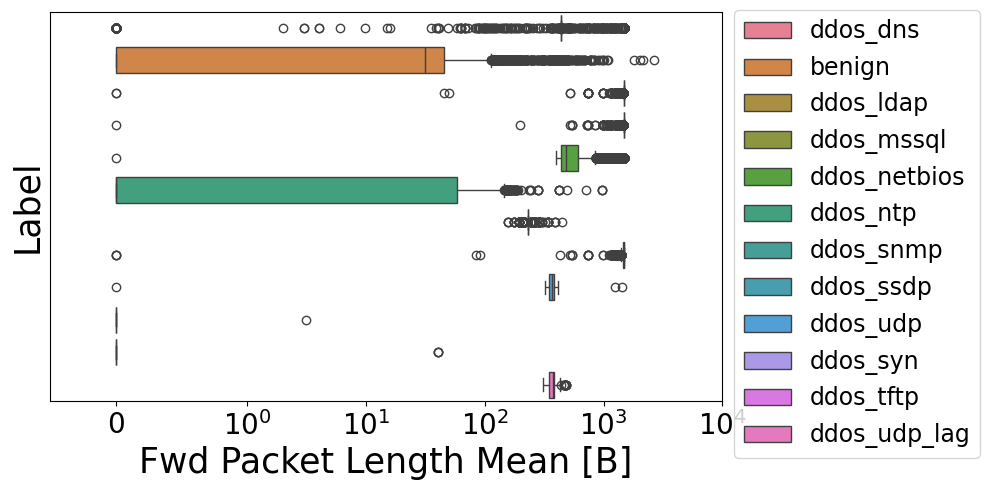

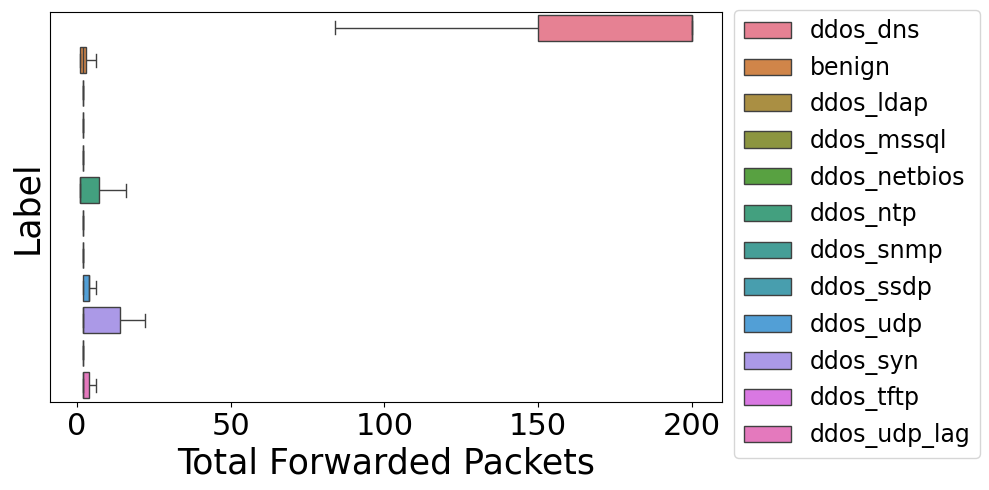

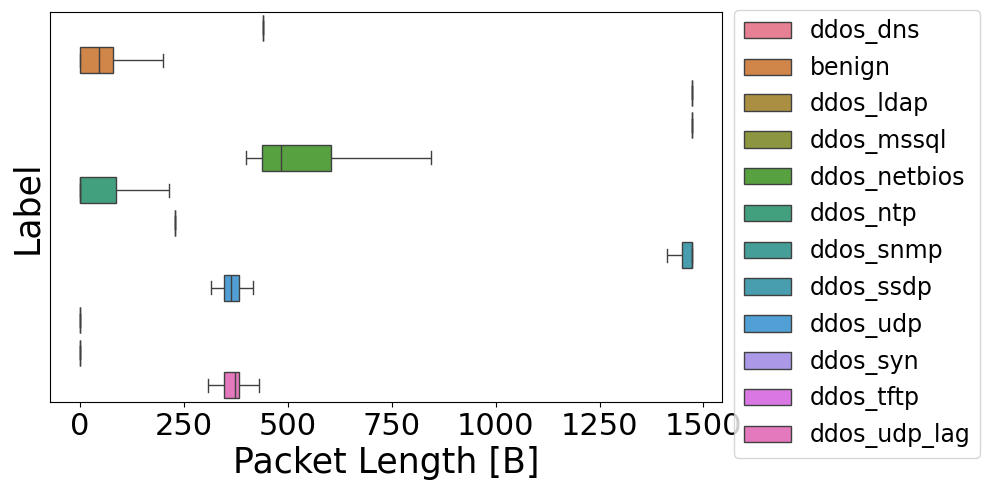

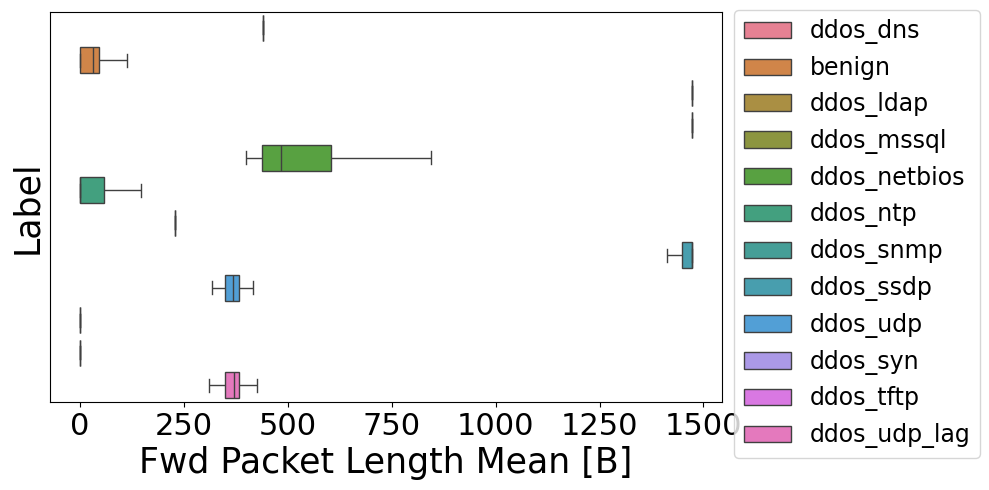

In [415]:
labels_names = ['Flow Duration [µs]', 'Flow IAT Mean [µs]', 'Flow Bytes/s [B/s]', 'Total Forwarded Packets', 'Packet Length [B]', 'Fwd Packet Length Mean [B]']
i = 0
for col in ['Flow Duration', 'Flow IAT Mean', 'Flow Bytes/s', 'Total Fwd Packets', 'Packet Length Mean', 'Fwd Packet Length Mean']:
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(data=df_analysis, x=col, y='label', hue ='label', legend='full')
    #plt.title(col)
    sns.move_legend(ax, bbox_to_anchor=(1, 1.035), loc="upper left", title=None, fontsize=17)
    plt.ylabel("Label", fontsize=25)
    plt.xlabel(labels_names[i], fontsize=25)
    i += 1
    plt.tick_params(labelsize=20)
    plt.xscale('symlog', linthresh=1)
    if (i < 3):
        plt.xlim(-0.5,10**10)
    else:
        plt.xlim(-0.5,10**4)
    #plt.xticks(rotation=25, ha="right")

    plt.yticks([], [])
    #plt.legend(bbox_to_anchor=(1, 1.035), loc="upper left", fontsize=17)
    plt.tight_layout()
    plt.show()

i = 3
for col in ['Total Fwd Packets', 'Packet Length Mean', 'Fwd Packet Length Mean']:
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(data=df_analysis, x=col, y='label', hue ='label', log_scale=False, showfliers=False, legend='full')
    #plt.title(col)
    sns.move_legend(ax, bbox_to_anchor=(1, 1.035), loc="upper left", title=None, fontsize=17)
    plt.ylabel("Label", fontsize=25)
    plt.xlabel(labels_names[i], fontsize=25)
    i = i+1
    plt.tick_params(labelsize=22)
    #plt.xticks(rotation=25, ha="right")

    plt.yticks([], [])
    #plt.legend(bbox_to_anchor=(1, 1.035), loc="upper left", fontsize=17)
    plt.tight_layout()
    plt.show()